<a href="https://colab.research.google.com/github/NadilaAmaliaaa/MACHINE_LEARNING/blob/main/Jobsheet%204%20-%20Klasifikasi/ML_JS4_Tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TUGAS 2

## Import Library

In [28]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Image directories
train_dir = '/content/drive/MyDrive/ML/images/training/'
test_dir = '/content/drive/MyDrive/ML/images/test/'

## Load Data

In [31]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [32]:
train_img = load_dataset(train_dir)

In [33]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (372, 640, 3)
Label	: day


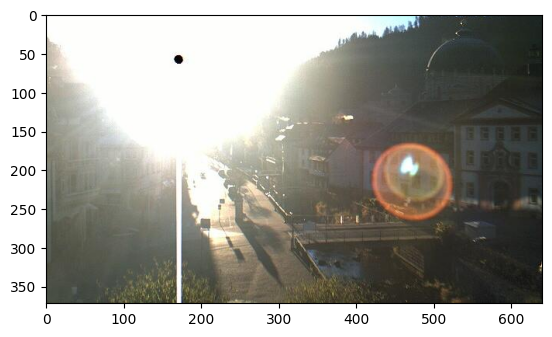

In [34]:
random_img_viz(train_img)

### Pre-Processing Data

In [35]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [36]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [37]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [38]:
train_std_img_list = preprocess(train_img)

In [39]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 57
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 1


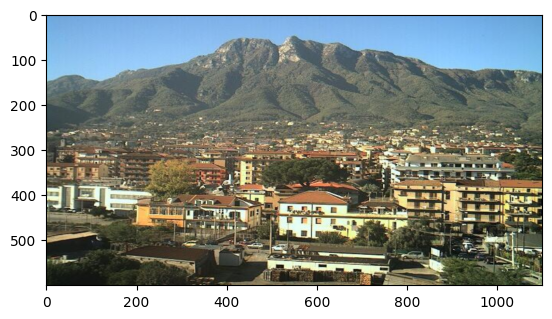

In [40]:
random_img_viz(train_std_img_list)

## Ekstraksi Fitur

In [41]:
!pip install Pillow

10
[ 13034  52239  87223 117965 163087 118531  38225  22522  17569  29605]


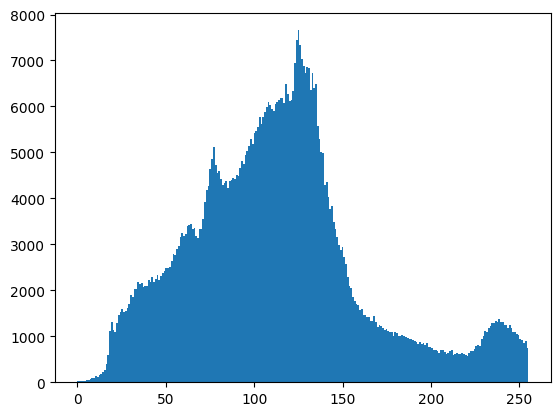

In [42]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Ekstrak setiap channel red, green, blue
# r = train_std_img_list[0][0][:, :, 0] # Access the red channel of the first image in the list
# g = train_std_img_list[0][0][:, :, 1] # Access the green channel of the first image in the list
# b = train_std_img_list[0][0][:, :, 2] # Access the blue channel of the first image in the list

# # Calculate histogram data for the red channel using NumPy's histogram function
# hist, bins = np.histogram(r)

# # Check the length of the histogram
# print(len(hist))

# # Print the histogram data
# print(hist)

# # You can also visualize the histogram using Matplotlib
# plt.hist(r.ravel(), bins=256)
# plt.show()

256
[20, 17, 27, 31, 38, 44, 54, 64, 89, 85, 129, 116, 154, 172, 220, 270, 394, 587, 1108, 1309, 1146, 1098, 1299, 1453, 1525, 1585, 1522, 1555, 1621, 1713, 1893, 1862, 2025, 2026, 2178, 2146, 2158, 2082, 2094, 2100, 2228, 2191, 2283, 2174, 2252, 2333, 2227, 2308, 2368, 2423, 2477, 2492, 2498, 2637, 2782, 2773, 2903, 2966, 3162, 3249, 3186, 3234, 3404, 3412, 3438, 3336, 3358, 3182, 3143, 3331, 3324, 3544, 3925, 4185, 4265, 4635, 4859, 5112, 4730, 4557, 4603, 4428, 4291, 4333, 4370, 4227, 4376, 4397, 4441, 4411, 4499, 4496, 4664, 4805, 4748, 4950, 5024, 5142, 5285, 5185, 5428, 5463, 5552, 5774, 5628, 5768, 5883, 5993, 6107, 6036, 5949, 5902, 6061, 6101, 6147, 6175, 6178, 6065, 6483, 6260, 6124, 6143, 6342, 6942, 7455, 7657, 7335, 7027, 6879, 6722, 6854, 6845, 6359, 6738, 6403, 6498, 5571, 5301, 5019, 4986, 4281, 4360, 4029, 3766, 3824, 3493, 3326, 3152, 2995, 2886, 2938, 2728, 2578, 2281, 2099, 2053, 1858, 1762, 1711, 1676, 1579, 1590, 1471, 1459, 1429, 1415, 1324, 1337, 1435, 1301, 119

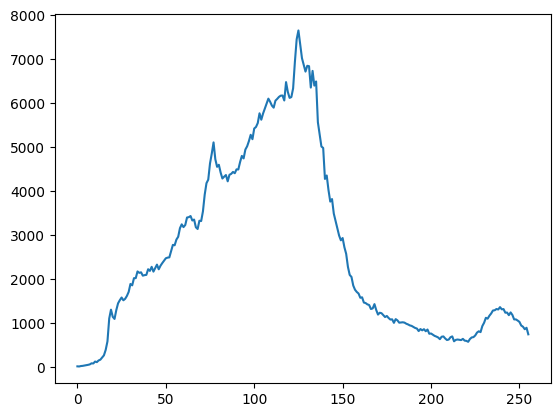

256
[0, 0, 0, 0, 0, 0, 0, 2, 15, 4, 21, 67, 162, 628, 908, 1126, 1140, 1559, 2040, 2448, 3359, 4235, 5169, 6287, 6441, 6954, 6826, 6774, 6016, 5381, 4897, 4587, 4752, 4140, 4249, 4304, 4296, 4474, 4510, 4876, 5865, 7192, 12036, 7367, 4849, 4056, 3678, 3798, 3652, 4206, 4117, 3748, 3442, 3161, 3054, 2926, 3024, 2761, 2765, 2363, 2284, 2059, 2208, 2119, 2190, 2046, 2071, 2004, 2180, 2698, 2655, 2141, 2310, 2302, 2234, 2005, 2141, 2208, 2103, 2158, 2110, 1975, 2039, 1813, 1833, 1676, 1948, 1819, 1692, 1641, 1639, 1433, 1411, 1399, 1311, 1272, 1307, 1317, 1284, 1225, 1150, 1242, 1178, 1157, 1132, 1119, 1169, 1128, 1116, 1031, 1048, 1069, 1019, 905, 958, 995, 1027, 975, 1018, 1069, 1123, 1211, 1331, 1474, 1507, 1712, 1658, 1634, 1572, 1715, 1731, 1745, 1722, 1694, 1649, 1734, 1541, 1555, 1509, 1738, 1808, 1815, 1857, 2009, 2599, 2802, 3225, 3344, 2915, 4227, 5105, 5085, 4942, 5345, 5307, 4772, 5070, 5481, 4829, 5521, 6051, 4583, 4263, 4750, 4848, 5016, 4561, 3804, 3072, 3244, 3794, 3577, 40

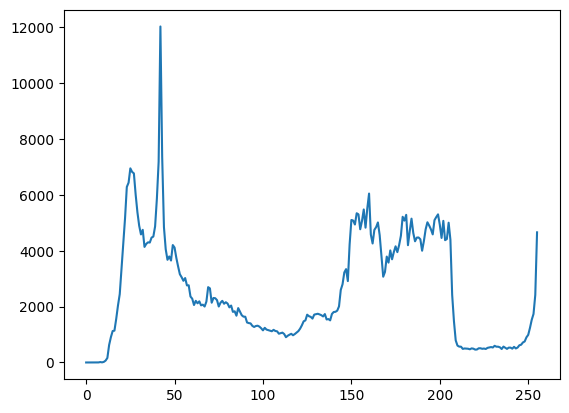

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 4, 1, 3, 4, 6, 20, 39, 69, 136, 216, 283, 405, 478, 533, 615, 799, 926, 996, 982, 1133, 1141, 1188, 1294, 1388, 1464, 1610, 1707, 1692, 1706, 1619, 1486, 1529, 1536, 1482, 1511, 1493, 1477, 1550, 1455, 1583, 1526, 1610, 1604, 1630, 1614, 1711, 1908, 1926, 1997, 2218, 2292, 2391, 2564, 2644, 2688, 2748, 2745, 2850, 2915, 3022, 3083, 3093, 3272, 3423, 3467, 3556, 3741, 4034, 3990, 4159, 4347, 4581, 4785, 4850, 4773, 4844, 4760, 4814, 4782, 4671, 4744, 5004, 4705, 4650, 4541, 4518, 4515, 4408, 4288, 4420, 4488, 4585, 4637, 4709, 4686, 4876, 4897, 4847, 4905, 4889, 5000, 5279, 5459, 5421, 5671, 5562, 5520, 5194, 4949, 4532, 4483, 4445, 4396, 4447, 4480, 4523, 4528, 4329, 4200, 4084, 3865, 3749, 3532, 3387, 3263, 3286, 3242, 3124, 3183, 3148, 3161, 3099, 3132, 3104, 2964, 3041, 3008, 2927, 2808, 2762, 2646, 2510, 2499, 2533, 2339, 2350, 2245, 2343, 2175, 2171, 2192, 2173, 2197, 2142, 2116, 2114, 2120, 2218, 2183, 2161, 2134, 2084, 2158, 2142

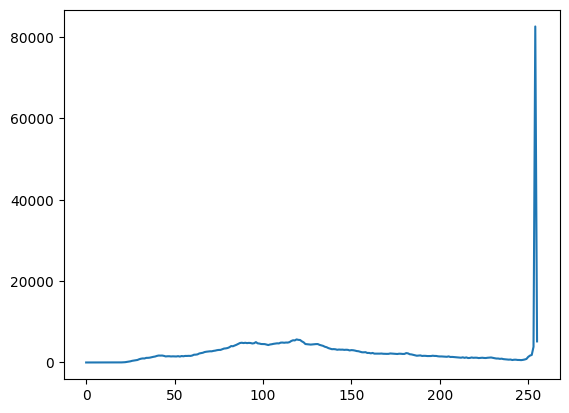

256
[1, 1, 2, 2, 10, 21, 42, 52, 96, 123, 166, 235, 384, 565, 749, 976, 1057, 1238, 1390, 1620, 1606, 1646, 1565, 1670, 1729, 1820, 1953, 2055, 2116, 2276, 2363, 2560, 2704, 2716, 2711, 2859, 3192, 3105, 3303, 3493, 3630, 3840, 3920, 4149, 4517, 4878, 5203, 5827, 6209, 7187, 7833, 8563, 9796, 10146, 10516, 10580, 10691, 10641, 10595, 10763, 10765, 10506, 10199, 9841, 9341, 8777, 8190, 7774, 7143, 6759, 6337, 6212, 5826, 5533, 5283, 5249, 4833, 4804, 4608, 4633, 4316, 3954, 3825, 3547, 3440, 3189, 3241, 3006, 2967, 2850, 2799, 2678, 2498, 2375, 2237, 2150, 2136, 2052, 1923, 1952, 1823, 1847, 1828, 1878, 1988, 2103, 2110, 2092, 2050, 2147, 2097, 1937, 1878, 1944, 1915, 1902, 1964, 1861, 1984, 1962, 2062, 1995, 1773, 1713, 1729, 1618, 1466, 1669, 1530, 1489, 1401, 1429, 1347, 1421, 1288, 1300, 1282, 1167, 1140, 1120, 1342, 1356, 1356, 1611, 1679, 1771, 1727, 1908, 2108, 2171, 2191, 2196, 2213, 2361, 2410, 2631, 2586, 2484, 2225, 2041, 2229, 2300, 2523, 2803, 2649, 2226, 2118, 1826, 1997, 

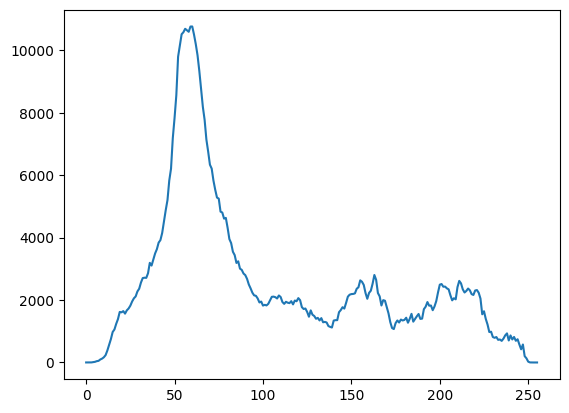

256
[2, 11, 10, 7, 8, 12, 16, 14, 11, 25, 19, 26, 38, 21, 39, 49, 53, 51, 57, 67, 98, 91, 126, 130, 171, 160, 219, 256, 349, 469, 611, 774, 935, 1213, 1636, 1903, 2474, 2820, 3152, 3432, 3746, 3796, 4010, 3971, 3836, 3984, 4080, 4126, 4490, 4695, 4945, 5432, 5867, 6199, 6984, 8276, 8978, 10343, 12679, 13771, 15134, 14691, 13790, 13362, 12689, 11489, 11183, 9805, 9203, 9472, 9417, 9537, 10228, 9886, 8610, 8185, 6971, 5602, 4963, 4689, 4236, 4158, 3436, 3206, 3115, 3198, 3112, 3342, 3189, 3097, 3153, 3124, 3059, 3130, 2913, 2640, 2666, 2716, 2762, 2910, 2778, 2666, 2857, 2811, 2851, 2670, 2645, 2634, 2463, 2366, 2237, 2190, 2286, 2214, 2285, 2378, 2765, 2743, 2784, 2863, 2760, 2639, 2424, 2328, 2191, 2164, 2102, 2008, 1956, 1862, 1793, 1794, 1730, 1619, 1541, 1534, 1509, 1505, 1504, 1506, 1513, 1371, 1385, 1411, 1331, 1399, 1300, 1281, 1251, 1266, 1171, 1201, 1105, 1086, 1032, 1006, 1050, 978, 1030, 969, 965, 936, 981, 941, 895, 914, 834, 859, 883, 856, 849, 894, 847, 876, 819, 849, 819,

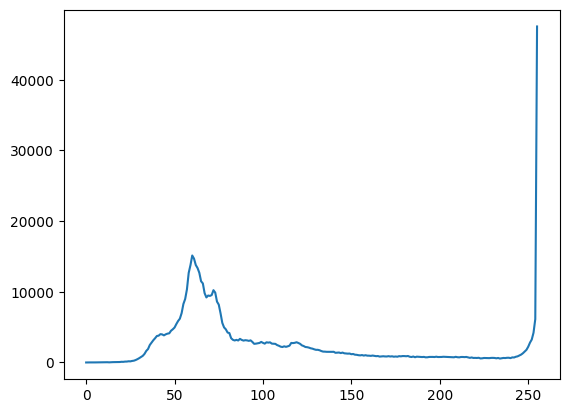

256
[4, 12, 40, 112, 215, 335, 580, 1026, 1518, 1830, 2148, 2394, 2527, 2767, 3017, 3217, 3344, 3629, 3663, 3917, 3931, 4241, 4224, 4270, 4376, 4253, 4263, 4167, 4125, 4084, 3980, 4205, 4118, 4282, 4196, 3891, 3979, 3938, 3971, 4104, 4160, 4401, 4583, 4685, 4547, 4562, 4426, 4451, 4225, 4244, 4063, 3842, 3677, 3572, 3312, 3245, 3203, 2946, 2821, 2706, 2556, 2449, 2407, 2317, 2129, 2190, 2114, 1953, 2015, 1885, 1809, 1706, 1731, 1661, 1519, 1510, 1532, 1536, 1491, 1461, 1403, 1331, 1233, 1221, 1271, 1196, 1157, 1196, 1133, 1140, 1124, 1054, 1144, 1058, 1125, 1057, 1112, 1128, 1140, 1080, 1084, 1034, 1050, 976, 992, 907, 970, 923, 926, 874, 918, 837, 835, 767, 795, 752, 737, 745, 711, 758, 703, 715, 675, 685, 742, 742, 729, 687, 705, 729, 740, 774, 714, 779, 754, 797, 872, 804, 811, 768, 767, 736, 706, 705, 660, 740, 713, 768, 662, 747, 771, 748, 756, 825, 831, 912, 818, 801, 814, 825, 749, 714, 689, 622, 672, 651, 626, 652, 648, 707, 698, 724, 704, 736, 773, 746, 803, 1005, 1019, 1077, 

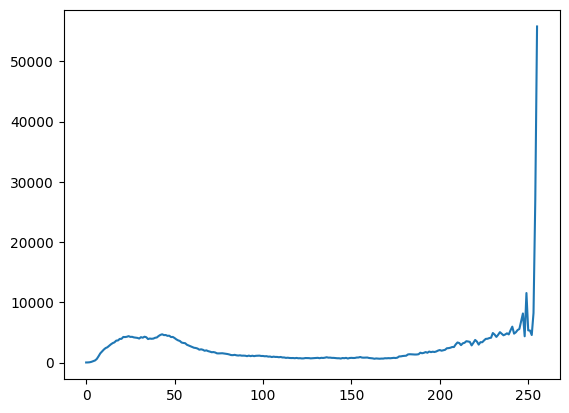

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 10, 7, 14, 40, 78, 135, 295, 494, 717, 946, 1043, 1157, 1252, 1126, 1016, 755, 510, 369, 275, 220, 245, 204, 196, 198, 203, 212, 234, 211, 232, 266, 271, 301, 322, 357, 419, 416, 495, 489, 507, 510, 580, 587, 675, 957, 1274, 1299, 1566, 1516, 1701, 1532, 1631, 1467, 1613, 1754, 1966, 1979, 2172, 2255, 2249, 2417, 2529, 2471, 2582, 2749, 2844, 2934, 2868, 2938, 2949, 3082, 3191, 2979, 3086, 3182, 3447, 3456, 3482, 3483, 3723, 3728, 3413, 3075, 2853, 2630, 2324, 2244, 2169, 2368, 2329, 2339, 2406, 2428, 2370, 2381, 2177, 2187, 2094, 2030, 1974, 1839, 1860, 1854, 1875, 1925, 1912, 1866, 1767, 1727, 1742, 1704, 1671, 1705, 1739, 1896, 1828, 2124, 3227, 2687, 2966, 4306, 5492, 10030, 7838, 8142, 17334, 11438, 11859, 13887, 17451, 14519, 10909, 11554, 11083, 13079, 11586, 12657, 9002, 7354, 8687, 7340, 7007, 6608, 11087, 18648, 12561, 7489, 6613, 8876, 11497, 14072, 10639, 13136, 12764, 12302, 8129, 4533, 7801, 4

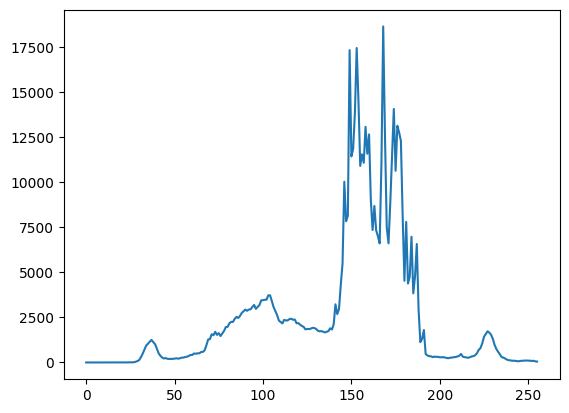

256
[0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 2, 0, 3, 2, 6, 11, 16, 14, 27, 30, 42, 44, 43, 44, 78, 107, 149, 258, 614, 1009, 1103, 1845, 1695, 1581, 1839, 2168, 2152, 2404, 2662, 2804, 2778, 2816, 2993, 3608, 4150, 4500, 5183, 5029, 4497, 4282, 3878, 3727, 3398, 3024, 3099, 2922, 3157, 3002, 2912, 3010, 2929, 3115, 3353, 3497, 3807, 4103, 4106, 4098, 4004, 4027, 4093, 3899, 3881, 3696, 3570, 3475, 3431, 3400, 3592, 3550, 3423, 3482, 3705, 3721, 3951, 3956, 4111, 4068, 4206, 4172, 4187, 4538, 4696, 4998, 5078, 5245, 5188, 5030, 4903, 4541, 4559, 4726, 4459, 4427, 4549, 4368, 4460, 4596, 4550, 4556, 4471, 4240, 4181, 4180, 4181, 4170, 4184, 4107, 3862, 4127, 4204, 4340, 4174, 4242, 4076, 3869, 3816, 3715, 3619, 3347, 3226, 2869, 2613, 2514, 2419, 2237, 2284, 2228, 1978, 1919, 1852, 1913, 1775, 1739, 1850, 1834, 1845, 1918, 1792, 1688, 1550, 1608, 1564, 1506, 1529, 1530, 1448, 1450, 1442, 1419, 1418, 1497, 1383, 1429, 1474, 1415, 1442, 1403, 1429, 1481, 1500, 1560, 1576, 1622, 1566, 1560, 1639, 16

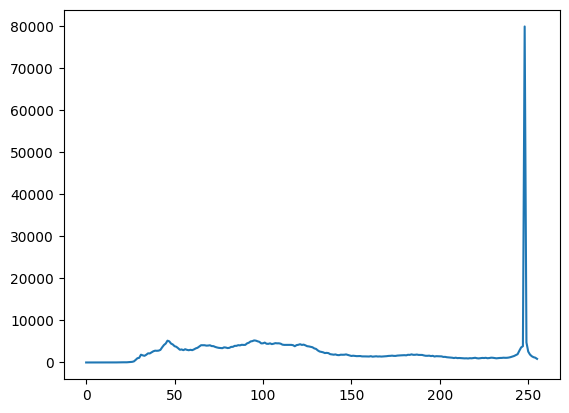

256
[4, 20, 30, 58, 103, 172, 224, 426, 608, 783, 792, 712, 657, 639, 731, 797, 821, 912, 925, 878, 850, 852, 852, 861, 860, 936, 903, 925, 1006, 990, 1025, 1019, 1081, 1055, 1129, 1135, 1204, 1284, 1284, 1243, 1317, 1279, 1388, 1333, 1314, 1324, 1346, 1352, 1414, 1445, 1392, 1420, 1416, 1445, 1456, 1441, 1447, 1522, 1586, 1605, 1584, 1699, 1728, 1829, 1890, 1870, 1956, 2018, 2087, 2257, 2236, 2387, 2428, 2725, 2848, 2859, 2963, 3105, 3264, 3400, 3661, 3964, 4281, 4336, 4386, 4561, 4305, 4502, 4882, 4938, 5356, 5671, 5553, 6077, 6105, 5781, 5712, 5709, 5693, 5869, 5717, 5797, 5532, 5393, 5160, 5441, 5265, 5272, 5407, 5415, 5422, 5294, 5469, 5398, 5286, 5170, 4973, 5135, 4863, 4927, 4649, 4784, 4551, 4496, 4678, 4806, 4788, 4700, 4650, 4613, 4735, 4982, 5166, 5116, 4700, 5208, 5056, 5017, 5172, 4854, 4874, 4820, 4533, 4891, 4790, 4652, 4466, 4455, 4339, 4196, 4303, 4110, 4160, 4156, 4092, 4146, 4230, 3714, 3621, 3934, 4358, 4306, 4480, 4211, 3983, 4122, 3675, 4018, 3958, 3514, 3597, 394

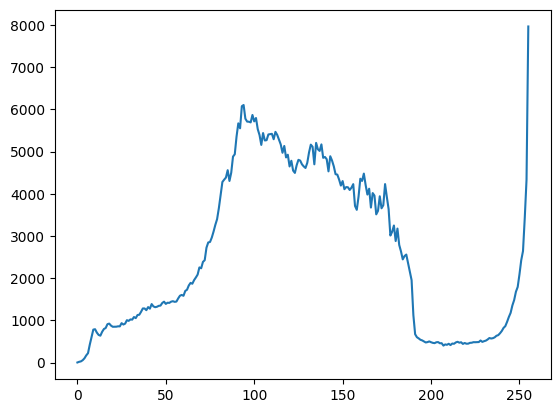

256
[8, 3, 2, 5, 7, 9, 8, 12, 3, 9, 6, 8, 10, 7, 5, 7, 4, 4, 6, 1, 1, 5, 1, 4, 3, 3, 2, 5, 6, 1, 1, 2, 3, 4, 4, 3, 0, 3, 1, 8, 4, 4, 1, 4, 3, 2, 4, 5, 5, 7, 11, 8, 8, 3, 6, 14, 17, 11, 18, 25, 22, 20, 46, 45, 51, 67, 87, 82, 76, 102, 148, 194, 202, 260, 250, 292, 377, 382, 420, 449, 508, 542, 594, 615, 713, 744, 813, 895, 1006, 1093, 1095, 1195, 1215, 1285, 1194, 1173, 1203, 1267, 1284, 1326, 1359, 1405, 1478, 1621, 1634, 1781, 1771, 1771, 1767, 1836, 1924, 2019, 2073, 2291, 2525, 2646, 3180, 3584, 4117, 4677, 5199, 5584, 6047, 6474, 6843, 7278, 7778, 8249, 8825, 9361, 9874, 10299, 10599, 10938, 10891, 10990, 10648, 10846, 10804, 10755, 10671, 10450, 10446, 10284, 10086, 10108, 10500, 10795, 11892, 12800, 13377, 13964, 14625, 15351, 15339, 15440, 15438, 14612, 14120, 11987, 10806, 9142, 7691, 6331, 5603, 5406, 5068, 4817, 4424, 3924, 3413, 3335, 3398, 3139, 2967, 2709, 2480, 2064, 1904, 1616, 1475, 1461, 1438, 1368, 1276, 1209, 1149, 1153, 1118, 1066, 1097, 1059, 1039, 992, 962, 945, 9

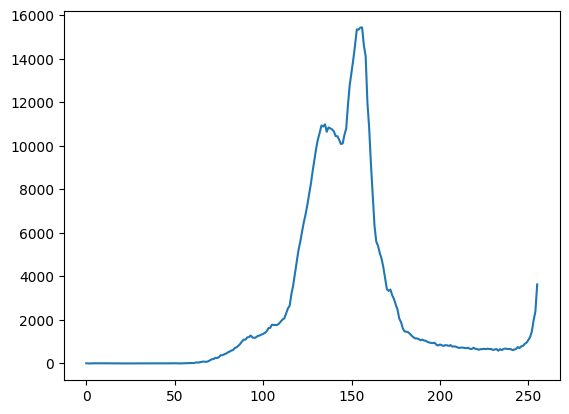

256
[0, 0, 0, 3, 1, 16, 30, 45, 115, 133, 200, 283, 372, 471, 557, 599, 751, 835, 1030, 1145, 1160, 1232, 1251, 1340, 1437, 1487, 1566, 1587, 1703, 1771, 1755, 1829, 1910, 2016, 2087, 2141, 2339, 2259, 2510, 2617, 2655, 2733, 3033, 2946, 3056, 3117, 3258, 3445, 3591, 3784, 4083, 4358, 4685, 5089, 5575, 6258, 7131, 7562, 7933, 8104, 8807, 9025, 8978, 9060, 8969, 9102, 9303, 9410, 9271, 9089, 8836, 8786, 8427, 7971, 7817, 7396, 6814, 6531, 6399, 6182, 5825, 5491, 5233, 5120, 4858, 4768, 4484, 4180, 3901, 4010, 3987, 3467, 3336, 3280, 2998, 2803, 2815, 2708, 2650, 2606, 2585, 2433, 2455, 2273, 2217, 2134, 2118, 2065, 2091, 1943, 1909, 1895, 1865, 1801, 1793, 1731, 1806, 1825, 1741, 1698, 1699, 1606, 1567, 1476, 1305, 1310, 1302, 1266, 1330, 1389, 1328, 1467, 1550, 1612, 1705, 1613, 1794, 1669, 1642, 1809, 1653, 1655, 1483, 1487, 1572, 1568, 1641, 1485, 1550, 1469, 1567, 1397, 1366, 1391, 1491, 1642, 1671, 1912, 2091, 2210, 2274, 2483, 2302, 2468, 2501, 2604, 3059, 3131, 3170, 3295, 3261, 

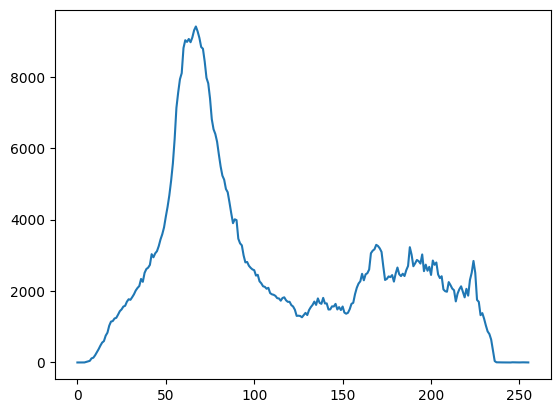

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 12, 13, 20, 37, 48, 95, 134, 209, 346, 579, 850, 907, 1123, 1233, 1215, 1081, 1059, 1041, 805, 705, 649, 562, 528, 471, 473, 436, 441, 473, 446, 421, 447, 448, 446, 428, 444, 436, 434, 530, 468, 526, 535, 539, 538, 549, 580, 586, 599, 630, 648, 663, 734, 751, 735, 803, 753, 793, 711, 762, 733, 694, 678, 715, 695, 669, 600, 636, 654, 678, 692, 592, 659, 650, 717, 658, 672, 660, 660, 712, 739, 752, 709, 744, 783, 818, 806, 792, 873, 837, 888, 875, 884, 902, 936, 905, 1019, 1322, 2181, 3510, 6193, 10431, 10447, 13265, 11073, 8720, 7930, 8007, 6291, 6164, 8855, 8638, 10312, 10725, 9800, 9590, 6699, 8074, 7805, 10754, 8233, 9007, 10941, 12584, 10301, 12511, 12377, 12847, 12861, 9091, 12886, 12980, 9775, 10905, 9682, 8838, 9410, 12353, 13068, 9258, 11720, 7743, 8260, 14610, 10595, 8757, 8850, 8542, 3714, 2222, 2132, 2154, 2284, 2526, 2318, 2435, 2310, 2366, 2135, 2215, 2305, 2512, 2328, 2281, 2157, 1967,

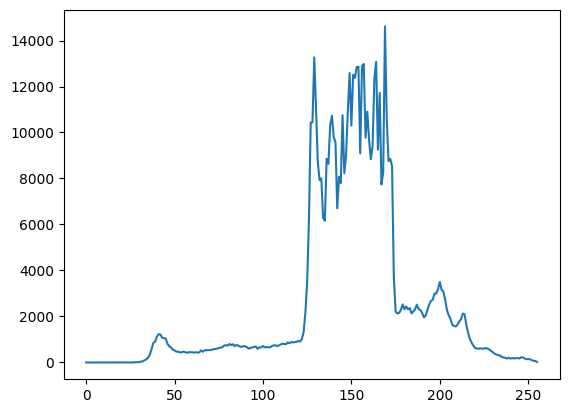

256
[1, 5, 9, 15, 45, 85, 135, 172, 234, 320, 398, 449, 612, 665, 745, 855, 979, 1152, 1272, 1371, 1371, 1458, 1424, 1455, 1570, 1598, 1656, 1755, 1763, 1889, 1985, 2100, 2174, 2307, 2404, 2379, 2424, 2589, 2576, 2834, 3021, 3150, 3310, 3588, 3603, 3763, 3996, 4062, 4712, 5321, 5990, 6663, 6977, 7559, 8242, 8563, 8721, 8698, 8836, 8724, 8650, 8758, 8875, 9120, 9560, 9493, 9425, 9183, 8774, 8255, 8155, 7250, 6683, 6304, 6061, 5868, 5431, 5212, 5222, 4746, 4536, 4462, 4293, 4117, 4002, 3924, 3938, 3775, 3862, 3688, 3752, 3694, 3450, 3333, 3061, 2811, 2767, 2730, 2594, 2392, 2475, 2409, 2355, 2153, 2258, 2271, 2070, 1995, 1918, 1937, 1822, 1820, 1730, 1717, 1588, 1546, 1510, 1491, 1434, 1474, 1388, 1474, 1467, 1458, 1440, 1510, 1448, 1452, 1315, 1430, 1329, 1303, 1332, 1371, 1421, 1418, 1347, 1369, 1386, 1242, 1298, 1365, 1443, 1289, 1217, 1268, 1362, 1450, 1469, 1404, 1755, 1532, 1660, 1422, 1486, 1485, 1529, 1922, 2028, 1869, 1880, 1817, 2078, 2050, 2121, 2245, 2468, 2629, 2489, 2982, 2

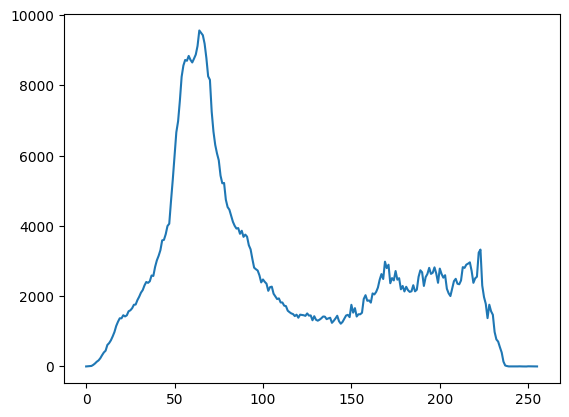

256
[1, 7, 10, 20, 15, 18, 30, 43, 81, 121, 155, 249, 349, 452, 602, 727, 826, 973, 1023, 1201, 1259, 1843, 2576, 3597, 3450, 3134, 3224, 3597, 3895, 4114, 4777, 5359, 5513, 5116, 5463, 5869, 5923, 5569, 4925, 4527, 4297, 3967, 3804, 3731, 3606, 3806, 3895, 4013, 3996, 4174, 4375, 4512, 4817, 4982, 5150, 5067, 4875, 5266, 5096, 4731, 4314, 3966, 4047, 3886, 3812, 3640, 4146, 4481, 4505, 4386, 4145, 3885, 3624, 3280, 3305, 3220, 3387, 3645, 3887, 4008, 3544, 3291, 3435, 3414, 3440, 3327, 3019, 2737, 2777, 2835, 2682, 2672, 2441, 2368, 2289, 2128, 2187, 2091, 2119, 1903, 1806, 1571, 1435, 1248, 1228, 1176, 1125, 1160, 1131, 1144, 1122, 1158, 1077, 1043, 1058, 1054, 986, 994, 982, 932, 962, 889, 877, 862, 875, 879, 911, 919, 918, 955, 901, 856, 874, 965, 928, 979, 969, 985, 956, 1042, 1035, 1102, 1070, 957, 1058, 913, 864, 850, 875, 804, 795, 771, 777, 801, 752, 740, 778, 737, 813, 795, 747, 761, 823, 765, 786, 823, 851, 827, 859, 836, 866, 893, 870, 916, 891, 874, 925, 922, 872, 889, 981

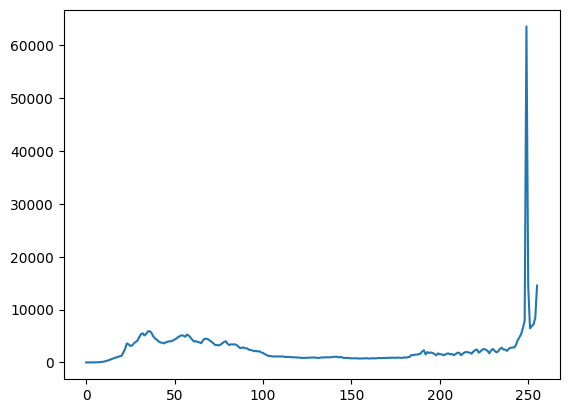

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 0, 3, 6, 22, 40, 47, 84, 115, 269, 516, 956, 1119, 1228, 1263, 1304, 1197, 971, 741, 664, 579, 520, 524, 587, 599, 655, 759, 840, 874, 968, 1214, 1190, 1088, 1000, 907, 907, 909, 842, 821, 815, 726, 772, 800, 802, 797, 879, 873, 869, 1005, 1070, 1156, 1247, 1331, 1474, 1422, 1569, 1662, 1683, 1737, 1925, 1831, 1636, 1476, 1312, 1242, 1207, 1110, 1078, 1030, 1033, 1029, 931, 948, 993, 1011, 995, 1026, 1124, 1099, 1130, 1108, 1092, 1198, 1215, 1150, 1237, 1311, 1316, 1417, 1527, 1564, 1758, 1838, 2037, 2128, 2312, 2555, 3055, 3803, 6074, 7262, 8079, 9964, 10215, 12348, 12139, 9290, 9888, 9417, 9055, 10314, 10104, 9785, 11951, 11828, 11376, 11123, 10744, 7476, 7455, 7538, 7295, 8674, 11394, 9926, 12066, 10174, 7726, 6805, 7993, 9592, 10979, 9903, 9753, 8907, 13700, 12411, 12786, 10501, 10006, 7650, 9846, 13587, 13221, 11113, 9742, 10071, 9873, 9982, 6228, 2156, 1863, 1570, 1184, 1022, 854, 750, 634, 579, 522, 534, 533, 561, 

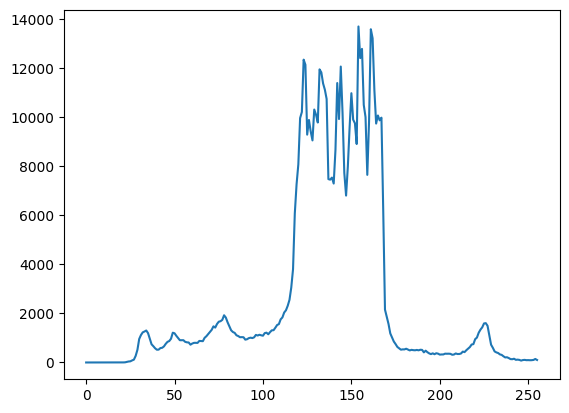

256
[0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 4, 4, 7, 19, 24, 27, 50, 96, 204, 302, 427, 502, 616, 701, 771, 915, 901, 929, 987, 1084, 1316, 1541, 1702, 2103, 2057, 2064, 2181, 2071, 1985, 2060, 2004, 2108, 2227, 2245, 2293, 2298, 2278, 2211, 2272, 2371, 2397, 2512, 2565, 2646, 2825, 2836, 2950, 3177, 3232, 3447, 3505, 3630, 3847, 3866, 4233, 4389, 4508, 4555, 4696, 4577, 4493, 4541, 4530, 4645, 4451, 4654, 4808, 4853, 4679, 4643, 4623, 4529, 4507, 4637, 4302, 4311, 4447, 4338, 4389, 4591, 4627, 4493, 4645, 4614, 4660, 4764, 4640, 4705, 4614, 4577, 4670, 4713, 4632, 4601, 4736, 4664, 4721, 4772, 4838, 4747, 4943, 4875, 4851, 4701, 4636, 4678, 4593, 4622, 4495, 4606, 4744, 4875, 4938, 5205, 5210, 4985, 4833, 4470, 4176, 3788, 3466, 3208, 3109, 2848, 2882, 2652, 2658, 2622, 2535, 2451, 2329, 2266, 2249, 2250, 2231, 2207, 2017, 2108, 2152, 2050, 2092, 2044, 2039, 2065, 2035, 2052, 2026, 1797, 1897, 1899, 1867, 1837, 1775, 1859, 1799, 1917, 1825, 1889, 1936, 1906, 1921, 1865, 1782, 1725, 16

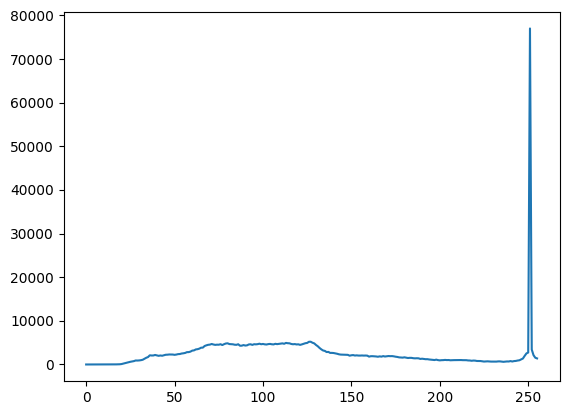

256
[1, 1, 1, 15, 13, 22, 30, 75, 121, 150, 234, 316, 390, 487, 601, 715, 895, 958, 1029, 1043, 1212, 1214, 1348, 1386, 1496, 1474, 1615, 1574, 1799, 1832, 1909, 1807, 1864, 2054, 2139, 2156, 2141, 2246, 2273, 2363, 2419, 2590, 2752, 2765, 2829, 2937, 3057, 3162, 3187, 3354, 3380, 3661, 3810, 4095, 4524, 4774, 5350, 5687, 6186, 6777, 6964, 7465, 8024, 8240, 8350, 8410, 8516, 8625, 8856, 8654, 8718, 8816, 8364, 8294, 7975, 7465, 7010, 6734, 6226, 5999, 5635, 5529, 5290, 5085, 4790, 4722, 4499, 4370, 4244, 4145, 4097, 3999, 3972, 3787, 3704, 3676, 3732, 3439, 3232, 3072, 2857, 2757, 2651, 2647, 2477, 2520, 2462, 2314, 2248, 2176, 2145, 2055, 2011, 2055, 2023, 2000, 1866, 1727, 1737, 1630, 1629, 1615, 1527, 1570, 1422, 1544, 1508, 1511, 1451, 1380, 1359, 1387, 1404, 1229, 1183, 1187, 1189, 1153, 1084, 1136, 1157, 1093, 1055, 1005, 1037, 951, 946, 927, 970, 941, 1012, 929, 1121, 1119, 1184, 1180, 1225, 1304, 1413, 1427, 1372, 1421, 1514, 1387, 1450, 1250, 1178, 1258, 1371, 1338, 1439, 1590

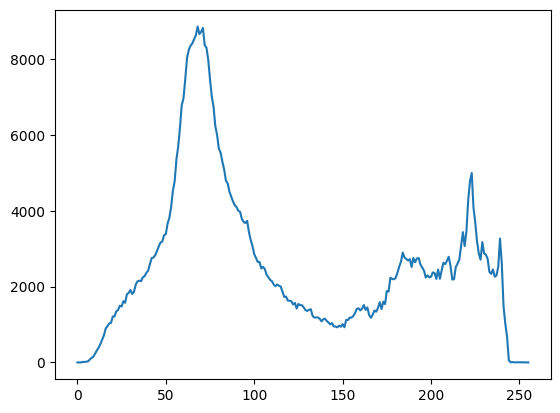

256
[49, 107, 152, 221, 254, 360, 445, 602, 799, 999, 1174, 1429, 1564, 1666, 1585, 1667, 1625, 1748, 1791, 1946, 2005, 2109, 2297, 2367, 2418, 2479, 2512, 2762, 2611, 2802, 3028, 2918, 2987, 3116, 3238, 3303, 3241, 3317, 3304, 3263, 3247, 3330, 3224, 3197, 3081, 3091, 2979, 3023, 2919, 2997, 2908, 2724, 2718, 2650, 2635, 2572, 2455, 2505, 2446, 2438, 2329, 2479, 2293, 2289, 2216, 2246, 2066, 2009, 2098, 2324, 2581, 2812, 3581, 4889, 5056, 6536, 7444, 6380, 6016, 5166, 5828, 5110, 5461, 4560, 5253, 5933, 5606, 4765, 5044, 5817, 6426, 7061, 6783, 6041, 6185, 6191, 6423, 7675, 9177, 8941, 8832, 10371, 10900, 11922, 12658, 11373, 12598, 14301, 13723, 12929, 12136, 8912, 6461, 4935, 4623, 4032, 3778, 3551, 3359, 3199, 2839, 2661, 2379, 2082, 2027, 1828, 1679, 1700, 1653, 1592, 1563, 1509, 1540, 1597, 1531, 1495, 1565, 1505, 1546, 1450, 1502, 1494, 1476, 1521, 1481, 1498, 1481, 1501, 1533, 1551, 1532, 1587, 1635, 1667, 1767, 1795, 1811, 1779, 1839, 1829, 1839, 1746, 1737, 1686, 1661, 1549, 

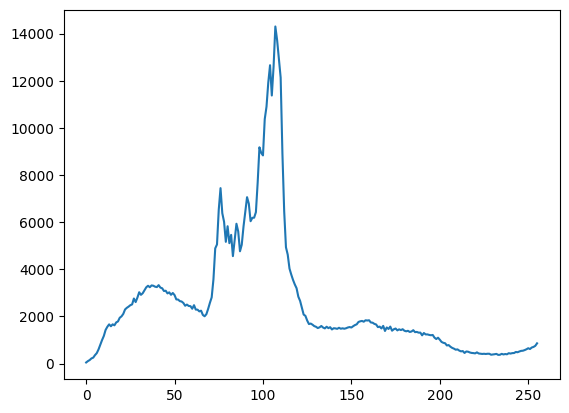

256
[7, 7, 8, 19, 25, 34, 37, 60, 68, 85, 93, 142, 210, 250, 301, 384, 448, 535, 781, 1055, 1376, 1861, 1977, 2025, 2125, 2379, 2702, 2430, 2404, 2378, 2511, 2619, 2620, 2641, 2714, 2905, 2917, 2926, 2869, 2972, 2997, 3009, 2986, 3171, 3245, 3240, 3390, 3350, 3365, 3409, 3322, 3248, 3259, 3358, 3364, 3285, 3385, 3327, 3373, 3339, 3593, 3504, 3399, 3468, 3429, 3370, 3428, 3600, 3483, 3428, 3580, 3461, 3403, 3489, 3353, 3382, 3398, 3544, 3532, 3673, 3639, 3540, 3617, 3610, 3547, 3679, 3702, 3574, 3563, 3547, 3621, 3616, 3670, 3613, 3639, 3576, 3546, 3548, 3471, 3383, 3512, 3453, 3572, 3388, 3408, 3490, 3507, 3698, 3720, 3842, 3958, 3955, 3873, 3909, 4059, 4372, 4584, 4333, 4505, 4463, 4833, 4843, 5034, 5296, 5049, 5224, 5321, 5426, 5587, 5614, 5820, 5931, 5965, 6380, 6633, 6584, 6642, 6719, 7034, 6209, 6051, 6141, 5914, 5645, 5245, 5158, 4864, 4703, 4617, 4546, 4355, 4350, 3878, 3890, 3817, 3883, 3701, 3578, 3394, 3333, 3094, 3188, 3284, 3463, 3251, 3223, 2922, 2908, 3029, 3105, 3230, 29

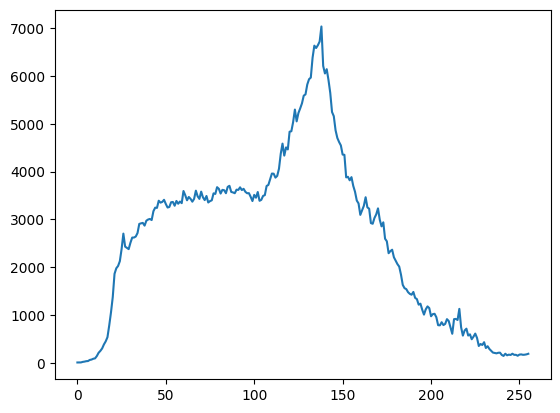

256
[0, 0, 0, 2, 1, 3, 5, 2, 4, 5, 2, 7, 8, 11, 18, 14, 26, 34, 37, 44, 49, 39, 46, 58, 82, 71, 68, 97, 142, 151, 235, 355, 460, 748, 977, 1307, 1603, 2115, 2678, 3299, 3746, 4038, 4308, 4362, 4198, 4462, 4488, 4605, 4995, 5121, 5187, 5772, 6415, 7333, 8903, 11465, 12155, 14793, 16180, 16004, 17488, 16146, 13759, 12950, 11341, 10465, 10239, 9587, 9430, 10239, 10210, 8701, 8393, 6961, 5891, 5275, 4674, 4127, 3377, 2972, 2897, 3074, 3093, 3157, 3434, 3600, 3390, 3697, 3553, 3313, 3393, 3081, 3025, 2902, 2831, 3047, 2805, 2764, 2544, 2533, 2566, 2331, 2103, 2098, 2008, 1952, 1980, 2003, 2170, 2485, 2687, 2820, 2595, 2520, 2318, 2247, 2168, 2164, 2255, 2012, 2086, 2186, 1991, 1977, 1972, 1932, 1900, 1850, 1747, 1773, 1759, 1691, 1652, 1715, 1726, 1793, 1660, 1549, 1542, 1608, 1535, 1470, 1255, 1158, 1183, 1173, 1093, 1070, 1088, 996, 990, 919, 937, 917, 899, 915, 963, 886, 910, 888, 876, 941, 902, 902, 923, 875, 883, 887, 903, 951, 917, 917, 907, 918, 884, 903, 962, 935, 963, 940, 949, 928

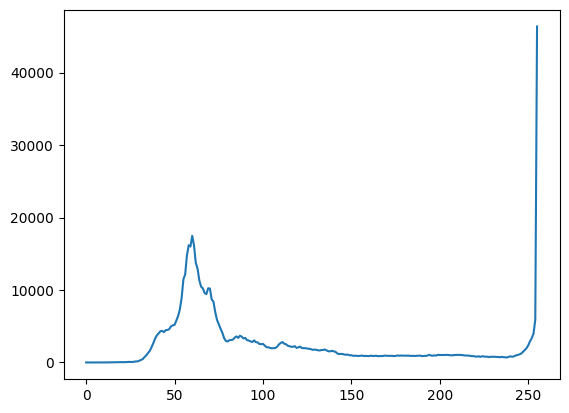

256
[0, 0, 1, 0, 1, 0, 1, 5, 2, 6, 5, 10, 13, 12, 9, 11, 24, 21, 23, 40, 44, 60, 79, 101, 178, 196, 286, 450, 650, 793, 1182, 1480, 1895, 2278, 2768, 3356, 3722, 3786, 3860, 3906, 4119, 4146, 5043, 6026, 6659, 8267, 10058, 11296, 13756, 16365, 17054, 18138, 16474, 13678, 13000, 11637, 10871, 11398, 11615, 11309, 11040, 10914, 8718, 7609, 5975, 4958, 4446, 3749, 3805, 3881, 3918, 4095, 4252, 4150, 4082, 3975, 3892, 3678, 3471, 3322, 3383, 3188, 2848, 2649, 2451, 2259, 1941, 1819, 1739, 1682, 1648, 1864, 2039, 2472, 2551, 2470, 1989, 1850, 1875, 1938, 1980, 2017, 2006, 2063, 2099, 2041, 2036, 2067, 2125, 2089, 2026, 2131, 2096, 2243, 2416, 2217, 2276, 2144, 2147, 2096, 1982, 1966, 1854, 1853, 1724, 1652, 1622, 1493, 1481, 1449, 1371, 1269, 1288, 1183, 1119, 1123, 1160, 1123, 1080, 1113, 1024, 1101, 1145, 1122, 1134, 1129, 1144, 1147, 1102, 1144, 1157, 1211, 1140, 1175, 1169, 1204, 1208, 1232, 1210, 1231, 1265, 1240, 1247, 1244, 1418, 1387, 1320, 1378, 1409, 1353, 1435, 1418, 1427, 1382, 

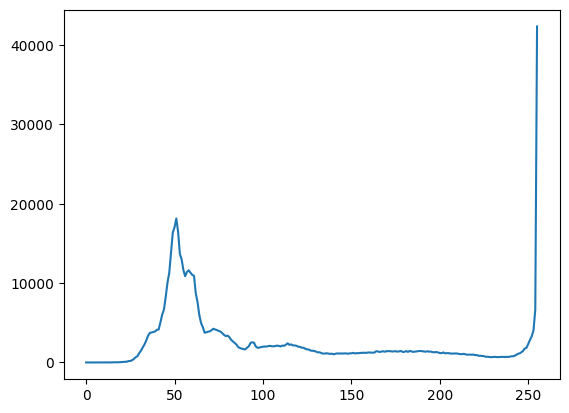

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 7, 26, 72, 78, 124, 223, 381, 499, 619, 789, 930, 1055, 1141, 1247, 1064, 1003, 722, 510, 420, 318, 308, 256, 287, 290, 276, 292, 337, 393, 443, 457, 477, 596, 553, 674, 774, 979, 1258, 1193, 1194, 1465, 1818, 2354, 2189, 2695, 2620, 2641, 2579, 2879, 2801, 2641, 2588, 2531, 2674, 2674, 2837, 2958, 3150, 2998, 2944, 3171, 3478, 3625, 3598, 3432, 3318, 3295, 3663, 3762, 3400, 3006, 2712, 2523, 2419, 2303, 2341, 2247, 2138, 2224, 2138, 2101, 2113, 2108, 1997, 1842, 1915, 1723, 1728, 1695, 1705, 1519, 1738, 2694, 2561, 2339, 2068, 2049, 2153, 2133, 1993, 1979, 2004, 1856, 1790, 1616, 1515, 1519, 1571, 1448, 1461, 1435, 1542, 1739, 1576, 1641, 1623, 1540, 1346, 1238, 1196, 1047, 919, 831, 738, 642, 700, 753, 1191, 1112, 1622, 3097, 5660, 4462, 6831, 7439, 6697, 5788, 7980, 10721, 10931, 10381, 10495, 7682, 9555, 8140, 11146, 12302, 10178, 10787, 11439, 11851, 10551, 11578, 7995, 11383, 14855, 9047, 7960, 10924, 12107

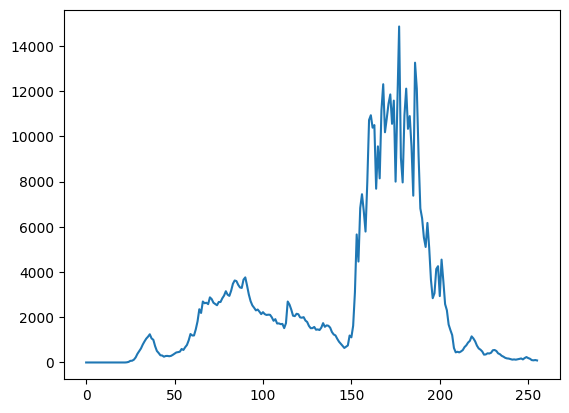

256
[0, 0, 5, 5, 4, 2, 2, 3, 5, 6, 7, 11, 6, 11, 10, 13, 20, 24, 35, 37, 27, 50, 52, 55, 91, 105, 121, 150, 213, 262, 361, 466, 607, 827, 1033, 1178, 1452, 1715, 1911, 1982, 2171, 2368, 2339, 2565, 2684, 2657, 2611, 2777, 2926, 3190, 3451, 3586, 3516, 3465, 3340, 3401, 3574, 3772, 3440, 3312, 3198, 3046, 2855, 2750, 2668, 2672, 2513, 2680, 2638, 2447, 2497, 2449, 2287, 2391, 2316, 2336, 2386, 2370, 2441, 2397, 2474, 2365, 2432, 2469, 2433, 2412, 2423, 2480, 2528, 2627, 2777, 2937, 3351, 4115, 5286, 6830, 7876, 8611, 8396, 7711, 6471, 5912, 5454, 5404, 5794, 6118, 6681, 7043, 7254, 7698, 7839, 8248, 8636, 9026, 9470, 10092, 10484, 11115, 11265, 11497, 11352, 10810, 10348, 9758, 9324, 8916, 8335, 7752, 7072, 6750, 6147, 5547, 5315, 5068, 4444, 4297, 3953, 3823, 3535, 3331, 3292, 3192, 3076, 3012, 2843, 2818, 2763, 2525, 2547, 2515, 2323, 2264, 2146, 2136, 2044, 1979, 2088, 2074, 2181, 2235, 2406, 2480, 2507, 2483, 2474, 2384, 2182, 2308, 2124, 2151, 2117, 2051, 2041, 1947, 1973, 2046, 19

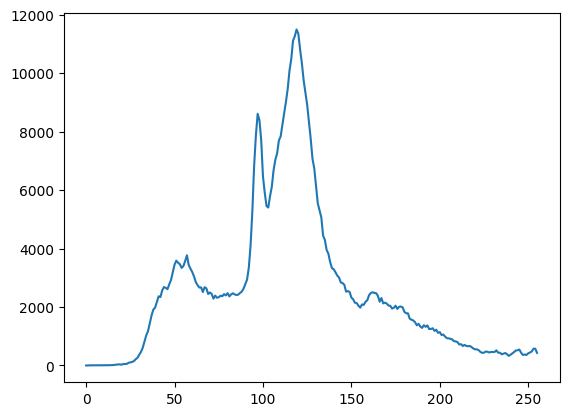

256
[0, 8, 8, 29, 47, 75, 134, 191, 241, 324, 406, 542, 638, 733, 865, 1011, 1169, 1255, 1354, 1528, 1381, 1490, 1622, 1780, 1733, 1869, 1906, 1953, 2074, 2119, 2242, 2377, 2547, 2655, 2792, 2837, 3033, 2911, 3228, 3369, 3372, 3463, 3862, 3861, 3993, 4498, 4884, 5310, 5945, 6519, 6785, 7348, 7659, 8094, 8361, 8118, 8263, 8417, 8511, 8980, 9490, 10024, 10092, 10661, 10289, 9667, 9093, 8293, 7834, 7593, 6997, 6589, 6374, 5998, 5864, 5473, 5096, 4928, 4788, 4670, 4446, 4409, 4152, 4186, 3973, 3768, 3741, 3812, 4022, 3578, 3170, 3025, 2939, 2775, 2713, 2518, 2526, 2344, 2323, 2188, 2064, 2048, 1849, 1702, 1728, 1743, 1558, 1630, 1644, 1650, 1595, 1577, 1564, 1566, 1532, 1547, 1552, 1443, 1400, 1459, 1513, 1385, 1386, 1356, 1371, 1295, 1362, 1577, 1726, 1761, 1848, 1833, 1831, 1840, 1781, 1746, 1788, 1571, 1525, 1410, 1310, 1284, 1266, 1178, 1200, 1253, 1360, 1456, 1693, 1750, 1951, 2089, 2012, 2154, 2221, 2341, 2429, 2623, 2754, 2861, 2830, 2751, 2640, 2842, 2839, 2732, 2537, 2538, 2436, 2

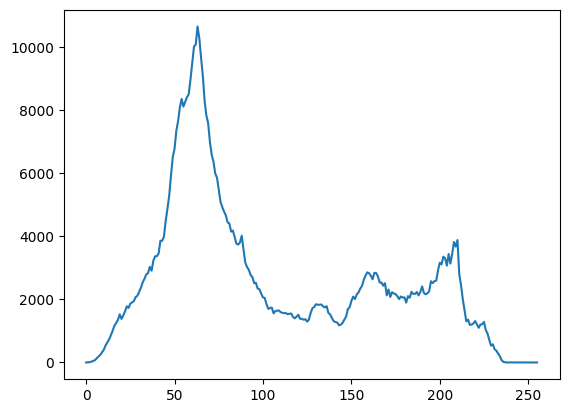

256
[3, 3, 6, 4, 7, 15, 8, 14, 14, 16, 18, 26, 34, 31, 27, 30, 41, 47, 51, 57, 73, 83, 72, 93, 124, 178, 264, 340, 405, 457, 642, 858, 1038, 1452, 1830, 2305, 2634, 3057, 3218, 3621, 3753, 3712, 3909, 3930, 3975, 4123, 4127, 4336, 4520, 4895, 4990, 5764, 6454, 6867, 8191, 9559, 10850, 12743, 14411, 15440, 15847, 15478, 13555, 12549, 11307, 9826, 10204, 9458, 8708, 9021, 9441, 9320, 10415, 9418, 7448, 6735, 5749, 4803, 4300, 4050, 3448, 3089, 2814, 2919, 3169, 3285, 3357, 3409, 3322, 3178, 3109, 3146, 2868, 3081, 2909, 2822, 2793, 2872, 2760, 2805, 2816, 2657, 2628, 2662, 2465, 2386, 2397, 2109, 2136, 2021, 2083, 2150, 2140, 2309, 2574, 2608, 2819, 2832, 2772, 2505, 2351, 2270, 2184, 2156, 2142, 2061, 1997, 1889, 1832, 1764, 1771, 1678, 1674, 1605, 1579, 1556, 1577, 1502, 1560, 1454, 1469, 1409, 1383, 1426, 1334, 1337, 1315, 1198, 1166, 1103, 1076, 1061, 989, 1007, 984, 994, 926, 923, 858, 931, 937, 906, 878, 881, 870, 870, 870, 837, 852, 907, 851, 852, 869, 840, 892, 903, 877, 908, 913

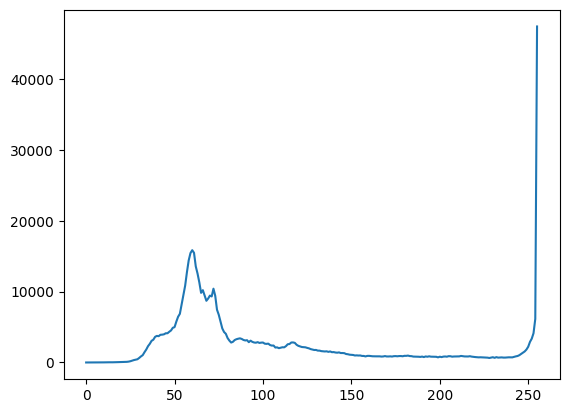

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 4, 8, 5, 31, 34, 66, 125, 278, 380, 438, 520, 570, 634, 697, 712, 764, 917, 998, 1145, 1260, 1382, 1523, 1630, 1620, 1613, 1661, 1631, 1616, 1643, 1590, 1463, 1443, 1451, 1461, 1418, 1446, 1434, 1505, 1517, 1574, 1714, 1884, 2012, 2220, 2288, 2380, 2456, 2612, 2805, 2975, 3109, 3121, 3166, 3271, 3187, 3296, 3207, 3332, 3543, 3451, 3606, 3702, 3844, 3827, 4035, 4315, 4260, 4460, 4338, 4204, 4338, 4519, 4816, 5002, 5004, 5265, 5166, 5180, 5000, 5071, 5229, 5187, 4946, 4872, 4962, 4902, 4958, 4856, 4910, 4815, 4893, 5013, 4935, 4988, 4963, 4878, 4894, 4891, 4885, 4910, 5012, 5302, 5228, 5380, 5372, 5511, 5570, 5493, 5486, 5292, 5262, 5304, 5217, 5102, 4664, 4400, 4611, 4513, 4370, 4489, 4531, 4287, 4136, 3961, 3867, 3619, 3565, 3385, 3144, 3014, 3025, 2884, 2835, 2699, 2770, 2758, 2678, 2687, 2581, 2619, 2700, 2660, 2518, 2549, 2643, 2535, 2498, 2422, 2231, 2203, 2158, 2033, 2020, 1941, 1897, 1933, 1852, 1924, 1850, 1851, 1840, 18

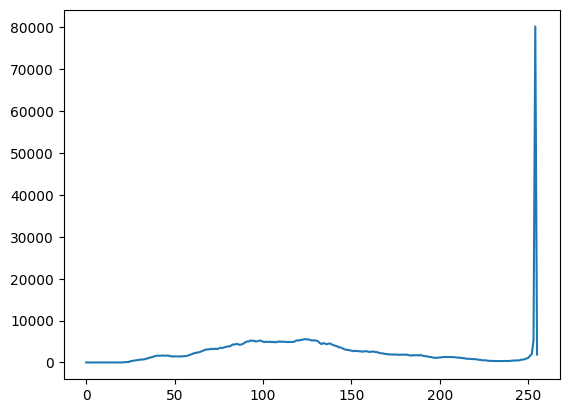

256
[39, 130, 198, 276, 413, 665, 860, 1224, 1759, 2262, 2758, 3164, 3261, 3497, 3455, 3468, 3516, 3478, 3517, 3635, 3746, 3762, 3778, 3745, 3753, 3681, 3564, 3605, 3548, 3573, 3545, 3423, 3460, 3367, 3283, 3087, 3073, 2937, 2800, 2731, 2657, 2534, 2528, 2436, 2312, 2447, 2309, 2248, 2157, 2084, 1991, 2091, 1933, 1964, 1832, 1879, 1846, 1932, 1910, 1972, 1888, 1967, 1899, 2024, 2081, 2175, 2259, 2365, 2337, 2490, 2609, 2686, 3066, 3248, 3132, 3077, 3146, 3343, 3416, 3187, 3127, 3278, 3563, 3486, 3996, 4122, 4567, 5190, 5266, 5670, 5793, 5398, 5481, 5521, 5765, 5766, 6028, 5722, 6116, 5827, 5969, 5860, 6154, 6198, 6168, 6296, 5518, 5247, 5188, 5195, 5151, 5194, 5013, 5495, 5292, 5438, 5241, 5443, 5235, 5718, 6215, 6319, 7334, 8583, 9188, 10021, 11178, 12340, 11969, 11868, 10824, 11642, 11472, 9880, 8285, 5830, 4192, 3536, 3163, 2788, 2419, 2261, 2115, 2091, 2041, 1866, 1633, 1579, 1554, 1435, 1279, 1334, 1234, 1128, 1067, 1070, 1015, 945, 872, 928, 899, 918, 897, 880, 891, 862, 790, 814

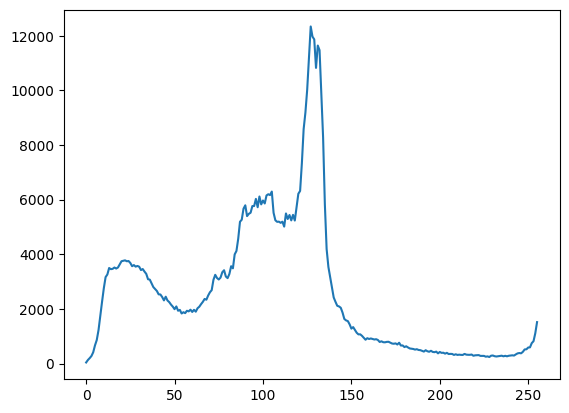

256
[0, 0, 0, 2, 9, 7, 20, 37, 55, 82, 118, 152, 241, 308, 390, 442, 524, 623, 658, 684, 800, 859, 909, 879, 821, 949, 1054, 1100, 1144, 1207, 1270, 1310, 1391, 1430, 1614, 1557, 1672, 1795, 1855, 1838, 1914, 1976, 2161, 2248, 2275, 2262, 2368, 2325, 2547, 2639, 2798, 3014, 3207, 3356, 3521, 3707, 4085, 4390, 4605, 5216, 5834, 6298, 7111, 7449, 7752, 7956, 8221, 8423, 8458, 8543, 8845, 8516, 8961, 8934, 8760, 8309, 8201, 8005, 8014, 7538, 7140, 6811, 6335, 6215, 5935, 5603, 5345, 5210, 4923, 4682, 4534, 4327, 4163, 3996, 3934, 3882, 3783, 3657, 3540, 3433, 3302, 3444, 3336, 3469, 3273, 3223, 3165, 2807, 2556, 2439, 2390, 2285, 2258, 2169, 2036, 1998, 2030, 1974, 1873, 1767, 1754, 1761, 1619, 1622, 1486, 1534, 1451, 1444, 1446, 1383, 1323, 1262, 1209, 1226, 1170, 1133, 1161, 1088, 1076, 1106, 1001, 1074, 1048, 1074, 1131, 1053, 1100, 986, 992, 987, 1029, 1027, 1045, 1018, 1044, 1030, 1031, 1063, 1208, 1279, 1250, 1138, 1140, 1080, 1275, 1067, 1011, 1153, 1209, 1363, 1659, 1933, 2086, 19

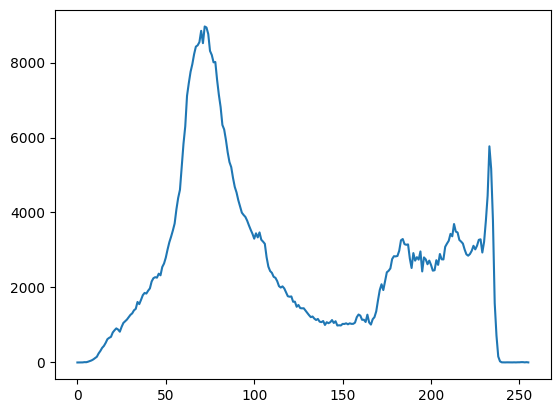

256
[10, 27, 36, 54, 76, 74, 88, 89, 118, 130, 144, 182, 212, 214, 233, 244, 227, 241, 267, 240, 219, 255, 267, 283, 240, 281, 285, 279, 277, 286, 326, 306, 343, 365, 382, 407, 428, 454, 516, 525, 484, 580, 592, 681, 709, 735, 733, 824, 874, 894, 883, 957, 1019, 1040, 1145, 1136, 1188, 1161, 1142, 1265, 1270, 1308, 1360, 1393, 1508, 1563, 1560, 1622, 1742, 1665, 1709, 1601, 1567, 1666, 1646, 1564, 1574, 1572, 1510, 1484, 1462, 1556, 1515, 1489, 1499, 1632, 1591, 1640, 1638, 1667, 1846, 1995, 2005, 2153, 2289, 2363, 2576, 2785, 2786, 2969, 3061, 3336, 3541, 3773, 3919, 4351, 4573, 4841, 5076, 5375, 5778, 5883, 6201, 6457, 6492, 6630, 6796, 6891, 7121, 7113, 7135, 7261, 6998, 6981, 7039, 6809, 6416, 6163, 5843, 5463, 5430, 5129, 4865, 4533, 4372, 4336, 4375, 4168, 4131, 4006, 3920, 3692, 3624, 3584, 3543, 3402, 3248, 3137, 3059, 2916, 3025, 2887, 2798, 2715, 2704, 2609, 2593, 2449, 2437, 2391, 2288, 2389, 2278, 2343, 2249, 2235, 2221, 2129, 2217, 2207, 2278, 2258, 2274, 2294, 2340, 2237,

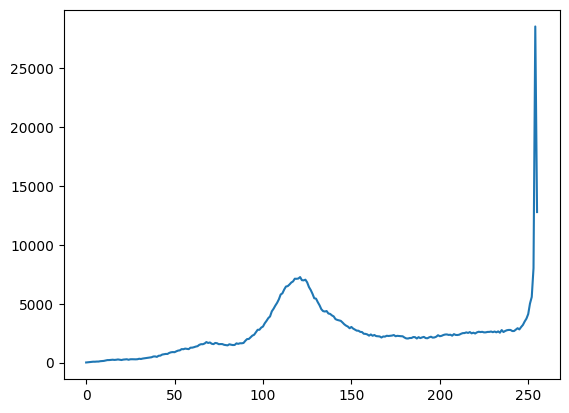

256
[3, 11, 39, 94, 290, 831, 2580, 3856, 3601, 3378, 3168, 3264, 3584, 3407, 2868, 2410, 2247, 2385, 2432, 2819, 2904, 2938, 3121, 3309, 3738, 3795, 3301, 3106, 3406, 3721, 3858, 3707, 3160, 2908, 3307, 3302, 2960, 2997, 2827, 2686, 2684, 2952, 3132, 3205, 3195, 3303, 3658, 3651, 3576, 3469, 3598, 3561, 3803, 3603, 3572, 3565, 3741, 3576, 3622, 3779, 3908, 4052, 4028, 3925, 3897, 3908, 3912, 3987, 3883, 4038, 3935, 4032, 4195, 4502, 4892, 4876, 5004, 5191, 5148, 5164, 5222, 5399, 5396, 5337, 5555, 5755, 5597, 5519, 5686, 5850, 5770, 5926, 5672, 5918, 5669, 5536, 5632, 5522, 5813, 5759, 6024, 6235, 6626, 7026, 7051, 6701, 6611, 6322, 6058, 5861, 5745, 5414, 5092, 5012, 4794, 4504, 4608, 4768, 4659, 4827, 4413, 4584, 4434, 4235, 4094, 4249, 3924, 3967, 4066, 3895, 3835, 3687, 3414, 3136, 2967, 2745, 2577, 2489, 2460, 2303, 2227, 2138, 2064, 2060, 2022, 1957, 2137, 2146, 1916, 1929, 1874, 1907, 1957, 1766, 1774, 1680, 1666, 1678, 1566, 1564, 1481, 1443, 1476, 1327, 1177, 1106, 1109, 1005

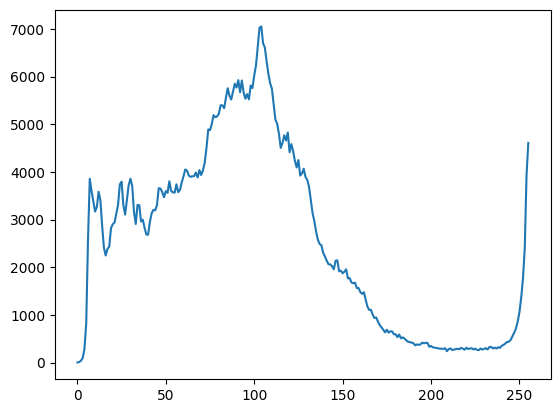

256
[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 3, 3, 11, 9, 23, 28, 26, 80, 136, 538, 609, 1112, 1286, 1601, 2276, 3289, 4063, 4992, 5802, 6264, 5447, 5255, 4484, 3763, 3158, 3284, 3599, 3625, 3550, 3581, 3703, 3806, 3869, 4069, 4096, 4256, 4332, 4132, 3990, 3914, 3856, 3750, 3835, 3846, 3852, 4035, 4262, 4727, 4871, 5189, 5167, 5109, 5312, 5470, 5460, 5619, 5699, 5761, 5891, 5601, 5176, 4841, 4450, 4267, 4215, 4268, 4465, 4653, 4402, 4506, 4348, 4319, 4198, 4131, 4188, 4132, 4231, 4280, 4031, 4138, 4163, 4400, 4264, 4195, 4025, 3948, 3746, 3622, 3563, 3503, 3376, 3405, 3358, 3433, 3357, 3227, 3355, 3307, 3284, 3252, 3222, 3237, 3214, 3219, 3104, 3222, 3160, 3184, 3120, 3054, 2923, 2918, 2851, 2696, 2700, 2597, 2489, 2491, 2500, 2446, 2373, 2295, 2233, 2101, 2070, 2212, 2261, 2137, 2104, 2014, 2028, 1834, 1867, 1813, 1741, 1768, 1631, 1802, 1676, 1808, 1782, 1847, 1879, 1908, 1876, 2005, 2004, 1966, 2004, 2049, 1965, 1916, 1888, 1841, 1859, 1874, 1886, 1796, 1781, 1737, 1703, 175

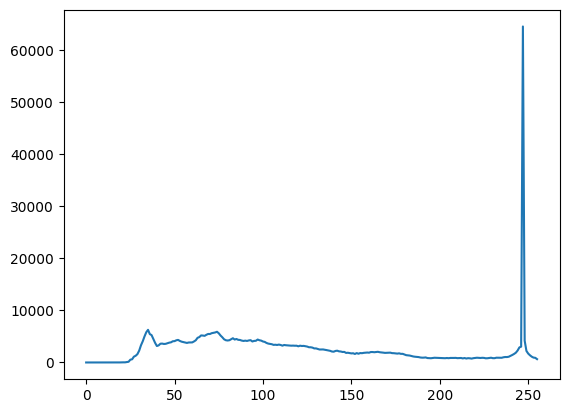

256
[7, 8, 3, 3, 8, 6, 8, 6, 7, 2, 4, 11, 10, 7, 8, 6, 7, 6, 9, 5, 4, 6, 4, 4, 4, 6, 7, 1, 2, 7, 8, 3, 5, 5, 2, 7, 10, 9, 10, 13, 15, 11, 6, 13, 12, 10, 13, 18, 27, 22, 31, 29, 35, 50, 81, 91, 109, 146, 173, 215, 245, 292, 394, 508, 619, 711, 771, 693, 697, 658, 712, 658, 806, 766, 832, 870, 882, 946, 1034, 1100, 1086, 1121, 1173, 1150, 1209, 1227, 1228, 1295, 1285, 1346, 1340, 1390, 1495, 1468, 1675, 1740, 1808, 1729, 1774, 1761, 1787, 1764, 1928, 1904, 2068, 2081, 2059, 2086, 2285, 2310, 2589, 2705, 2968, 3210, 3697, 4084, 4396, 4902, 5418, 5835, 6043, 6235, 6457, 6517, 7015, 7187, 7702, 7803, 8426, 8626, 9362, 9884, 9953, 10545, 10528, 10681, 10585, 10717, 10599, 10458, 10516, 10567, 10408, 10605, 10425, 10775, 10624, 11092, 11845, 12094, 12205, 12666, 13033, 13364, 13291, 12910, 11870, 11364, 10462, 9309, 7997, 7469, 6486, 5614, 5223, 4870, 4451, 4022, 3686, 3559, 3313, 3245, 3114, 3010, 3216, 2945, 2739, 2444, 2032, 1980, 1661, 1510, 1427, 1318, 1306, 1291, 1268, 1206, 1162, 1123,

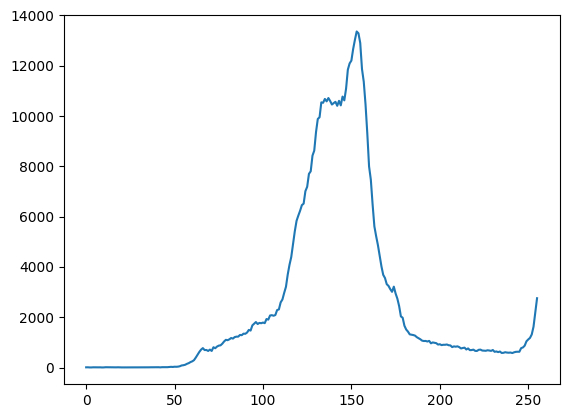

256
[0, 1, 3, 3, 2, 2, 7, 6, 10, 13, 13, 17, 16, 24, 26, 15, 24, 55, 55, 81, 100, 116, 127, 131, 175, 160, 165, 177, 222, 182, 186, 170, 233, 203, 198, 242, 233, 243, 230, 291, 290, 301, 306, 296, 321, 340, 421, 410, 433, 475, 521, 585, 646, 703, 778, 778, 910, 970, 1099, 1163, 1222, 1329, 1384, 1470, 1410, 1423, 1571, 1580, 1582, 1629, 1741, 1789, 1792, 1925, 1968, 1864, 1999, 1919, 2020, 1915, 1861, 1891, 1784, 1755, 1721, 1740, 1683, 1660, 1661, 1835, 1824, 1923, 1952, 1990, 2027, 2259, 2276, 2415, 2556, 2693, 2907, 3122, 3132, 3375, 3648, 3858, 4232, 4362, 4759, 4936, 5268, 5754, 5934, 6450, 6902, 6976, 7400, 7499, 7851, 7697, 7949, 7982, 7938, 7818, 7643, 7475, 7224, 7018, 6560, 6285, 6154, 5655, 5500, 5414, 5192, 5015, 4872, 4713, 4483, 4344, 4209, 4045, 3785, 3728, 3622, 3530, 3439, 3334, 3245, 3180, 3056, 2998, 2999, 2757, 2748, 2660, 2591, 2600, 2396, 2460, 2426, 2359, 2439, 2316, 2352, 2491, 2418, 2446, 2544, 2517, 2484, 2454, 2517, 2511, 2458, 2510, 2410, 2423, 2307, 2358, 2

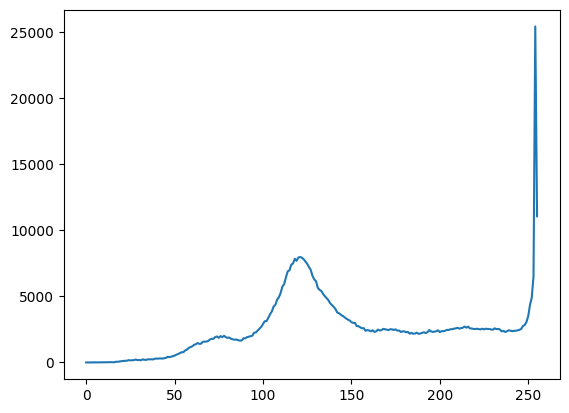

256
[0, 4, 2, 3, 3, 8, 7, 4, 4, 8, 10, 7, 5, 7, 9, 11, 18, 21, 18, 33, 39, 45, 46, 86, 90, 108, 207, 311, 483, 782, 975, 1252, 1565, 1883, 1944, 2074, 2212, 2314, 2478, 2545, 2616, 2612, 2642, 2524, 2534, 2601, 2586, 2648, 2764, 3100, 3447, 3608, 4222, 4575, 5249, 5783, 6589, 6977, 7655, 8117, 8593, 8451, 8467, 8459, 8447, 8580, 8723, 9287, 9640, 9983, 10331, 10953, 11160, 11600, 11445, 11537, 10804, 10494, 9890, 9089, 8467, 7819, 7253, 6869, 6336, 6001, 5695, 5569, 5195, 4703, 4412, 3916, 3540, 3175, 2806, 2539, 2334, 2070, 1989, 1752, 1621, 1426, 1389, 1368, 1332, 1219, 1234, 1144, 1195, 1324, 1455, 1716, 1828, 2200, 2348, 2371, 2596, 2827, 2845, 2534, 2586, 2742, 2800, 3093, 3360, 3607, 3803, 3995, 3948, 4037, 3790, 3690, 3604, 3489, 3663, 3401, 3350, 3115, 3147, 3192, 3243, 3483, 3697, 4001, 4213, 3971, 3628, 3351, 3050, 3187, 3307, 3420, 3472, 3599, 3574, 3798, 3895, 3960, 3994, 4016, 3823, 3513, 3368, 3079, 2767, 2652, 2511, 2395, 2211, 2095, 2013, 1950, 1879, 1747, 1590, 1547, 1

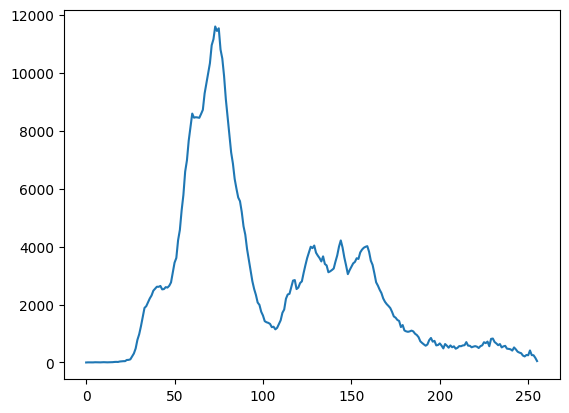

256
[0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 7, 5, 4, 13, 25, 63, 167, 502, 827, 1862, 2783, 3425, 4644, 5098, 5181, 4853, 5049, 5008, 4798, 5075, 4954, 5080, 5358, 5400, 5438, 5682, 5376, 5417, 5519, 5335, 5661, 5844, 6483, 6379, 6330, 6272, 6573, 6786, 6547, 7001, 6752, 6530, 6609, 5766, 5767, 5308, 5155, 4859, 4485, 4218, 3946, 3953, 3647, 3539, 3228, 3209, 3245, 3148, 3047, 2862, 2842, 2666, 2535, 2286, 2251, 2167, 2208, 2237, 2007, 2013, 2006, 2014, 2031, 1987, 1980, 1880, 1864, 2001, 2589, 2749, 2932, 2709, 3383, 4715, 3500, 3446, 3817, 4499, 4681, 4405, 5041, 5184, 3960, 4841, 4441, 5420, 5503, 6398, 6170, 5674, 5692, 6117, 6026, 5854, 7057, 6662, 6324, 6510, 6537, 5970, 5629, 5152, 5784, 5103, 5561, 6265, 4485, 4449, 4391, 4330, 3971, 3825, 3805, 3190, 3146, 3075, 2611, 2858, 2742, 3137, 3174, 3387, 3231, 3100, 3597, 3386, 3291, 3574, 3095, 3322, 3244, 3108, 3316, 3872, 3689, 3483, 3959, 3404, 3204, 2881, 2903, 2831, 2721, 2923, 2423, 2319, 2089, 2066, 1858, 1763, 1854, 1606, 1608, 1693,

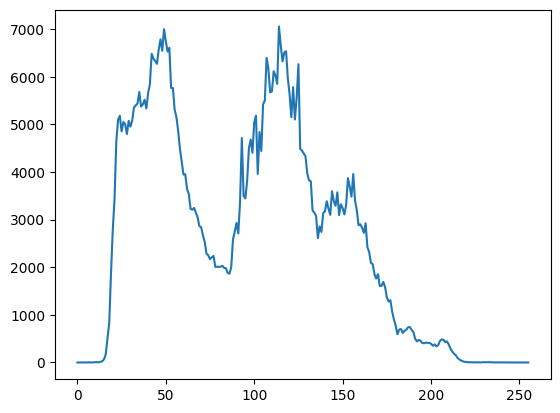

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 19, 64, 87, 282, 408, 840, 1739, 2149, 2222, 3147, 3932, 4047, 3865, 4086, 4258, 4619, 4432, 4675, 4534, 4546, 4272, 4230, 4196, 4657, 4914, 5036, 5069, 5980, 6037, 5463, 5616, 5778, 5980, 5966, 6576, 6189, 6108, 5571, 5370, 5201, 4891, 4562, 4513, 4245, 4054, 4019, 3846, 3844, 3657, 3717, 3543, 3272, 3548, 3159, 3190, 2910, 2959, 2605, 2651, 2282, 2203, 2368, 2228, 2237, 2344, 2193, 2151, 2656, 3069, 6070, 4890, 6204, 6694, 7824, 7031, 5622, 7955, 8417, 6049, 6969, 6354, 5310, 5963, 5509, 5700, 5006, 6516, 5676, 5612, 5462, 5546, 5228, 5353, 5561, 4437, 4702, 4661, 5622, 5048, 5511, 4757, 5553, 4768, 4866, 4643, 4938, 5600, 5548, 5608, 5727, 5577, 6060, 6021, 5657, 5798, 5784, 5682, 4672, 4003, 3485, 3742, 3968, 3506, 3311, 3131, 3099, 3404, 2580, 3108, 2752, 2358, 2397, 2164, 1878, 1650, 1431, 1534, 1606, 1657, 1602, 1424, 1276, 1314, 1345, 1174, 1265, 1337, 1268, 1467, 1396, 1420, 1375, 1283, 1292, 1336, 1404, 1475, 1248, 1172,

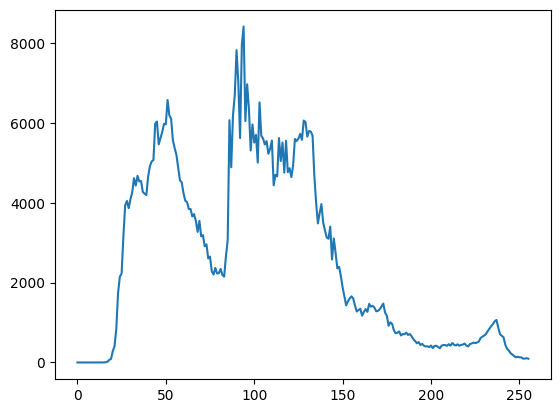

256
[2, 11, 13, 13, 17, 19, 11, 15, 18, 14, 15, 12, 12, 7, 2, 6, 5, 3, 9, 13, 30, 27, 53, 113, 202, 286, 375, 505, 777, 958, 1241, 1733, 1903, 2000, 1772, 1927, 2226, 2402, 2741, 3655, 4491, 5138, 5991, 5229, 5396, 4891, 5181, 5088, 4766, 4361, 4652, 5355, 4959, 4921, 4580, 4316, 4466, 4294, 4342, 4450, 3937, 3665, 3592, 3476, 3430, 3555, 3642, 3688, 3800, 3815, 4128, 3924, 3994, 3936, 3876, 3787, 3746, 3560, 3648, 3581, 3946, 3915, 3861, 4066, 3727, 3542, 3724, 3811, 3608, 3631, 3579, 3576, 3415, 3251, 3223, 3032, 3108, 3043, 3062, 2876, 2920, 2917, 2937, 2910, 3002, 2970, 2783, 2781, 2766, 2850, 2825, 2642, 2646, 2700, 2803, 2963, 2899, 2843, 2674, 2616, 2614, 2481, 2407, 2329, 2321, 2324, 2394, 2299, 2318, 2351, 2206, 2273, 2239, 2292, 2465, 2488, 2462, 2569, 2540, 2681, 2512, 2362, 2236, 2121, 2193, 2092, 2156, 2014, 2093, 2056, 2140, 2117, 2022, 2023, 1919, 2013, 1776, 1779, 1741, 1679, 1703, 1712, 1752, 1704, 1574, 1536, 1550, 1621, 1554, 1710, 1801, 1764, 1741, 1701, 1673, 1623,

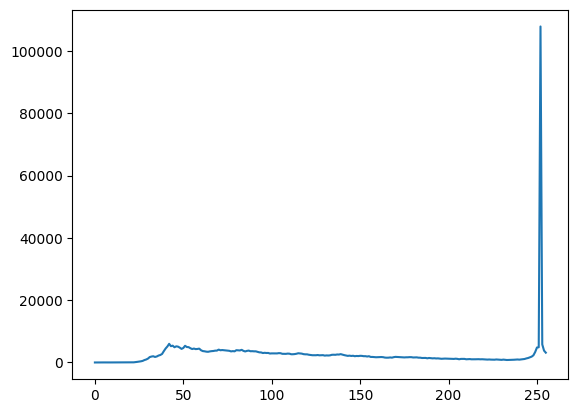

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 3, 3, 4, 6, 10, 15, 27, 39, 67, 128, 304, 359, 578, 681, 794, 1027, 1339, 1669, 1806, 1925, 2116, 2111, 2244, 2444, 2469, 2627, 2667, 2936, 3259, 3549, 4075, 4635, 5494, 6236, 7197, 8449, 9891, 10981, 12451, 13865, 14913, 15479, 15400, 15298, 14725, 13596, 12611, 11790, 10189, 9376, 8315, 7592, 7149, 6646, 6515, 6372, 6249, 6405, 6333, 5943, 5494, 5148, 4685, 4131, 3561, 3174, 3046, 2698, 2584, 2385, 2412, 2344, 2395, 2596, 2664, 2675, 2727, 2689, 2722, 2665, 2675, 2545, 2523, 2426, 2269, 2008, 1960, 1826, 1740, 1602, 1519, 1382, 1355, 1293, 1288, 1250, 1218, 1172, 1281, 1276, 1370, 1428, 1546, 1435, 1515, 1487, 1545, 1614, 1770, 1850, 1907, 2007, 2056, 2080, 2247, 2169, 1954, 2091, 2096, 2436, 2815, 3161, 3468, 3805, 3740, 3226, 3243, 3129, 3123, 3008, 2861, 2771, 2746, 2827, 3171, 3516, 3417, 3433, 2962, 2642, 2316, 2264, 2244, 2402, 2590, 2887, 3150, 3193, 2923, 2822, 2666, 2400, 2082, 2152, 2158, 2140, 2188, 2175, 2173, 2224, 2021, 

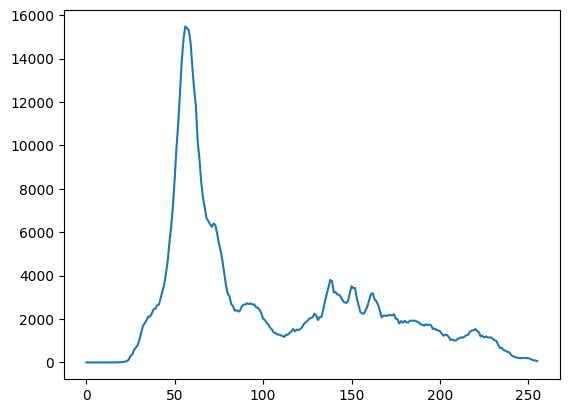

256
[1, 3, 7, 7, 5, 18, 8, 15, 17, 23, 19, 16, 28, 30, 41, 40, 47, 46, 54, 60, 52, 98, 87, 97, 111, 149, 195, 215, 306, 361, 539, 646, 848, 1180, 1507, 1834, 2244, 2809, 3112, 3581, 3634, 3602, 3887, 3991, 3965, 4016, 3960, 3952, 4138, 4264, 4688, 5000, 5457, 5909, 6657, 7135, 7832, 9711, 11931, 12956, 15754, 15387, 14393, 14092, 13395, 12375, 11984, 10243, 9413, 9398, 10530, 9682, 10194, 9375, 8466, 8266, 7781, 6063, 5663, 4945, 4608, 4472, 3793, 3454, 3285, 3127, 3116, 3285, 3292, 3134, 3256, 3173, 2907, 3088, 3114, 3175, 2979, 2773, 2701, 2735, 2674, 2730, 2907, 2732, 2807, 2839, 2726, 2621, 2725, 2611, 2490, 2357, 2366, 2299, 2336, 2283, 2426, 2686, 2606, 2920, 2911, 2862, 2682, 2586, 2384, 2155, 2168, 2009, 2008, 1837, 1795, 1807, 1690, 1613, 1586, 1585, 1485, 1425, 1497, 1495, 1427, 1413, 1379, 1301, 1260, 1323, 1262, 1260, 1321, 1309, 1302, 1291, 1257, 1211, 1110, 1117, 1096, 1070, 1015, 1089, 1017, 1034, 958, 968, 914, 895, 992, 936, 869, 861, 845, 860, 893, 865, 834, 813, 908,

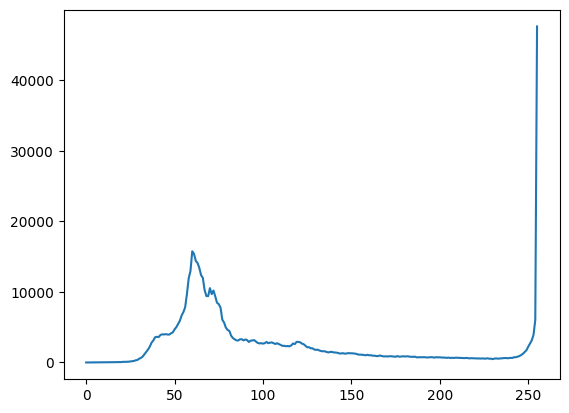

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 4, 24, 41, 58, 85, 183, 307, 423, 552, 740, 999, 1054, 1172, 1314, 1482, 1664, 1708, 1869, 2028, 2143, 2312, 2582, 2881, 2948, 3133, 3317, 3380, 3618, 3711, 3887, 4131, 4204, 4300, 4438, 4391, 4736, 4678, 4751, 4919, 4923, 4807, 4908, 4724, 4789, 4645, 4649, 4506, 4443, 4317, 4358, 4287, 4090, 3894, 3849, 3969, 4766, 6994, 7759, 7763, 9624, 12344, 9081, 13674, 10511, 9746, 10533, 9761, 10644, 9850, 12324, 11152, 10426, 9478, 10708, 10135, 9311, 9975, 9664, 7854, 7983, 7461, 7920, 7437, 6509, 6280, 5933, 6133, 6117, 6962, 6461, 7710, 6549, 5990, 6179, 5987, 5714, 5185, 5165, 4786, 5010, 4544, 4322, 4016, 4014, 3944, 3668, 3411, 3378, 3130, 2877, 2599, 2500, 2463, 2003, 1892, 1700, 1590, 1616, 1440, 1383, 1340, 1397, 1298, 1309, 1205, 1174, 1079, 1040, 994, 967, 919, 902, 868, 831, 774, 763, 725, 704, 687, 646, 631, 597, 654, 638, 641, 617, 591, 598, 586, 600, 609, 622, 586, 608, 626, 604, 622, 591, 627, 709, 680, 788, 730, 721, 636, 641,

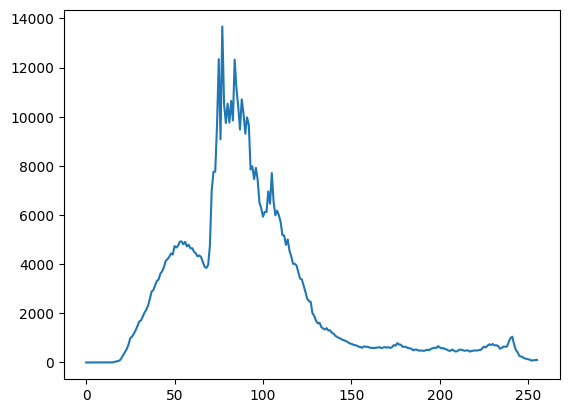

256
[54, 141, 213, 288, 383, 582, 878, 1429, 1623, 1715, 1623, 1576, 1565, 1599, 1673, 1720, 1817, 1938, 2126, 2144, 2258, 2365, 2478, 2507, 2723, 2841, 2874, 3113, 3065, 3276, 3267, 3396, 3612, 3575, 3681, 3713, 3697, 3541, 3560, 3607, 3556, 3339, 3317, 3244, 3140, 3117, 2971, 2936, 2731, 2649, 2554, 2558, 2466, 2371, 2218, 2211, 2152, 2175, 2331, 2395, 2484, 2436, 2456, 2641, 2317, 2299, 2228, 2232, 2074, 2039, 1970, 1962, 1848, 1724, 1779, 1743, 1784, 1788, 1825, 1899, 1961, 2073, 2215, 2303, 2709, 2719, 3024, 3326, 3514, 3793, 4597, 5568, 7024, 7736, 8856, 8220, 8260, 7700, 7414, 7045, 7084, 7472, 6889, 7153, 6336, 6292, 6424, 6693, 6966, 6865, 7263, 7628, 8021, 8130, 7937, 7913, 8088, 7257, 6545, 5688, 4808, 4636, 4289, 4032, 3976, 3822, 4051, 3757, 3908, 4135, 3949, 4000, 3817, 4041, 3808, 3695, 3718, 3460, 3492, 3545, 3470, 3245, 3192, 3352, 3326, 3457, 3880, 4073, 4229, 4350, 4252, 3987, 3745, 3449, 3113, 3023, 2829, 2589, 2516, 2411, 2321, 2317, 2255, 2225, 1995, 1971, 1896, 1

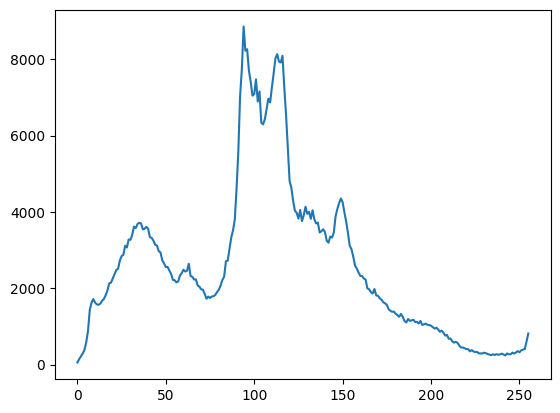

256
[0, 0, 0, 4, 4, 12, 30, 52, 105, 125, 177, 265, 327, 410, 522, 634, 706, 854, 992, 1064, 1169, 1224, 1386, 1423, 1373, 1431, 1456, 1598, 1614, 1670, 1817, 1872, 1957, 1961, 2080, 2107, 2216, 2340, 2478, 2542, 2652, 2755, 2868, 2864, 2951, 3098, 3248, 3231, 3294, 3545, 3739, 4041, 4271, 4680, 5290, 5831, 6435, 7149, 7761, 8050, 8492, 8837, 8867, 9034, 9017, 9342, 9308, 9627, 9516, 9536, 9431, 9146, 8921, 7990, 7579, 7368, 6716, 6184, 5911, 5583, 5512, 5259, 4970, 4785, 4533, 4257, 4247, 4112, 4141, 3859, 3788, 3585, 3685, 3542, 3643, 3304, 3455, 3253, 3068, 2878, 2905, 2847, 2497, 2665, 2501, 2539, 2555, 2383, 2413, 2260, 2330, 2177, 2108, 2048, 2046, 2018, 1857, 1815, 1841, 1869, 1872, 1836, 1870, 1780, 1671, 1725, 1632, 1697, 1731, 1750, 1721, 1707, 1715, 1645, 1611, 1510, 1462, 1457, 1337, 1344, 1373, 1423, 1524, 1660, 1743, 1786, 1796, 1737, 1824, 1843, 1985, 1712, 1642, 1827, 1896, 1608, 1760, 1835, 2047, 2001, 2080, 2064, 2112, 2281, 2591, 2927, 2813, 2920, 2774, 2829, 2811, 2

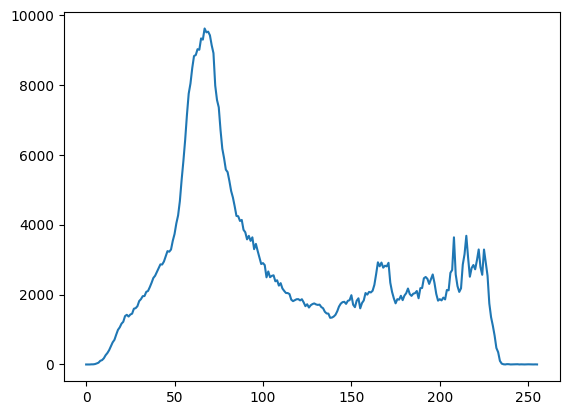

256
[4, 3, 3, 5, 7, 29, 41, 72, 93, 143, 193, 251, 366, 478, 651, 804, 974, 1032, 1116, 1187, 1294, 1287, 1385, 1365, 1403, 1474, 1557, 1680, 1741, 1748, 1740, 1700, 1723, 1620, 1596, 1617, 1586, 1520, 1459, 1465, 1519, 1411, 1383, 1445, 1462, 1446, 1430, 1430, 1417, 1563, 1531, 1677, 1687, 1764, 1812, 1893, 1984, 2183, 2307, 2431, 2785, 2955, 2946, 3251, 3518, 4033, 4334, 4525, 4778, 5027, 5110, 5164, 4881, 5048, 5158, 4950, 5009, 5184, 5413, 5902, 6119, 6416, 6656, 6537, 6542, 6528, 6450, 6328, 6579, 6361, 5961, 5513, 5244, 4861, 4667, 4510, 4396, 4576, 4691, 4491, 4402, 4328, 4402, 4332, 4465, 4573, 4374, 4193, 4081, 4073, 3935, 3686, 3874, 3730, 3539, 3507, 3392, 3197, 3324, 3059, 2983, 2853, 2891, 2784, 2625, 2591, 2509, 2398, 2311, 2172, 2225, 2091, 2083, 2032, 1949, 1844, 1853, 1837, 1753, 1763, 1603, 1762, 1541, 1643, 1576, 1496, 1483, 1426, 1437, 1353, 1403, 1329, 1347, 1397, 1360, 1309, 1337, 1296, 1285, 1338, 1283, 1296, 1313, 1217, 1287, 1299, 1247, 1196, 1221, 1246, 1243, 

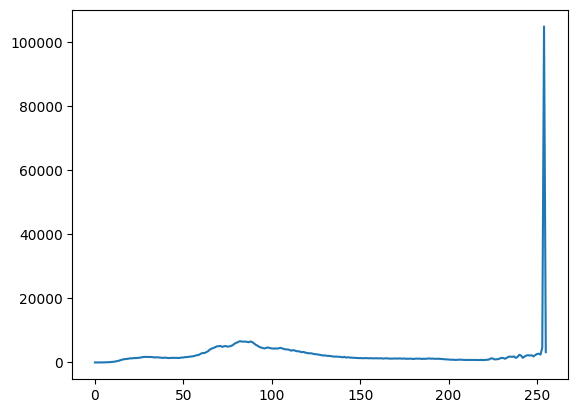

256
[0, 0, 2, 0, 0, 2, 3, 2, 5, 8, 8, 6, 19, 12, 21, 30, 37, 37, 43, 68, 64, 79, 125, 141, 173, 284, 347, 550, 818, 988, 1390, 1647, 2037, 2495, 3182, 3462, 3834, 4017, 3887, 4403, 4462, 4797, 5911, 7425, 8725, 10884, 12519, 13465, 15494, 16418, 15613, 15882, 14458, 12208, 11292, 11689, 10497, 10990, 11384, 11076, 10859, 9089, 7216, 5703, 4543, 4266, 4200, 3819, 4025, 3911, 4103, 4242, 4490, 4171, 4049, 3678, 3597, 3612, 3664, 3269, 2895, 2667, 2481, 2079, 1975, 1849, 1731, 1759, 1914, 1895, 2058, 2289, 2302, 2372, 2129, 1941, 1890, 1845, 1915, 2114, 1986, 2136, 2072, 2107, 2085, 2108, 2046, 2073, 2111, 2213, 2209, 2260, 2242, 2224, 2186, 2197, 2076, 2017, 1928, 1932, 1866, 1781, 1800, 1675, 1609, 1558, 1549, 1488, 1396, 1319, 1274, 1242, 1241, 1247, 1205, 1185, 1128, 1157, 1226, 1113, 1180, 1127, 1159, 1182, 1184, 1238, 1212, 1195, 1231, 1247, 1255, 1217, 1271, 1223, 1271, 1397, 1378, 1304, 1337, 1374, 1384, 1356, 1397, 1430, 1449, 1451, 1467, 1516, 1563, 1604, 1521, 1495, 1540, 1552,

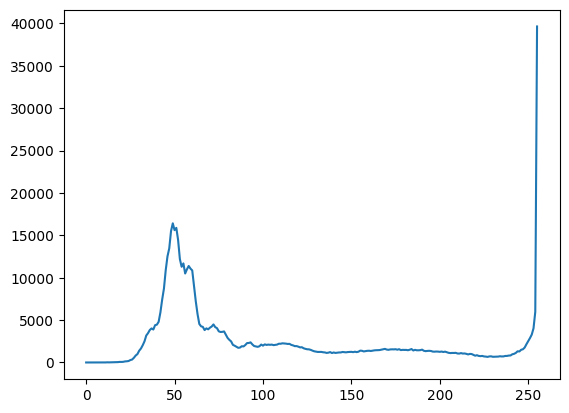

256
[0, 0, 0, 0, 0, 12, 12, 11, 17, 2, 17, 10, 5, 2, 9, 6, 5, 3, 3, 1, 8, 6, 4, 5, 5, 17, 30, 86, 441, 1173, 1034, 1102, 1301, 1891, 2415, 2965, 3436, 3804, 3982, 4119, 3768, 3970, 4565, 3830, 4035, 3430, 3638, 4189, 3991, 3754, 3538, 3260, 3344, 3078, 3456, 3358, 3233, 3176, 2934, 2852, 2673, 2736, 2687, 2675, 2835, 2828, 2894, 3028, 3090, 3315, 3395, 3474, 3614, 3789, 3878, 3886, 3872, 3836, 4061, 4217, 4471, 4427, 4754, 4665, 4929, 4798, 4663, 4644, 4581, 4556, 4442, 4448, 4369, 4344, 4219, 4296, 4238, 4185, 4240, 4338, 4233, 4219, 4204, 4150, 4166, 4083, 4302, 4233, 4371, 4421, 4661, 4443, 4663, 4501, 4472, 4194, 4126, 4060, 3724, 3713, 3549, 3381, 3263, 3175, 3319, 3226, 3079, 3026, 3072, 3244, 3002, 3005, 2820, 2879, 2665, 2504, 2446, 2425, 2339, 2270, 2107, 2122, 2005, 2121, 1934, 1959, 1831, 1815, 1715, 1768, 1683, 1775, 1737, 1762, 1818, 1787, 1740, 1623, 1676, 1699, 1686, 1650, 1744, 1575, 1556, 1601, 1584, 1510, 1515, 1598, 1631, 1515, 1515, 1554, 1576, 1580, 1552, 1514, 157

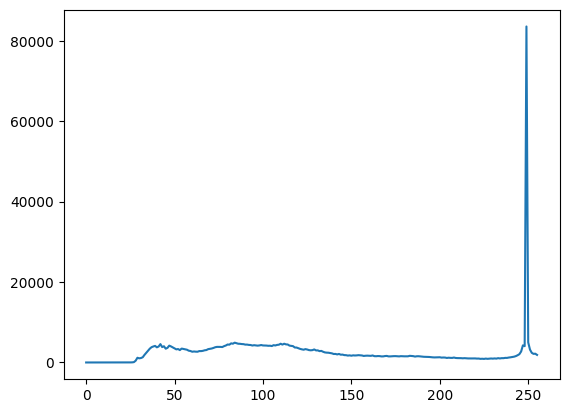

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 1, 6, 6, 28, 70, 99, 198, 209, 261, 305, 390, 489, 567, 655, 722, 794, 1066, 1421, 1739, 2008, 2173, 2421, 2767, 3052, 3334, 3445, 3599, 3730, 4323, 4481, 4527, 4852, 5140, 5565, 5250, 5068, 4686, 4407, 4267, 4386, 4154, 4282, 4080, 4297, 4277, 4253, 4205, 4221, 4096, 4140, 4033, 4128, 3951, 3839, 3782, 3738, 3720, 3778, 3531, 3556, 3325, 3426, 3288, 3157, 3050, 3050, 3068, 3021, 2924, 3069, 3180, 3312, 3944, 4883, 5953, 7285, 8990, 12767, 12380, 15522, 13950, 14499, 14471, 13204, 13189, 15916, 15080, 11724, 11433, 11066, 13447, 13719, 11490, 11544, 9380, 8163, 7646, 7046, 7134, 7968, 7977, 5690, 4929, 4698, 4249, 4051, 3854, 3985, 3797, 3515, 3319, 2610, 2358, 2412, 2299, 2174, 2064, 1903, 1768, 1742, 1736, 1557, 1543, 1534, 1462, 1391, 1299, 1361, 1377, 1293, 1236, 1282, 1223, 1175, 1115, 1045, 1026, 921, 924, 909, 857, 895, 842, 815, 795, 833, 703, 718, 654, 648, 625, 590, 579, 559, 563, 509, 554, 540, 525, 538, 530, 520, 544, 537, 489,

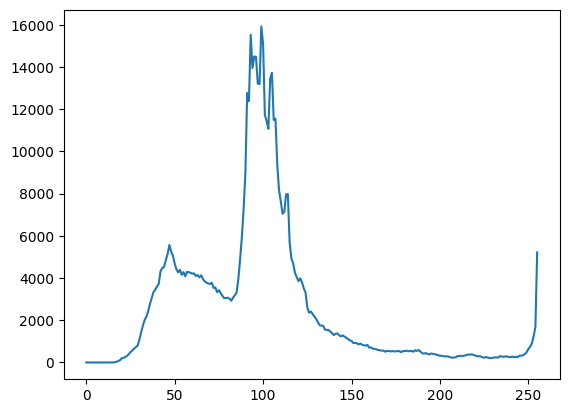

256
[0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 3, 5, 5, 7, 10, 7, 18, 20, 21, 26, 52, 72, 99, 157, 190, 316, 402, 507, 698, 905, 1214, 1441, 1821, 2238, 2517, 2752, 2962, 3457, 3694, 4535, 5471, 6079, 7480, 9558, 10750, 12934, 15049, 15835, 16755, 16390, 14059, 12702, 11970, 10909, 10927, 11630, 11809, 11906, 10521, 8686, 7725, 6751, 5470, 4770, 4246, 4011, 4320, 4200, 4246, 4116, 3715, 3589, 3731, 3849, 3528, 3735, 3434, 2989, 2757, 2462, 2164, 2048, 1886, 1707, 1829, 1934, 2308, 2311, 2557, 2125, 1997, 1851, 1885, 1808, 1845, 1822, 1930, 2041, 1943, 2001, 2072, 2119, 2067, 2129, 2168, 2133, 2332, 2251, 2186, 2174, 1996, 1927, 1935, 1915, 1786, 1805, 1764, 1741, 1776, 1649, 1732, 1678, 1497, 1482, 1472, 1458, 1406, 1342, 1306, 1202, 1331, 1232, 1227, 1206, 1245, 1232, 1245, 1260, 1248, 1316, 1356, 1287, 1334, 1449, 1383, 1484, 1389, 1400, 1480, 1422, 1458, 1479, 1505, 1479, 1620, 1638, 1614, 1688, 1717, 1907, 1876, 1916, 1977, 1924, 1902, 1908, 1841, 1792, 1706, 1814, 1813, 1808, 1803, 1762, 1736

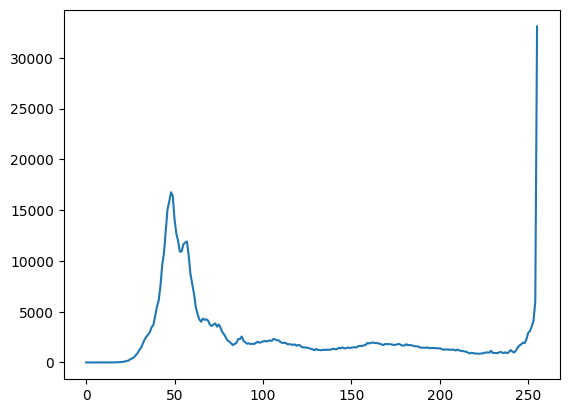

256
[3, 8, 12, 16, 26, 33, 44, 95, 126, 260, 461, 639, 941, 1382, 1893, 2563, 2753, 2493, 2762, 3043, 4025, 3813, 4365, 4671, 4626, 5613, 5965, 6428, 7204, 7865, 9019, 9101, 8671, 7048, 5590, 5038, 4334, 3950, 3271, 3146, 3030, 3109, 3320, 3345, 3249, 3374, 3418, 3558, 3603, 3806, 3855, 3844, 3628, 3635, 3654, 3518, 3437, 3424, 3259, 3518, 3463, 3262, 2859, 2733, 2620, 2581, 2397, 2400, 2242, 2235, 2246, 2366, 2451, 2608, 3117, 3238, 3121, 3170, 2975, 2826, 2598, 2714, 2546, 2573, 2621, 2492, 2281, 2210, 2465, 2261, 2049, 1877, 1685, 1573, 1517, 1380, 1252, 1133, 1116, 1035, 1015, 945, 970, 909, 952, 970, 969, 974, 941, 942, 986, 1033, 1073, 1135, 1013, 1020, 1035, 1025, 1085, 1041, 1066, 1051, 1055, 1053, 1007, 1023, 931, 1004, 1050, 1075, 1107, 1123, 1080, 1096, 1126, 1137, 1066, 1056, 1050, 1102, 1096, 1071, 1092, 1102, 1043, 1109, 1014, 1158, 1115, 1129, 1114, 1122, 1148, 1106, 1172, 1130, 1133, 1132, 1153, 1114, 1203, 1142, 1155, 1172, 1167, 1212, 1172, 1182, 1148, 1099, 1180, 113

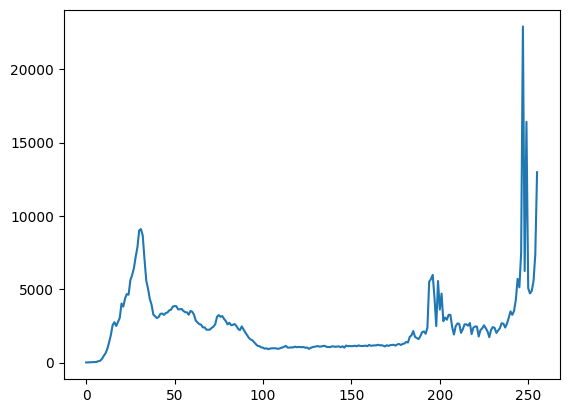

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 5, 11, 29, 85, 142, 322, 501, 683, 921, 1122, 1347, 1370, 1251, 961, 764, 457, 328, 257, 191, 195, 216, 176, 196, 220, 203, 261, 248, 260, 317, 328, 356, 342, 393, 422, 503, 527, 531, 570, 609, 681, 936, 1099, 1533, 1223, 1528, 1770, 1741, 1824, 1785, 1729, 1952, 2260, 2312, 2252, 2316, 2370, 2372, 2518, 2701, 2732, 2858, 2983, 3023, 2939, 2945, 3187, 2963, 2991, 3156, 3279, 3331, 3480, 3505, 3576, 3625, 3429, 3146, 2956, 2867, 2632, 2526, 2276, 2355, 2169, 2080, 2111, 2126, 2114, 2471, 2591, 2770, 2695, 2437, 2231, 2112, 1977, 1997, 2012, 1846, 1844, 1776, 1768, 1855, 1799, 1799, 1830, 1797, 1670, 1703, 1648, 1566, 1576, 1583, 1508, 1529, 1564, 1693, 2056, 2919, 1859, 2914, 3785, 5384, 8698, 7178, 8513, 12653, 10275, 10168, 13815, 14094, 11898, 13497, 13012, 13103, 15030, 12416, 7932, 9329, 11790, 15105, 12090, 9386, 6992, 6594, 7922, 10180, 12010, 10851, 7593, 11863, 9402, 13817, 10750, 9655, 9958, 889

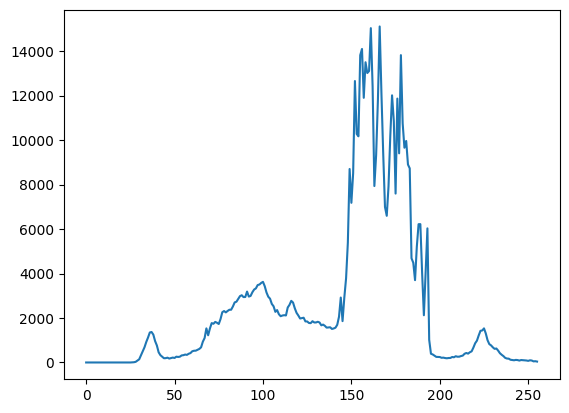

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 9, 31, 45, 137, 270, 725, 1165, 1927, 2506, 3245, 3734, 4408, 4303, 4539, 4604, 4997, 5004, 5019, 4900, 4874, 4722, 4797, 4481, 4681, 4701, 5245, 5357, 5578, 6015, 5613, 5801, 5867, 5738, 6457, 6209, 6297, 6764, 6270, 6163, 5857, 5671, 5531, 5073, 4724, 4376, 4089, 3917, 4002, 3686, 3477, 3310, 3446, 3244, 3319, 3094, 2853, 2726, 2557, 2396, 2299, 2137, 2030, 2081, 2333, 2117, 2080, 2003, 1994, 1930, 2682, 3468, 4434, 3928, 4788, 4927, 5185, 5547, 5109, 7335, 6929, 6926, 6398, 6276, 6114, 6207, 6416, 6622, 6205, 6254, 5731, 5490, 4958, 5611, 5517, 5261, 5296, 5179, 4853, 4898, 5411, 5071, 5127, 5468, 5465, 5344, 5139, 5661, 5847, 5693, 6197, 6558, 5908, 5352, 5208, 5059, 4685, 4829, 4308, 3996, 3852, 3600, 4001, 3830, 3757, 3563, 3395, 3147, 2808, 2634, 2483, 2620, 2941, 2848, 2673, 2825, 2491, 2100, 2035, 1933, 1696, 1536, 1597, 1753, 2025, 1643, 1668, 1456, 1335, 1344, 1290, 1298, 1241, 1285, 1209, 1208, 1399, 1318, 1247, 1233, 1177, 

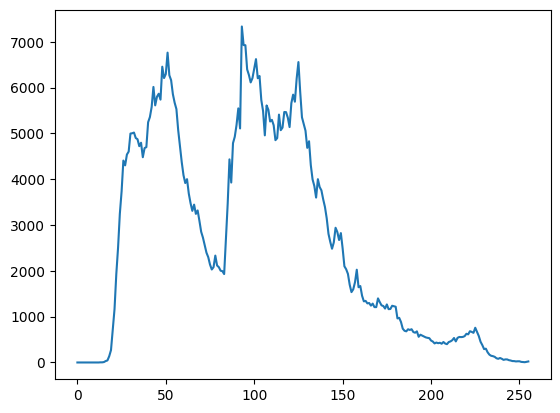

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 9, 62, 79, 148, 165, 228, 399, 577, 1000, 1635, 1997, 2370, 2669, 3113, 3326, 3585, 3810, 3967, 4160, 4345, 4575, 4856, 4588, 4800, 4913, 5291, 5624, 6101, 6324, 6467, 6404, 6139, 6000, 6053, 5758, 5348, 5242, 4993, 4894, 4714, 4679, 4523, 4334, 4321, 4168, 4019, 3903, 3837, 3640, 3423, 3421, 3340, 3182, 3223, 3116, 3065, 2873, 2877, 3582, 4313, 3685, 3760, 6549, 7095, 6456, 6024, 7898, 8802, 9031, 10746, 7128, 7093, 8063, 7177, 6316, 6519, 7098, 5232, 5875, 5338, 5106, 4632, 3905, 4705, 4111, 5203, 5174, 5711, 6577, 6044, 5565, 4743, 3659, 3896, 4460, 3981, 4424, 5683, 6384, 7015, 6614, 6142, 5758, 6081, 6201, 6114, 6363, 6540, 6432, 6596, 5480, 5997, 5290, 4514, 4524, 3975, 4246, 3570, 3441, 3880, 3728, 3641, 3199, 3007, 2986, 2760, 2313, 1948, 1826, 1684, 1693, 1476, 1367, 1016, 935, 804, 762, 661, 653, 613, 631, 567, 595, 537, 561, 512, 486, 477, 500, 450, 460, 474, 472, 473, 485, 471, 474, 485, 535, 499, 541, 547, 533, 526, 5

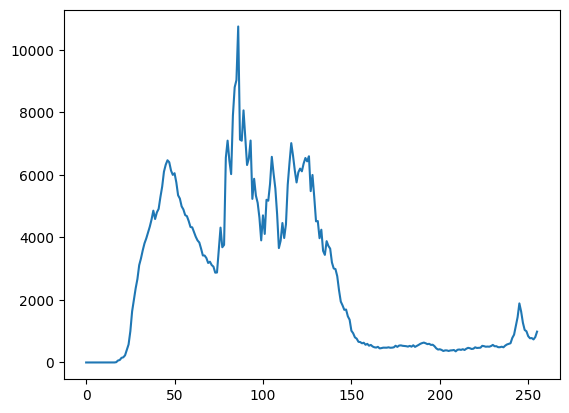

256
[4, 7, 8, 10, 11, 6, 6, 6, 12, 10, 13, 4, 11, 3, 5, 5, 4, 1, 3, 2, 0, 3, 1, 0, 0, 0, 3, 1, 1, 1, 2, 2, 1, 1, 3, 2, 2, 1, 1, 2, 2, 4, 4, 1, 1, 3, 7, 4, 10, 5, 7, 13, 9, 17, 12, 18, 18, 16, 29, 27, 33, 59, 60, 73, 98, 151, 186, 185, 243, 249, 245, 272, 298, 315, 354, 559, 602, 671, 899, 972, 1079, 1151, 1149, 1206, 1335, 1376, 1438, 1586, 2007, 2225, 2654, 3025, 3901, 4883, 6429, 7173, 8420, 8356, 9180, 9445, 9137, 9874, 9456, 9214, 9676, 8873, 8796, 9188, 7766, 8284, 7439, 7726, 8491, 7926, 8939, 7409, 7537, 6812, 6491, 6072, 6187, 5847, 5737, 5544, 6073, 5401, 5282, 5317, 5344, 5287, 5435, 5110, 5219, 5227, 4856, 4807, 4784, 4604, 4404, 4219, 4122, 4092, 4029, 3787, 3522, 3553, 3555, 3561, 4014, 3820, 3915, 3634, 3492, 3370, 3218, 2891, 3295, 2723, 2673, 2464, 2382, 2348, 2548, 2721, 2624, 2599, 2512, 2511, 2227, 2053, 2027, 2037, 1974, 1852, 1944, 1772, 1808, 1825, 1918, 1877, 1949, 2126, 2183, 2137, 2309, 2498, 2335, 2414, 2524, 2433, 2176, 2334, 2285, 2176, 2195, 2043, 2046, 188

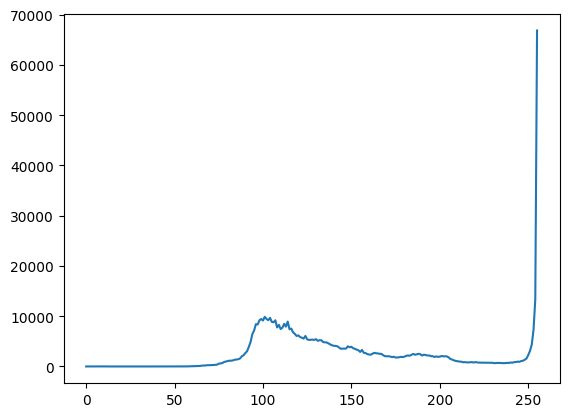

256
[0, 3, 3, 3, 8, 10, 10, 15, 5, 10, 18, 10, 19, 21, 26, 25, 26, 48, 43, 53, 74, 85, 90, 116, 140, 174, 248, 269, 443, 539, 742, 1005, 1276, 1633, 1787, 1888, 2264, 2370, 2314, 2421, 2485, 2568, 2581, 2519, 2434, 2375, 2294, 2217, 2188, 2197, 2160, 2199, 2414, 2317, 2574, 2589, 2706, 2708, 2769, 2717, 2754, 2845, 2943, 3061, 3258, 3422, 3531, 3752, 3913, 4132, 4192, 4157, 4255, 4171, 4150, 4433, 4519, 4771, 5240, 5295, 5835, 6232, 6804, 7310, 7716, 8048, 8614, 8909, 9173, 9456, 9380, 9170, 9143, 8992, 8427, 8193, 7934, 7524, 7158, 7091, 7125, 7560, 7583, 8043, 8670, 9265, 9115, 8513, 7706, 7042, 6589, 6360, 5973, 5422, 5205, 5019, 4775, 4730, 4678, 4660, 4651, 4454, 4322, 4302, 4077, 4110, 4231, 4068, 3828, 3403, 3235, 2892, 2909, 2959, 2824, 2756, 2710, 2594, 2584, 2528, 2518, 2593, 2901, 2873, 2808, 2526, 2332, 2182, 2064, 2027, 1970, 1973, 2030, 1913, 1956, 1921, 1829, 1822, 1713, 1778, 1737, 1672, 1623, 1612, 1574, 1467, 1536, 1558, 1477, 1374, 1351, 1311, 1317, 1371, 1320, 1377,

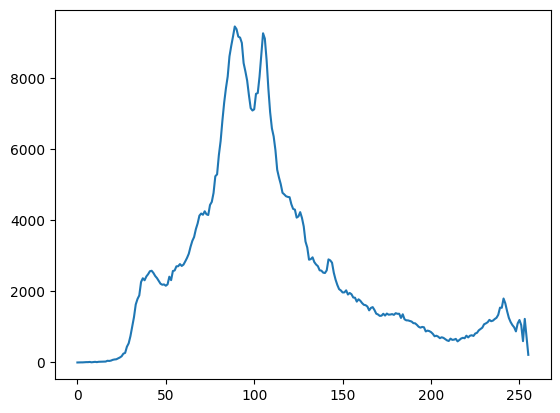

256
[2, 5, 10, 18, 25, 31, 52, 46, 95, 79, 138, 168, 265, 331, 394, 440, 564, 761, 1220, 1446, 1819, 1801, 1973, 2330, 2609, 2966, 3259, 3217, 3161, 3237, 3258, 3217, 3457, 3518, 3565, 3719, 3932, 3856, 3824, 3796, 3923, 3907, 3957, 3908, 4083, 4021, 4079, 3904, 3851, 3892, 3989, 3723, 3785, 3888, 3712, 3814, 3691, 3622, 3601, 3615, 3524, 3615, 3499, 3515, 3585, 3620, 3607, 3642, 3522, 3504, 3536, 3427, 3405, 3394, 3411, 3223, 3413, 3402, 3314, 3446, 3417, 3380, 3477, 3665, 3598, 3587, 3618, 3658, 3551, 3506, 3399, 3489, 3547, 3464, 3304, 3356, 3316, 3242, 3153, 3143, 3141, 3146, 3179, 3207, 3111, 3120, 3346, 3216, 3314, 3305, 3296, 3287, 3479, 3480, 3646, 3788, 3941, 4173, 4113, 3966, 4185, 4458, 4983, 5281, 5051, 5067, 5133, 5509, 5658, 5450, 6177, 6037, 5937, 5895, 5672, 5570, 5602, 5469, 5730, 5414, 5620, 5599, 5789, 6125, 5760, 5797, 5265, 4954, 4585, 4239, 4066, 3902, 3769, 3667, 3427, 3343, 3192, 3029, 2856, 3003, 2915, 3103, 2504, 2423, 2132, 2003, 2103, 2142, 2371, 2243, 2275,

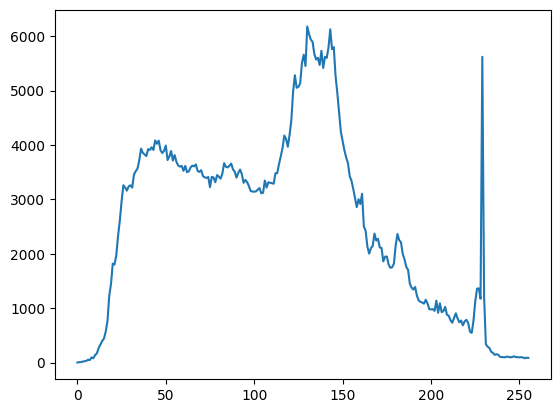

256
[0, 1, 4, 7, 24, 43, 74, 156, 209, 290, 360, 423, 538, 670, 757, 783, 917, 1086, 1263, 1348, 1483, 1509, 1560, 1522, 1665, 1826, 1887, 1990, 2037, 2158, 2311, 2418, 2451, 2617, 2920, 2972, 3105, 3200, 3311, 3052, 3142, 3349, 3532, 3763, 3817, 4045, 4249, 4778, 4946, 5380, 5753, 6122, 6628, 7410, 7516, 8052, 8465, 8769, 8615, 8729, 9417, 9493, 9346, 9052, 8723, 8692, 8517, 8366, 7921, 7293, 6959, 6738, 6458, 6332, 6107, 5731, 5442, 5326, 5026, 4810, 4646, 4620, 4207, 4206, 4218, 3966, 3997, 4087, 3844, 3891, 3777, 3549, 3405, 3198, 3011, 2981, 2922, 2885, 2674, 2551, 2584, 2394, 2320, 2119, 2044, 1902, 1888, 1782, 1643, 1588, 1559, 1518, 1544, 1485, 1475, 1371, 1492, 1547, 1497, 1467, 1435, 1446, 1433, 1334, 1320, 1305, 1260, 1149, 1138, 1179, 1080, 1060, 1049, 1021, 1041, 1025, 1098, 1099, 1133, 1152, 1097, 1117, 1114, 1073, 1098, 1190, 1020, 1082, 1065, 1106, 1012, 1068, 936, 992, 981, 1069, 1120, 1054, 1130, 1120, 1064, 1111, 1199, 1224, 1295, 1203, 1208, 1216, 1348, 1395, 1368, 

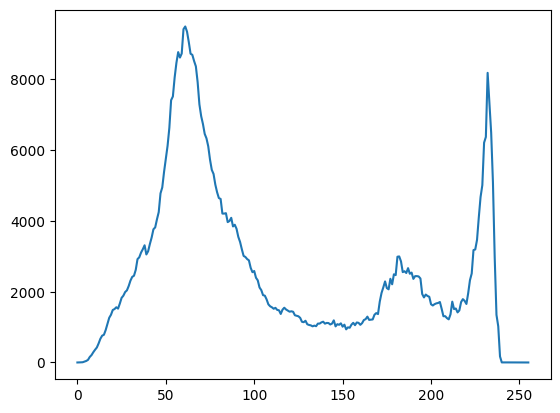

256
[1, 1, 0, 4, 7, 7, 10, 10, 16, 11, 15, 16, 15, 24, 20, 30, 38, 41, 35, 46, 41, 45, 58, 63, 78, 95, 98, 101, 117, 148, 152, 168, 175, 199, 218, 204, 239, 231, 232, 246, 252, 239, 296, 274, 262, 300, 274, 281, 330, 332, 366, 371, 388, 417, 374, 477, 445, 465, 510, 524, 494, 572, 627, 645, 730, 771, 853, 895, 961, 1034, 1027, 996, 1016, 1077, 1022, 1051, 1064, 1050, 1028, 1130, 1184, 1123, 1170, 1157, 1271, 1232, 1271, 1306, 1271, 1424, 1397, 1413, 1388, 1458, 1437, 1543, 1626, 1586, 1605, 1691, 1738, 1723, 1835, 1918, 1983, 2093, 2121, 2271, 2440, 2484, 2628, 2761, 2899, 3125, 3287, 3580, 3734, 3818, 4309, 4362, 4630, 4867, 4903, 5188, 5488, 5644, 6061, 6044, 6423, 6509, 6885, 6793, 6936, 6883, 6917, 6718, 6830, 6840, 6780, 6841, 6637, 6328, 6218, 6108, 5851, 5768, 5630, 5455, 5254, 4842, 4864, 4770, 4583, 4369, 4157, 4058, 3846, 3642, 3512, 3484, 3294, 3403, 3173, 3137, 3072, 2955, 2884, 2774, 2720, 2742, 2589, 2585, 2525, 2495, 2376, 2431, 2400, 2353, 2343, 2274, 2301, 2286, 2311, 

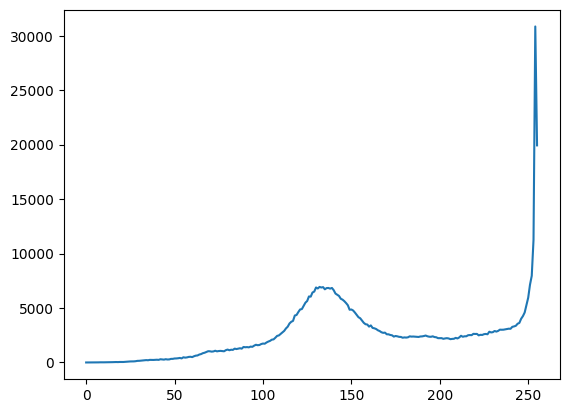

256
[0, 2, 3, 7, 1, 3, 4, 3, 2, 5, 7, 8, 4, 12, 7, 5, 11, 12, 11, 14, 17, 22, 19, 28, 32, 42, 60, 60, 76, 118, 143, 197, 381, 486, 688, 882, 1119, 1434, 1600, 1965, 2042, 2289, 2224, 2363, 2275, 2452, 2384, 2488, 2645, 2850, 3001, 2810, 2829, 2850, 2952, 2805, 3022, 2902, 2851, 2928, 2755, 2594, 2487, 2428, 2413, 2386, 2448, 2418, 2322, 2360, 2444, 2589, 2489, 2571, 2547, 2648, 2660, 2602, 2645, 2679, 2437, 2376, 2298, 2420, 2417, 2478, 2487, 2565, 2718, 2841, 3128, 3148, 3272, 3505, 3760, 3847, 4007, 4373, 4916, 5421, 5791, 6329, 6703, 7558, 8033, 8712, 8925, 8648, 8704, 8794, 9049, 9272, 9812, 9704, 10240, 10427, 10758, 11133, 11620, 11508, 11554, 11252, 11064, 10603, 10572, 9761, 9402, 9041, 8722, 8024, 7547, 7060, 6533, 6003, 5581, 5045, 4743, 4510, 4097, 3771, 3522, 3270, 3128, 3038, 2972, 2865, 2805, 2541, 2400, 2196, 2079, 1906, 1817, 1843, 1783, 1731, 1677, 1619, 1668, 1698, 1699, 1588, 1636, 1591, 1612, 1594, 1529, 1639, 1669, 1625, 1638, 1576, 1610, 1510, 1541, 1524, 1470, 14

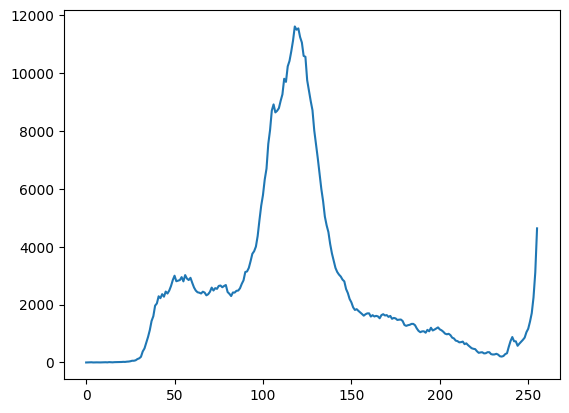

256
[0, 0, 0, 0, 2, 1, 1, 1, 4, 5, 4, 4, 6, 7, 3, 16, 9, 7, 13, 22, 20, 26, 33, 46, 50, 51, 66, 85, 104, 134, 116, 135, 170, 216, 270, 297, 378, 421, 513, 594, 599, 691, 740, 731, 726, 786, 830, 928, 1040, 1112, 1240, 1363, 1465, 1618, 1797, 1924, 2129, 2361, 2710, 3360, 3636, 3838, 3803, 4107, 4542, 4616, 4747, 4943, 4972, 5200, 5431, 5720, 6278, 7175, 8782, 10096, 10802, 10530, 8733, 8230, 7532, 7134, 7097, 6499, 6664, 6470, 6011, 6141, 6071, 5863, 5932, 5933, 6071, 5946, 6115, 6240, 6413, 6907, 7314, 7478, 7848, 7848, 7973, 8148, 8303, 8457, 8691, 9106, 9864, 10672, 11095, 11243, 9985, 9470, 9171, 8995, 8523, 8222, 7780, 7400, 6937, 6516, 6089, 5903, 5458, 5365, 5001, 4861, 4665, 4429, 4372, 4184, 4103, 3922, 3844, 3852, 3720, 3603, 3485, 3566, 3434, 3525, 3556, 3510, 3387, 3429, 3263, 3179, 2883, 2764, 2845, 2970, 2888, 2928, 3009, 3116, 3154, 2879, 2697, 2215, 1596, 1385, 1192, 1051, 940, 823, 778, 684, 702, 618, 565, 547, 548, 535, 484, 440, 429, 429, 413, 430, 359, 385, 384, 374

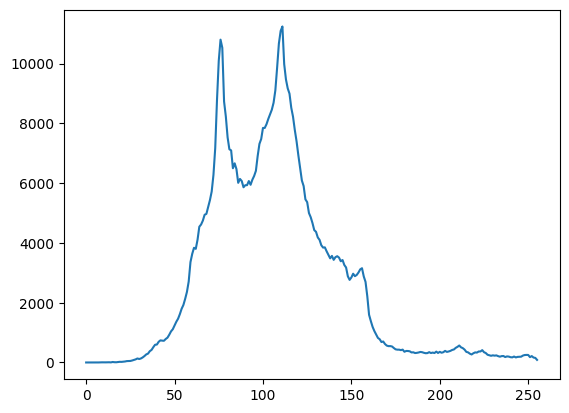

256
[0, 0, 0, 0, 0, 2, 0, 4, 4, 2, 7, 9, 13, 14, 16, 17, 20, 37, 31, 43, 40, 45, 56, 65, 83, 100, 128, 181, 200, 272, 408, 544, 794, 1084, 1555, 1769, 2530, 2837, 3200, 3690, 4009, 4026, 4295, 4239, 4148, 4383, 4837, 5060, 5815, 6541, 7460, 8534, 9823, 10907, 13799, 16863, 16522, 17130, 15148, 13731, 13134, 12143, 10247, 10607, 10874, 10423, 10826, 10324, 9319, 8538, 7091, 5664, 5808, 4526, 3896, 3358, 3126, 3187, 3439, 3460, 3581, 3619, 3965, 3724, 3705, 3515, 3426, 3241, 3242, 3094, 3194, 3029, 2963, 2662, 2444, 2294, 2151, 2086, 1868, 1952, 1963, 1818, 2186, 2322, 2555, 2763, 2372, 2363, 2040, 2004, 1992, 2009, 2125, 2152, 2152, 2128, 2132, 2178, 2113, 2157, 2070, 1950, 2028, 2051, 1963, 1970, 1985, 2000, 2058, 2040, 1937, 1859, 1772, 1636, 1613, 1540, 1452, 1378, 1341, 1317, 1127, 1202, 1070, 1072, 1047, 998, 967, 944, 934, 904, 969, 900, 893, 932, 981, 965, 975, 954, 877, 956, 974, 1012, 1005, 949, 983, 963, 967, 1098, 968, 971, 988, 991, 1032, 969, 991, 1037, 1027, 1008, 1040, 98

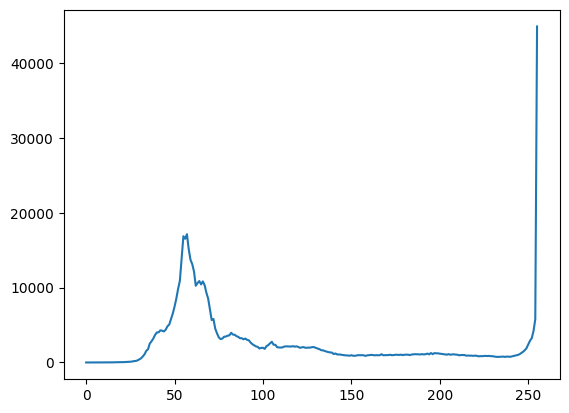

256
[24, 57, 83, 94, 125, 150, 213, 226, 248, 246, 282, 260, 332, 332, 329, 349, 346, 369, 393, 436, 460, 407, 447, 468, 463, 495, 451, 473, 474, 507, 518, 477, 539, 573, 554, 611, 649, 627, 726, 659, 739, 721, 758, 771, 849, 846, 866, 953, 935, 888, 964, 951, 925, 956, 963, 1056, 999, 1046, 1031, 1073, 1137, 1198, 1374, 1306, 1341, 1530, 1592, 1590, 1735, 1879, 1963, 2153, 2294, 2430, 2651, 2910, 3099, 3391, 3717, 4004, 4470, 4736, 5160, 5638, 6063, 6495, 6849, 7197, 7380, 7723, 7967, 8073, 7979, 8042, 8016, 7990, 7701, 7701, 7394, 7040, 6781, 6618, 6261, 5953, 5731, 5578, 5465, 5276, 5134, 5027, 4766, 4603, 4469, 4270, 4269, 4030, 3951, 3788, 3735, 3486, 3616, 3475, 3317, 3347, 3193, 3062, 3114, 3040, 2885, 2893, 2664, 2672, 2744, 2541, 2644, 2504, 2464, 2518, 2435, 2435, 2417, 2297, 2278, 2348, 2273, 2299, 2090, 2192, 2210, 2203, 2182, 2239, 2218, 2121, 2239, 2275, 2332, 2366, 2387, 2329, 2393, 2470, 2457, 2350, 2438, 2367, 2358, 2312, 2322, 2404, 2357, 2407, 2391, 2439, 2368, 2429,

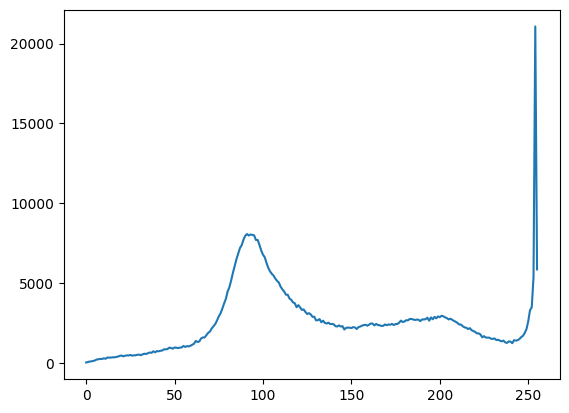

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 30, 74, 110, 128, 189, 232, 385, 611, 929, 1420, 1928, 2168, 2592, 2820, 3134, 3468, 3752, 3886, 4246, 4353, 4876, 4895, 4900, 5127, 5181, 6073, 7064, 6766, 6609, 6490, 6630, 6271, 6020, 5777, 5345, 5179, 5158, 5167, 4876, 4619, 4544, 4451, 4432, 4361, 4254, 4149, 4035, 3771, 3730, 3594, 3547, 3284, 3271, 3615, 3286, 3288, 3607, 3536, 3953, 3978, 3846, 3662, 4152, 3599, 3774, 4161, 3862, 3500, 3387, 3463, 4280, 4110, 4615, 5617, 6957, 8258, 6783, 7649, 6755, 6257, 6550, 6129, 6130, 6965, 6501, 7463, 7218, 8630, 9154, 7618, 8263, 8458, 8514, 8656, 8988, 8534, 8001, 7560, 7990, 7849, 7371, 7155, 7365, 6736, 6480, 6260, 6218, 6383, 5412, 5890, 5665, 5056, 5376, 5052, 4436, 4162, 3739, 3257, 2341, 1967, 1651, 1352, 1243, 1161, 1072, 1011, 951, 921, 869, 891, 807, 786, 708, 719, 707, 633, 638, 623, 566, 573, 547, 564, 515, 522, 518, 501, 539, 572, 570, 545, 562, 545, 528, 487, 476, 472, 469, 468, 472, 514, 507, 474, 501, 503, 517, 496, 52

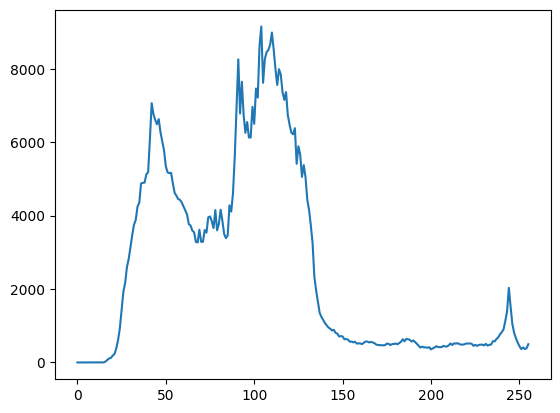

256
[0, 0, 3, 0, 1, 1, 3, 1, 5, 4, 4, 9, 6, 9, 9, 8, 18, 15, 20, 37, 56, 83, 109, 146, 137, 122, 159, 175, 272, 288, 320, 341, 353, 373, 488, 514, 524, 599, 596, 693, 835, 830, 956, 925, 1047, 1014, 1057, 1152, 1295, 1380, 1518, 1557, 1664, 1751, 1748, 1761, 1784, 1777, 1772, 1847, 1845, 1864, 1979, 2177, 2482, 2928, 3109, 3402, 3609, 3749, 3950, 4220, 4550, 5032, 5250, 5310, 5419, 6396, 6563, 6546, 6436, 5441, 4523, 3927, 3434, 3116, 3021, 2957, 2986, 2935, 2975, 3096, 3262, 3486, 3672, 3735, 3936, 3715, 3767, 3708, 3634, 3722, 3562, 3539, 3700, 3647, 3666, 3628, 3679, 3697, 3860, 3842, 3890, 3875, 3981, 3898, 3806, 4053, 4151, 4133, 4220, 4002, 3914, 3960, 3770, 3861, 3713, 3600, 3762, 3777, 3688, 3737, 3742, 3658, 3868, 3585, 3723, 3776, 3711, 3586, 3535, 3414, 3288, 3236, 3144, 2928, 2974, 2685, 2659, 2515, 2443, 2338, 2379, 2240, 2205, 2278, 2202, 2091, 2056, 2044, 1994, 1894, 1849, 1750, 1730, 1766, 1881, 1914, 1933, 1883, 1779, 1867, 1933, 1849, 1695, 1754, 1862, 1844, 1738, 181

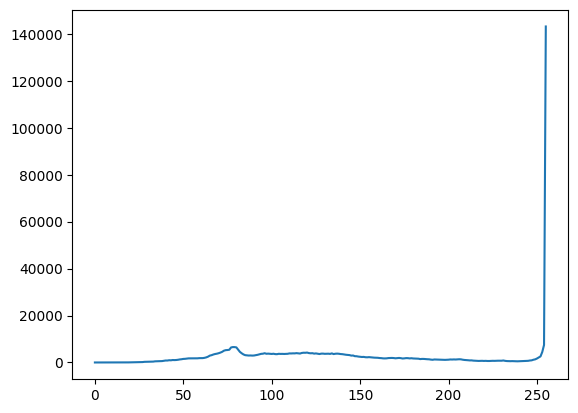

256
[2, 9, 15, 18, 24, 65, 111, 142, 187, 266, 318, 397, 486, 551, 655, 747, 817, 1027, 1045, 1106, 1132, 1024, 1205, 1310, 1228, 1318, 1350, 1493, 1534, 1697, 1633, 1802, 1799, 1938, 1892, 2085, 2108, 2227, 2178, 2182, 2392, 2477, 2582, 2574, 2745, 2798, 2908, 2905, 2986, 3211, 3286, 3461, 3636, 3930, 4286, 4668, 5146, 5822, 6488, 7245, 7786, 8597, 8560, 8786, 8868, 8703, 8748, 9052, 9558, 9510, 9303, 8824, 8329, 8050, 7815, 7587, 7111, 6802, 6455, 6221, 5824, 5624, 5349, 5230, 4969, 4856, 4587, 4188, 4122, 3918, 4073, 3835, 3619, 3566, 3479, 3328, 3175, 3292, 3155, 3333, 3101, 3031, 3173, 2761, 2607, 2637, 2424, 2336, 2319, 2237, 2066, 2128, 2035, 2090, 1840, 1851, 1757, 1879, 1874, 1829, 1706, 1671, 1579, 1617, 1611, 1568, 1428, 1372, 1323, 1365, 1294, 1299, 1304, 1265, 1340, 1357, 1468, 1334, 1405, 1453, 1484, 1407, 1503, 1538, 1530, 1484, 1524, 1568, 1447, 1627, 1599, 1562, 1488, 1532, 1366, 1370, 1296, 1304, 1335, 1469, 1487, 1423, 1464, 1562, 1714, 1665, 1735, 1828, 1747, 1744, 

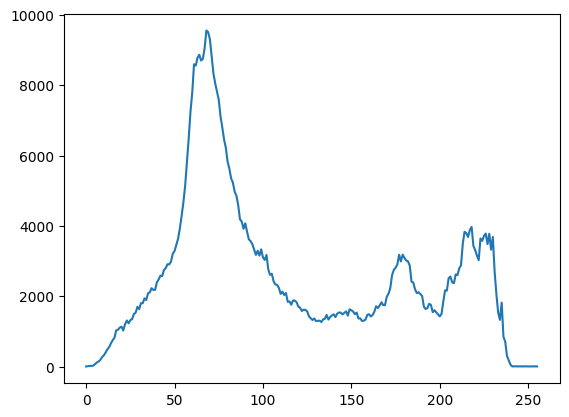

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 2, 2, 20, 21, 45, 103, 163, 238, 332, 561, 694, 887, 840, 939, 1011, 1096, 1150, 1168, 1281, 1419, 1630, 1669, 1871, 2009, 2077, 2228, 2464, 2576, 2872, 3133, 3483, 3636, 3847, 3914, 4129, 4410, 4830, 4691, 4922, 4760, 4785, 4755, 4657, 4763, 4467, 4347, 4415, 4478, 4403, 4425, 4419, 4367, 4271, 4138, 4057, 3967, 3929, 4281, 4605, 6276, 6772, 8946, 10995, 13116, 12453, 13832, 12449, 9970, 10068, 9749, 10964, 11336, 12416, 11856, 10229, 11640, 9963, 9603, 10020, 9939, 9752, 8090, 9523, 9098, 7180, 7354, 7590, 7595, 8674, 8150, 7234, 5719, 6986, 7714, 7504, 6316, 6901, 5812, 5299, 5126, 4489, 3564, 2843, 2380, 2146, 2079, 1871, 1846, 1726, 1707, 1626, 1553, 1556, 1493, 1502, 1596, 1580, 1581, 1678, 1675, 1662, 1683, 1702, 1661, 1615, 1622, 1635, 1543, 1463, 1393, 1312, 1293, 1146, 1202, 1185, 1150, 1099, 1117, 1123, 1093, 1048, 1039, 983, 968, 944, 922, 879, 841, 816, 791, 761, 693, 774, 710, 727, 716, 704, 723, 736, 837, 752, 797, 826, 800,

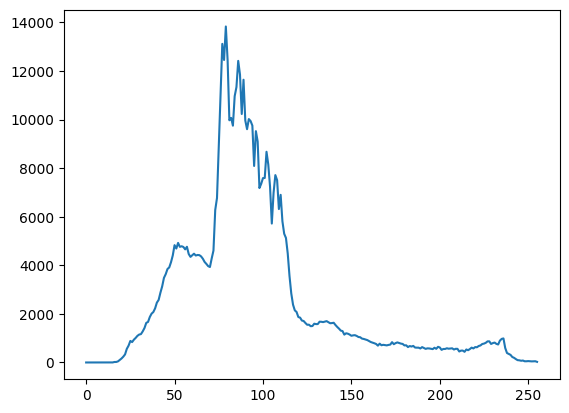

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 6, 5, 17, 22, 26, 78, 216, 359, 585, 885, 1011, 1111, 1231, 1181, 952, 697, 607, 491, 390, 355, 334, 266, 284, 300, 295, 354, 423, 426, 444, 509, 507, 559, 624, 682, 717, 840, 966, 1011, 1463, 1539, 1355, 1066, 973, 949, 851, 905, 889, 850, 786, 804, 806, 795, 867, 827, 907, 921, 973, 1089, 1193, 1370, 1583, 1924, 2099, 2343, 2534, 2581, 2424, 2372, 2057, 1840, 1741, 1599, 1590, 1775, 1986, 2083, 2439, 2892, 3105, 3409, 3260, 2942, 2852, 2714, 2505, 2379, 2299, 2507, 2684, 2962, 3038, 2960, 3162, 2983, 3037, 2813, 2648, 2179, 2085, 2114, 2412, 2944, 7628, 8188, 15340, 14708, 11401, 15905, 12808, 12810, 11036, 13935, 12138, 10511, 9239, 13487, 8492, 6611, 4992, 6286, 8830, 16410, 14403, 7904, 9803, 8584, 12184, 15802, 11935, 12384, 16158, 12403, 11181, 16258, 7888, 16193, 14237, 11297, 11282, 10251, 8874, 9296, 6872, 2680, 1756, 1227, 1102, 966, 853, 814, 786, 737, 691, 655, 611, 574, 551, 585

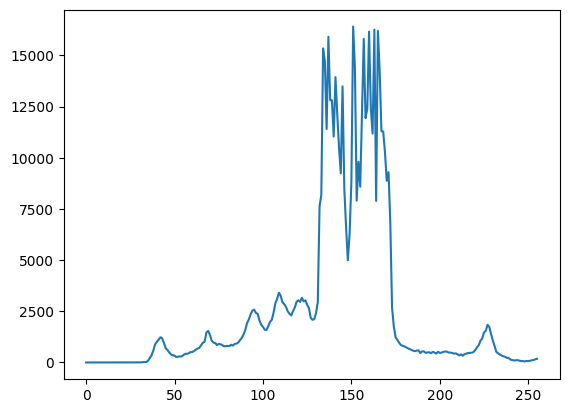

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 98, 194, 228, 778, 551, 655, 634, 865, 1158, 1487, 2277, 2015, 2225, 2309, 1712, 1868, 1961, 1920, 2425, 2645, 3268, 3784, 3693, 3788, 3875, 3471, 3263, 3564, 3859, 4096, 4416, 4582, 4822, 4678, 4683, 5029, 4842, 5150, 5280, 5027, 4901, 4476, 4674, 4654, 4208, 3982, 4141, 4154, 4095, 4229, 4565, 4687, 4638, 4631, 4558, 4468, 4724, 4771, 4706, 4446, 4156, 4054, 4194, 4273, 4692, 4905, 4716, 4432, 4101, 4017, 3967, 3930, 4086, 4069, 4241, 4078, 3897, 3902, 3548, 3447, 3277, 3281, 3281, 3143, 2859, 2668, 2852, 2701, 2896, 2613, 2760, 2812, 2768, 2797, 2853, 2862, 2656, 2657, 2591, 2552, 2454, 2569, 2631, 2741, 2955, 2807, 2716, 2771, 2590, 2530, 2310, 2480, 2336, 2305, 2218, 2168, 2074, 2204, 2230, 2146, 1941, 2034, 2003, 2046, 1970, 1858, 1958, 2009, 1928, 1888, 1855, 1937, 2001, 1824, 1860, 1772, 1717, 1689, 1683, 1700, 1668, 1653, 1613, 1595, 1589, 1426, 1369, 1435, 1332, 1321, 1311, 1312, 1332, 1321, 1407, 12

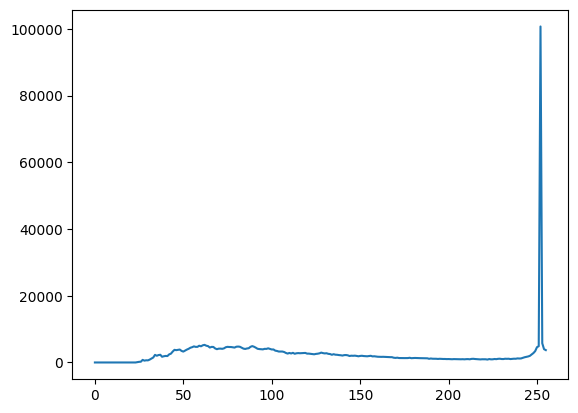

256
[0, 3, 15, 18, 38, 63, 115, 184, 276, 372, 481, 552, 739, 932, 1199, 1426, 1512, 1661, 1778, 1859, 2017, 2092, 2095, 2126, 2233, 2317, 2538, 2523, 2682, 2827, 2872, 2985, 3147, 3266, 3571, 3468, 3561, 3870, 4073, 4182, 4457, 4691, 5085, 5722, 6346, 7073, 7860, 8530, 9455, 9933, 10183, 10556, 10422, 10838, 10950, 11357, 11403, 10762, 10453, 9857, 9525, 9003, 8680, 8036, 7328, 7114, 6653, 6269, 5857, 5433, 5137, 5033, 4924, 4364, 4447, 4342, 4225, 4361, 4287, 3624, 3334, 3200, 3092, 3052, 3079, 3094, 3107, 3050, 3005, 2796, 2800, 2637, 2563, 2483, 2482, 2404, 2411, 2376, 2333, 2307, 2242, 2300, 2256, 2324, 2181, 2194, 2181, 2258, 2007, 2099, 2068, 1994, 2061, 2126, 1961, 1982, 2192, 2012, 1943, 1981, 1898, 1970, 1917, 1892, 1900, 2167, 2071, 2015, 2091, 2068, 2230, 2200, 2286, 2285, 2296, 2250, 2132, 2307, 2542, 2619, 2891, 2721, 2978, 2851, 2729, 2713, 2840, 2912, 2577, 2400, 2400, 2240, 2271, 2080, 1926, 2073, 2138, 1978, 2193, 2012, 2296, 2172, 2252, 2291, 1993, 2118, 2191, 2324, 

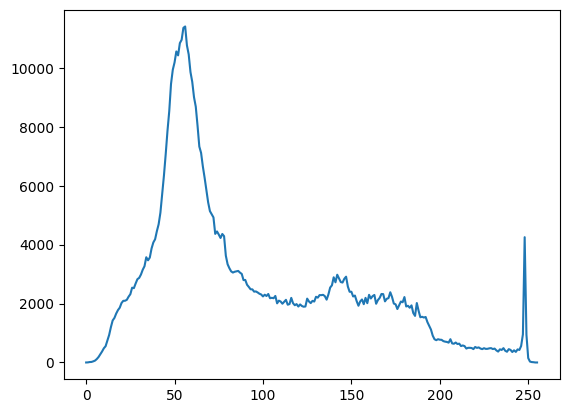

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 3, 7, 15, 24, 33, 79, 113, 165, 214, 305, 469, 749, 1026, 1274, 1564, 1845, 1918, 2111, 2451, 2666, 2904, 3117, 3390, 3896, 4036, 4813, 4632, 4745, 4844, 5118, 4984, 5319, 5111, 5021, 5027, 4753, 5026, 5001, 5044, 4941, 5137, 5202, 5201, 5166, 5395, 5324, 5199, 5085, 4942, 4978, 4861, 4528, 4530, 4209, 4187, 3883, 3749, 3584, 3485, 3451, 3469, 3515, 3795, 3959, 3812, 4113, 3999, 3837, 3701, 3788, 3361, 3236, 3345, 3428, 3786, 4268, 4662, 4873, 5239, 5964, 5948, 6513, 6785, 7400, 7838, 8129, 8543, 8829, 9122, 9252, 10110, 10786, 11404, 11598, 10910, 11278, 11371, 10213, 10229, 9103, 9705, 9592, 9957, 9360, 9306, 9260, 8186, 7665, 7433, 6183, 5253, 4432, 3949, 3743, 3815, 3146, 2952, 2242, 2019, 1477, 1412, 1255, 1132, 1009, 949, 903, 839, 831, 821, 833, 749, 785, 772, 748, 713, 727, 685, 722, 710, 682, 697, 687, 662, 666, 661, 581, 553, 553, 562, 539, 492, 514, 514, 499, 489, 456, 440, 438, 437, 467, 481, 470, 458, 447, 461, 480, 476, 467, 530, 4

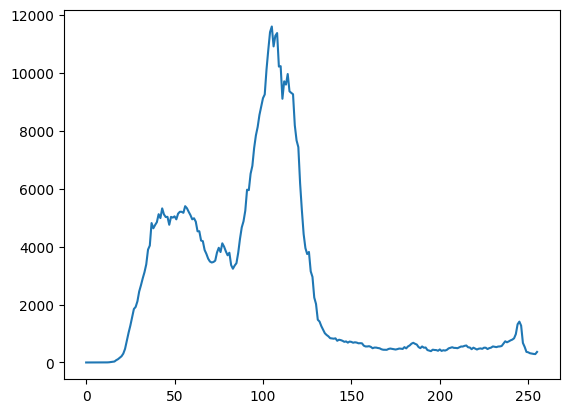

256
[7, 13, 17, 20, 63, 45, 70, 93, 136, 187, 247, 364, 449, 511, 616, 748, 887, 1138, 1400, 1932, 2602, 3156, 2979, 3056, 3496, 3718, 3687, 3477, 3533, 3747, 3787, 4178, 4268, 4208, 4200, 4203, 4227, 4350, 4355, 4384, 4489, 4599, 4499, 4378, 4330, 4213, 4219, 4086, 4079, 4100, 4070, 3998, 3955, 3842, 3719, 3795, 3758, 3690, 3657, 3701, 3667, 3676, 3525, 3622, 3625, 3582, 3616, 3558, 3486, 3505, 3479, 3461, 3400, 3289, 3280, 3277, 3196, 3331, 3145, 3123, 3234, 3353, 3282, 3332, 3375, 3361, 3239, 3278, 3090, 3149, 3126, 3087, 3081, 3128, 3127, 3233, 3137, 3192, 3302, 3110, 3122, 3130, 3023, 2907, 2987, 3055, 2969, 3012, 2976, 2962, 2972, 2880, 2852, 2788, 2929, 2902, 3210, 3398, 3438, 3758, 3975, 4259, 4178, 4127, 4339, 4283, 4689, 4755, 4982, 5343, 5444, 5472, 5421, 5349, 5509, 5468, 5760, 5231, 5053, 5046, 4555, 4802, 4880, 4749, 4493, 4320, 4240, 4199, 4333, 4212, 4225, 3976, 3992, 3926, 3904, 3837, 3660, 3178, 3357, 3055, 2926, 2840, 2575, 2365, 2300, 2374, 2174, 2282, 2234, 2041, 2

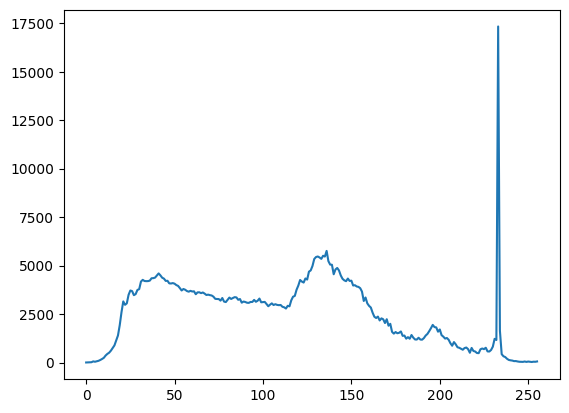

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 4, 13, 61, 84, 144, 188, 369, 609, 1099, 1787, 2131, 2455, 2715, 2996, 3418, 3361, 3527, 3626, 3904, 4162, 4262, 4156, 4350, 4807, 4530, 4606, 4826, 5097, 5830, 5816, 6550, 6553, 6561, 6601, 6233, 5981, 5813, 5507, 5253, 5079, 4835, 4531, 4239, 4236, 4191, 4035, 4064, 3906, 3814, 3656, 3451, 3421, 3360, 3306, 2964, 3032, 2936, 2852, 2705, 2821, 2988, 3061, 3158, 4220, 6226, 7252, 8281, 8431, 7918, 7109, 8126, 8226, 6394, 6766, 6341, 5085, 4633, 4840, 4724, 3839, 3647, 3632, 3915, 4320, 5018, 5797, 5792, 5556, 6419, 6578, 5999, 6441, 6594, 5834, 5387, 4906, 5047, 4815, 6018, 7049, 6462, 7030, 6273, 5351, 5664, 5752, 5500, 6211, 5732, 5264, 5455, 5195, 5298, 5182, 4895, 4521, 5233, 4931, 4223, 4599, 4672, 4155, 3665, 4054, 3867, 3003, 3171, 2870, 2215, 1839, 1739, 1750, 1505, 1623, 1455, 1297, 1293, 1292, 1248, 1089, 1278, 1114, 938, 927, 884, 770, 633, 586, 569, 493, 511, 516, 488, 437, 462, 479, 471, 471, 498, 529, 517, 526, 536, 524

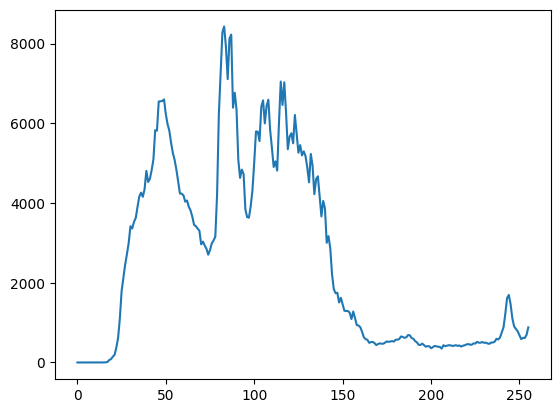

256
[1, 1, 1, 1, 1, 0, 3, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 1, 5, 1, 13, 6, 19, 27, 45, 89, 134, 245, 476, 631, 789, 834, 910, 931, 1081, 1157, 1377, 1675, 2012, 2320, 2846, 3365, 3898, 4356, 5033, 5995, 7098, 8258, 9290, 11131, 12268, 13723, 14680, 15939, 16225, 16526, 15634, 14409, 12741, 11211, 9683, 8446, 7389, 6355, 5972, 5293, 4706, 4102, 3782, 3579, 3267, 3127, 2926, 2648, 2578, 2417, 2312, 2377, 2136, 2064, 1976, 1845, 1948, 1888, 1911, 1848, 1962, 1832, 1910, 1856, 1885, 1830, 1736, 1724, 1692, 1638, 1627, 1606, 1581, 1558, 1671, 1598, 1654, 1654, 1697, 1767, 1893, 2072, 2363, 2692, 2992, 3229, 3457, 3714, 3934, 4121, 4162, 3804, 3825, 3865, 3854, 3896, 3633, 3722, 3828, 3852, 3867, 4159, 4539, 5123, 5475, 6129, 6007, 5678, 5122, 4882, 4862, 4844, 4551, 4587, 4208, 3913, 3994, 3865, 4146, 4115, 4029, 3871, 3400, 2852, 2725, 2500, 2508, 2521, 2571, 2564, 2710, 3064, 2874, 2963, 2750, 2714, 2513, 2401, 2446, 2315, 2418, 2340, 2167, 2151, 1970, 1937, 2001, 1811, 1932, 1872, 1795, 158

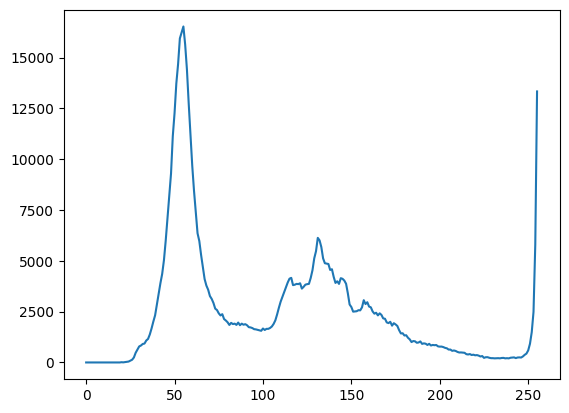

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 3, 2, 4, 5, 6, 10, 16, 19, 20, 11, 30, 41, 54, 60, 112, 145, 285, 444, 667, 977, 1318, 1653, 2120, 2414, 2536, 2907, 3539, 4250, 5193, 6691, 8151, 10881, 13914, 15166, 17734, 19394, 17205, 15320, 12746, 10541, 10971, 12514, 12616, 13454, 12246, 10191, 8301, 7394, 6435, 5542, 5250, 4636, 4613, 4722, 4468, 4246, 4061, 3945, 3935, 3850, 3866, 3425, 2983, 2576, 2275, 2180, 2015, 2178, 2640, 2450, 2608, 2258, 1895, 1801, 1814, 1782, 1795, 1842, 1802, 1884, 1777, 1954, 1960, 2051, 1988, 2200, 2197, 2277, 2328, 2380, 2242, 2202, 2095, 1927, 1924, 1917, 1900, 1899, 1805, 1766, 1711, 1747, 1684, 1672, 1561, 1555, 1475, 1510, 1452, 1467, 1347, 1366, 1308, 1305, 1271, 1327, 1298, 1315, 1365, 1335, 1417, 1366, 1387, 1446, 1404, 1466, 1458, 1455, 1495, 1572, 1599, 1611, 1648, 1676, 1748, 1605, 1809, 1878, 1810, 1864, 2061, 2181, 2196, 2175, 2096, 2149, 2147, 1983, 2049, 2086, 2008, 1984, 1955, 2043, 2082, 2011, 2042, 2086, 2027, 2092, 2029, 2025, 1975,

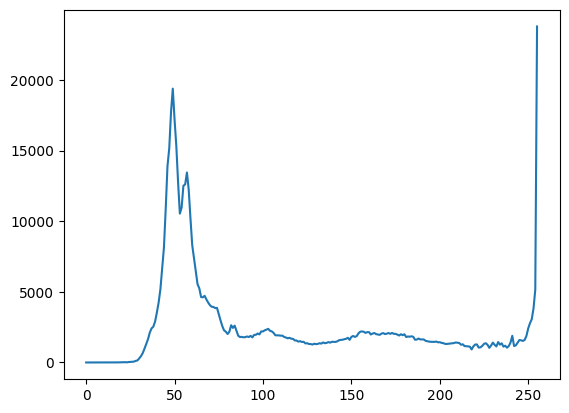

256
[0, 0, 2, 0, 0, 6, 4, 6, 8, 7, 13, 19, 23, 23, 20, 23, 30, 30, 32, 33, 47, 66, 73, 79, 135, 179, 239, 370, 518, 639, 977, 1395, 1677, 2163, 2584, 2831, 3278, 3821, 3763, 4065, 4028, 3977, 4435, 4741, 5573, 6619, 7661, 8831, 11027, 13483, 15751, 17479, 18100, 16498, 14895, 13393, 11519, 11460, 11198, 10997, 11643, 11376, 9652, 9273, 8454, 6553, 5975, 4721, 3991, 3949, 4102, 3650, 3841, 3740, 3786, 4117, 4174, 3976, 4080, 3574, 3337, 3523, 3206, 3360, 3122, 2796, 2398, 2192, 2128, 1931, 1854, 1768, 1811, 1904, 2057, 2316, 2529, 2304, 2228, 2079, 1956, 1917, 1917, 1918, 2016, 1967, 2090, 2117, 2040, 2087, 2042, 1987, 2058, 2160, 2212, 2200, 2273, 2378, 2394, 2304, 2174, 2050, 2047, 1937, 1866, 1856, 1738, 1753, 1615, 1622, 1427, 1387, 1346, 1290, 1233, 1233, 1121, 1083, 1102, 1071, 1043, 1033, 1031, 1060, 1049, 1037, 1062, 1085, 1047, 1045, 1072, 1069, 1135, 1090, 1072, 1155, 1149, 1127, 1117, 1174, 1181, 1189, 1191, 1144, 1207, 1235, 1215, 1259, 1273, 1256, 1213, 1277, 1277, 1320, 12

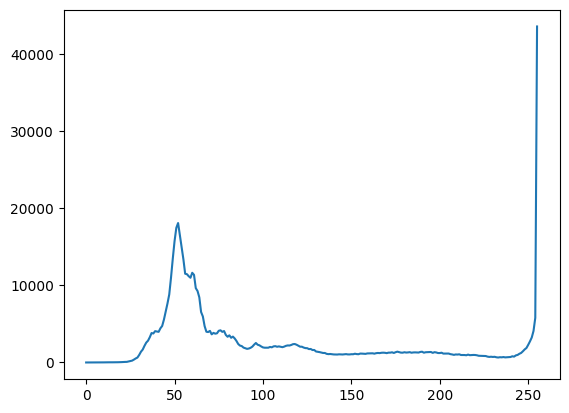

256
[0, 0, 3, 1, 4, 6, 16, 8, 21, 27, 22, 28, 44, 35, 58, 73, 56, 90, 105, 115, 112, 134, 126, 141, 169, 141, 158, 169, 159, 186, 171, 222, 222, 218, 198, 228, 232, 266, 242, 262, 273, 262, 288, 323, 323, 353, 376, 349, 412, 400, 432, 488, 498, 537, 527, 593, 653, 755, 821, 894, 907, 951, 1005, 1095, 1154, 1137, 1114, 1185, 1200, 1187, 1110, 1167, 1224, 1267, 1352, 1462, 1436, 1417, 1455, 1456, 1487, 1484, 1542, 1494, 1524, 1448, 1478, 1503, 1541, 1513, 1510, 1536, 1555, 1579, 1596, 1616, 1702, 1700, 1747, 1862, 1892, 1996, 2044, 2186, 2307, 2321, 2422, 2654, 2669, 2882, 3015, 3204, 3409, 3602, 3851, 4091, 4334, 4393, 4821, 5036, 5388, 5582, 5962, 6006, 6371, 6493, 6654, 6731, 6810, 6757, 6963, 6962, 7050, 6925, 6709, 6597, 6502, 6385, 6267, 5942, 5643, 5552, 5334, 5006, 4788, 4659, 4409, 4342, 4152, 4015, 4015, 3892, 3789, 3654, 3645, 3450, 3431, 3377, 3293, 3103, 3079, 2977, 2917, 3053, 2888, 2782, 2706, 2605, 2521, 2341, 2394, 2305, 2313, 2371, 2339, 2227, 2307, 2266, 2175, 2194, 22

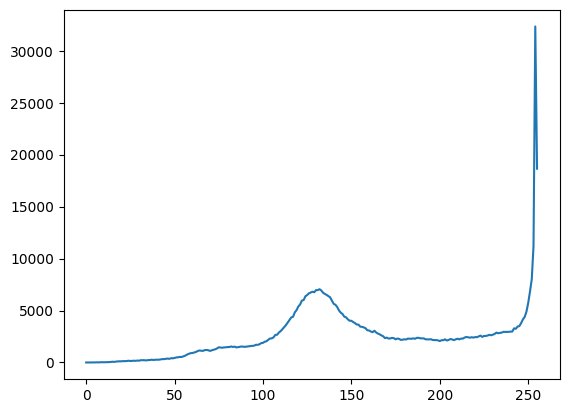

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 7, 18, 47, 99, 138, 352, 565, 641, 774, 915, 1200, 1292, 1405, 1560, 1484, 1259, 1118, 1064, 1051, 1069, 1178, 1286, 1366, 1282, 1305, 1313, 1287, 1344, 1510, 1622, 1752, 1988, 2070, 2273, 2471, 2716, 3172, 3431, 4205, 4188, 4050, 3942, 4053, 4377, 4308, 4165, 3951, 3985, 3928, 4199, 4427, 4359, 4324, 4509, 4178, 4282, 4089, 4074, 4081, 3529, 3484, 3332, 3437, 3187, 3224, 3148, 2969, 2789, 2435, 2279, 2070, 1858, 1765, 1808, 1702, 1523, 1403, 1169, 1057, 979, 856, 765, 706, 699, 635, 648, 605, 616, 666, 899, 969, 1756, 2781, 2528, 2323, 1982, 1901, 1873, 1670, 1724, 1577, 1384, 1334, 1232, 1142, 1055, 994, 841, 855, 824, 872, 982, 935, 868, 763, 1005, 753, 752, 476, 433, 402, 368, 293, 318, 278, 279, 248, 255, 241, 250, 251, 318, 379, 1034, 1488, 2239, 4401, 4741, 3461, 4753, 6969, 8324, 6104, 6830, 6969, 10621, 9290, 9259, 10511, 10299, 11362, 7771, 7129, 8459, 11260, 16865, 11494, 8744, 9150, 10060, 8257, 6770,

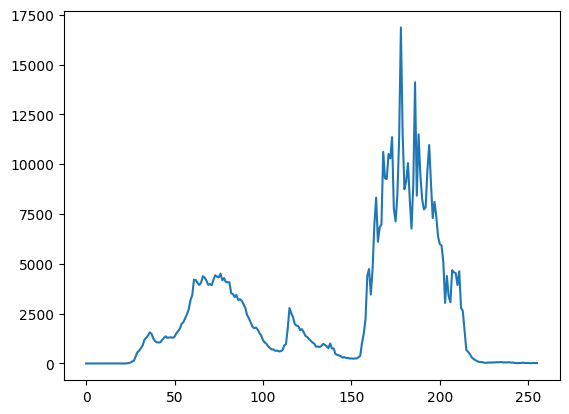

256
[0, 14, 43, 49, 103, 161, 244, 350, 423, 511, 559, 660, 800, 973, 1177, 1207, 1219, 1276, 1453, 1454, 1470, 1567, 1592, 1767, 1862, 1875, 1982, 2012, 2081, 2245, 2218, 2374, 2394, 2459, 2650, 2602, 2734, 2860, 3014, 3079, 3291, 3400, 3462, 3624, 3732, 3938, 4281, 4547, 5094, 5493, 5792, 6195, 6702, 7005, 7270, 7408, 7701, 8186, 8333, 8243, 8366, 8447, 8438, 8664, 8667, 8875, 8819, 8533, 8206, 7762, 7728, 7045, 6765, 6372, 6128, 5816, 5607, 5295, 4996, 4770, 4701, 4513, 4351, 4179, 4095, 4017, 3900, 3757, 3835, 3749, 3505, 3216, 2980, 2964, 2776, 2713, 2568, 2495, 2342, 2294, 2218, 2079, 2103, 2039, 1941, 1892, 1858, 1819, 1846, 1768, 1782, 1872, 1768, 1772, 1718, 1686, 1646, 1673, 1571, 1549, 1622, 1635, 1643, 1680, 1773, 1837, 1850, 1920, 1846, 1837, 1814, 1643, 1754, 1655, 1551, 1523, 1416, 1420, 1347, 1307, 1214, 1223, 1275, 1219, 1176, 1131, 1178, 1176, 1203, 1180, 1136, 1181, 1203, 1054, 1041, 996, 1125, 1075, 1025, 881, 1001, 935, 967, 1084, 1069, 1310, 1524, 1664, 1739, 1852

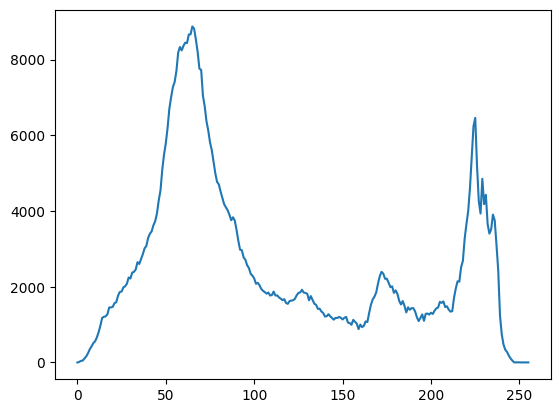

256
[1, 1, 0, 1, 1, 2, 0, 10, 9, 12, 18, 17, 24, 32, 42, 67, 81, 108, 116, 155, 174, 214, 296, 340, 391, 496, 553, 645, 706, 759, 909, 901, 948, 983, 1031, 1038, 1105, 1092, 1097, 1067, 1051, 1112, 1192, 1194, 1174, 1221, 1266, 1297, 1382, 1347, 1356, 1359, 1371, 1320, 1360, 1302, 1392, 1412, 1390, 1452, 1572, 1520, 1671, 1683, 1582, 1736, 1710, 1772, 1731, 1765, 1760, 1873, 1788, 1820, 1968, 1969, 2098, 2147, 2240, 2476, 2713, 2845, 3075, 3270, 3537, 3868, 4184, 4324, 4518, 4524, 4645, 4845, 4800, 5083, 4919, 5090, 5252, 5578, 5798, 6003, 6207, 6541, 6469, 6484, 6532, 6356, 6447, 6333, 6268, 6262, 6369, 6178, 5811, 5812, 5464, 5446, 5115, 5033, 4952, 4693, 4660, 4467, 4389, 4488, 4280, 4164, 3893, 3827, 3559, 3411, 3481, 3311, 3123, 3001, 2974, 2899, 2835, 2757, 2707, 2553, 2599, 2555, 2428, 2350, 2364, 2263, 2215, 2214, 2164, 2178, 2007, 2099, 1990, 2000, 1930, 1912, 1919, 1936, 1802, 1810, 1780, 1659, 1706, 1711, 1670, 1622, 1539, 1566, 1617, 1579, 1554, 1517, 1450, 1452, 1480, 1409

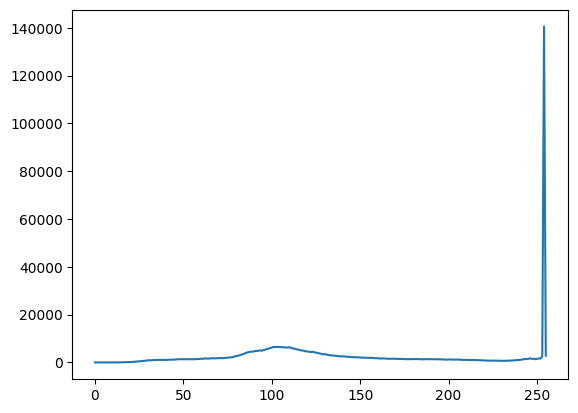

256
[4, 5, 4, 2, 3, 5, 2, 5, 10, 5, 4, 7, 3, 6, 2, 7, 6, 10, 12, 11, 19, 21, 26, 49, 57, 108, 224, 421, 615, 770, 686, 831, 962, 1044, 1110, 1379, 1552, 2040, 2567, 3041, 3603, 3809, 3889, 4243, 4626, 5330, 6160, 7313, 8073, 9532, 10560, 11226, 11989, 11830, 11295, 10992, 10132, 9292, 8405, 7706, 6644, 6031, 5293, 4524, 3928, 3710, 3202, 3166, 2855, 2878, 2807, 2720, 2575, 2678, 2513, 2563, 2476, 2464, 2438, 2326, 2354, 2274, 2220, 2195, 2231, 2114, 2070, 2114, 2028, 2143, 2137, 2186, 2233, 2298, 2377, 2371, 2659, 2678, 2860, 2929, 3069, 3169, 3454, 3821, 4388, 4858, 5256, 5749, 5858, 5712, 5714, 5876, 6008, 6363, 6021, 6278, 6233, 6210, 6058, 6172, 6459, 6822, 6817, 6564, 6448, 6377, 6402, 6655, 6607, 6681, 6362, 5971, 5577, 5835, 5489, 5409, 5318, 4821, 4680, 4490, 4339, 4101, 4127, 4317, 4123, 4057, 3869, 3332, 2984, 2902, 2850, 2811, 2889, 2750, 2715, 2581, 2563, 2609, 2559, 2433, 2267, 2122, 2007, 1812, 1612, 1562, 1398, 1406, 1174, 1100, 1099, 1013, 936, 938, 901, 827, 805, 841, 

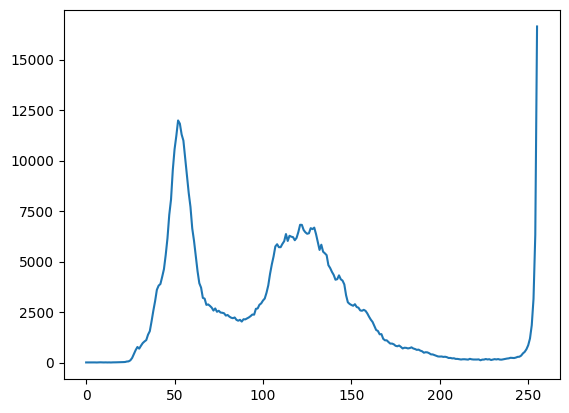

256
[0, 2, 8, 13, 35, 54, 109, 148, 218, 304, 429, 587, 721, 827, 1016, 1128, 1435, 1573, 1719, 1758, 1815, 2016, 2070, 2232, 2198, 2390, 2389, 2659, 2717, 2731, 2807, 3006, 3147, 3303, 3477, 3611, 3725, 3898, 4009, 4332, 4466, 4638, 4920, 5321, 5707, 6168, 6588, 7195, 7641, 8374, 9055, 9441, 10330, 10888, 10717, 11102, 10976, 10977, 11126, 10768, 10541, 9884, 9003, 8353, 7795, 7191, 6889, 6572, 6161, 5814, 5585, 5309, 5297, 4925, 4730, 4673, 4673, 4581, 4426, 4200, 3799, 3544, 3231, 3079, 2905, 2799, 2752, 2690, 2588, 2401, 2421, 2226, 2265, 2270, 2195, 2151, 2134, 2140, 2093, 1992, 1875, 1908, 1754, 1749, 1672, 1562, 1575, 1519, 1515, 1511, 1518, 1492, 1561, 1330, 1318, 1166, 1121, 978, 879, 883, 827, 711, 647, 592, 593, 543, 574, 551, 576, 650, 663, 587, 574, 692, 684, 695, 652, 887, 819, 915, 822, 854, 906, 936, 838, 766, 788, 872, 984, 1135, 1148, 1190, 1230, 1233, 1286, 1312, 1480, 1468, 1588, 1747, 1704, 1822, 1941, 1979, 2245, 2255, 2484, 2421, 2799, 2989, 2972, 2932, 2898, 309

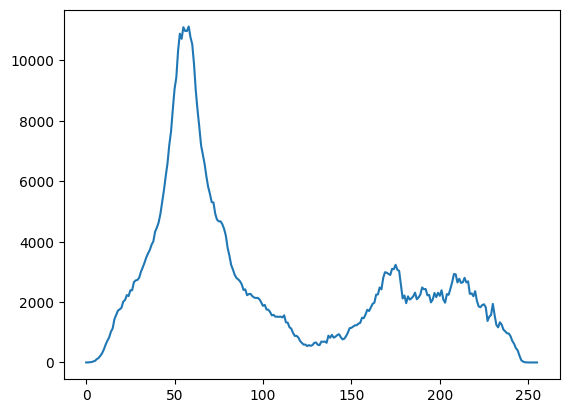

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 6, 13, 39, 95, 251, 468, 744, 939, 1172, 1302, 1323, 973, 784, 600, 427, 435, 293, 292, 268, 292, 295, 265, 325, 299, 277, 312, 327, 383, 468, 478, 516, 574, 618, 659, 684, 736, 753, 1042, 1307, 1532, 1233, 1305, 1110, 1098, 941, 904, 910, 834, 843, 888, 875, 828, 913, 920, 932, 895, 1034, 1051, 1188, 1356, 1427, 1665, 1876, 2141, 2650, 3218, 3553, 3953, 4122, 4016, 3827, 3271, 3092, 3081, 2866, 2670, 2660, 2695, 2775, 2868, 2669, 2703, 2590, 2579, 2447, 2305, 2476, 2699, 2562, 2044, 1929, 1829, 1735, 1655, 1585, 1644, 1748, 1684, 1632, 1652, 1700, 1723, 1979, 2666, 4219, 7343, 14728, 15375, 12048, 11564, 14755, 13255, 12207, 11007, 10977, 11800, 10512, 11665, 17363, 9326, 7631, 9520, 5977, 6658, 18111, 12807, 11404, 9955, 8845, 10913, 13078, 15314, 13634, 12350, 11294, 12794, 7729, 8254, 12373, 18035, 9746, 13882, 8325, 11155, 5374, 2118, 1357, 1027, 900, 749, 786, 709, 722, 650, 643, 

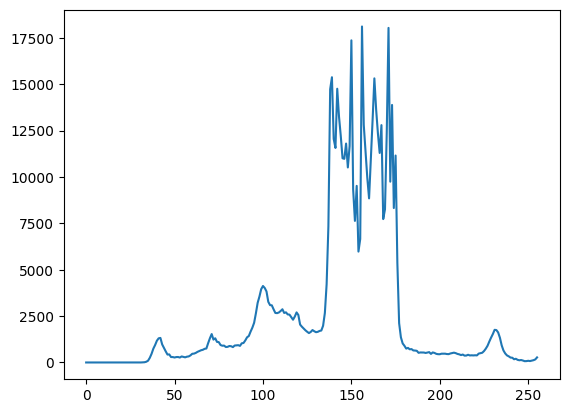

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 11, 12, 34, 71, 176, 321, 498, 765, 1005, 1321, 1354, 1191, 934, 743, 598, 486, 357, 352, 310, 271, 283, 305, 278, 290, 329, 364, 396, 435, 413, 499, 550, 537, 558, 637, 714, 787, 892, 853, 968, 1514, 1809, 1459, 1110, 1027, 827, 845, 818, 840, 768, 821, 857, 813, 833, 881, 802, 892, 1003, 1047, 1139, 1298, 1515, 1462, 1792, 2049, 2487, 2735, 2969, 3082, 3230, 3066, 3367, 3312, 3433, 3339, 2740, 2934, 2745, 2836, 2542, 2404, 2377, 2381, 2622, 2800, 2822, 2897, 2680, 2591, 2594, 2570, 2297, 2063, 2050, 1887, 1904, 1776, 1676, 1699, 1740, 1613, 1606, 1706, 1993, 2663, 6454, 7137, 9566, 12245, 17024, 14047, 9802, 12057, 10295, 12929, 10388, 11703, 18210, 13870, 8454, 8482, 9210, 5690, 7234, 12938, 12331, 12897, 11790, 10524, 7283, 10553, 12904, 10162, 14749, 14024, 11465, 13663, 10608, 10692, 15360, 13644, 12360, 12167, 11150, 7024, 6467, 5175, 1761, 1554, 1236, 971, 960, 813, 737, 8

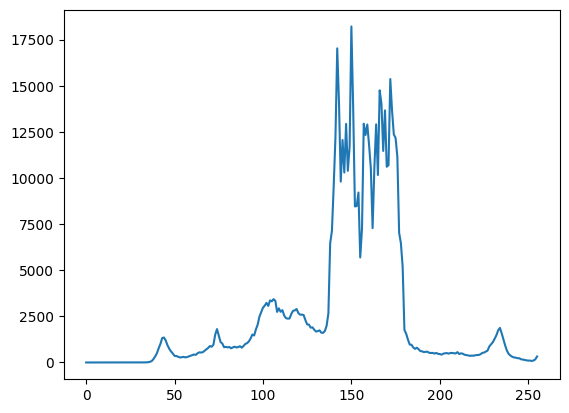

256
[2, 6, 6, 5, 8, 12, 8, 6, 11, 17, 16, 25, 31, 24, 35, 33, 37, 51, 55, 60, 74, 70, 75, 84, 117, 125, 162, 208, 267, 379, 541, 693, 786, 1084, 1445, 1757, 2085, 2523, 2662, 3074, 3385, 3556, 3913, 3815, 3762, 3947, 4078, 4059, 4327, 4332, 4494, 4889, 5104, 5229, 5859, 6504, 7069, 8081, 9638, 10675, 13645, 14204, 13910, 14342, 13835, 12976, 13110, 12294, 11121, 10027, 9782, 9225, 10228, 10637, 10007, 9687, 8327, 7155, 6980, 5705, 4951, 4854, 4382, 4029, 3717, 3804, 3512, 3482, 3430, 3239, 3121, 2858, 2827, 2992, 3050, 2955, 3166, 2951, 2768, 2850, 2797, 2786, 2899, 2957, 2875, 2967, 2922, 2800, 2651, 2717, 2558, 2562, 2511, 2447, 2424, 2421, 2484, 2613, 2508, 2747, 2808, 2887, 3030, 2882, 2610, 2360, 2197, 2058, 2043, 1927, 1866, 1739, 1745, 1707, 1674, 1649, 1561, 1639, 1487, 1508, 1355, 1384, 1318, 1346, 1258, 1283, 1324, 1250, 1214, 1168, 1190, 1157, 1174, 1149, 1201, 1257, 1280, 1228, 1122, 1125, 1131, 1081, 968, 958, 962, 913, 860, 890, 875, 860, 820, 838, 817, 828, 815, 827, 793

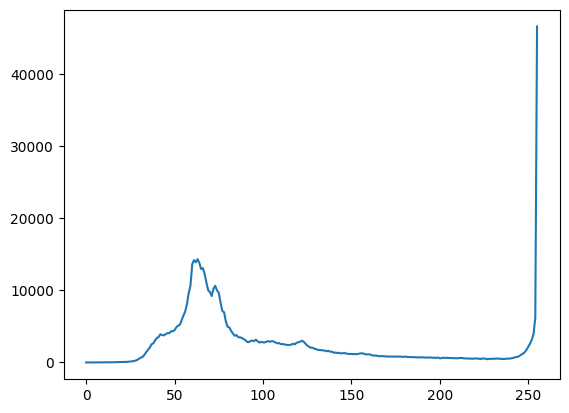

256
[0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 4, 4, 8, 6, 8, 4, 12, 19, 28, 23, 37, 48, 64, 95, 137, 209, 276, 441, 581, 799, 1045, 1356, 1471, 1883, 2334, 2739, 3103, 3503, 3702, 4023, 4295, 4623, 5228, 6300, 6976, 8832, 10488, 11750, 13912, 16117, 15706, 16842, 15678, 13336, 12539, 12019, 11267, 11505, 12322, 11233, 11331, 9223, 7472, 6515, 5299, 4672, 3825, 3663, 3708, 4072, 4211, 4222, 4331, 4097, 3672, 3618, 3500, 3443, 3706, 3555, 3250, 2957, 2543, 2209, 2146, 1871, 1669, 1734, 1753, 1747, 1974, 2271, 2389, 2253, 2108, 2042, 1965, 1888, 1904, 1876, 1986, 2024, 1971, 2082, 2014, 2060, 2073, 2019, 1980, 2050, 2090, 2104, 2178, 2131, 2128, 2109, 2052, 2052, 2046, 1869, 1838, 1803, 1725, 1701, 1678, 1666, 1585, 1479, 1473, 1441, 1360, 1303, 1303, 1258, 1173, 1224, 1175, 1154, 1191, 1170, 1150, 1117, 1137, 1138, 1160, 1183, 1148, 1207, 1193, 1177, 1230, 1281, 1243, 1351, 1305, 1346, 1313, 1339, 1319, 1378, 1390, 1406, 1500, 1457, 1505, 1544, 1655, 1536, 1715, 1565, 1587, 1499, 1554, 1635, 1616, 

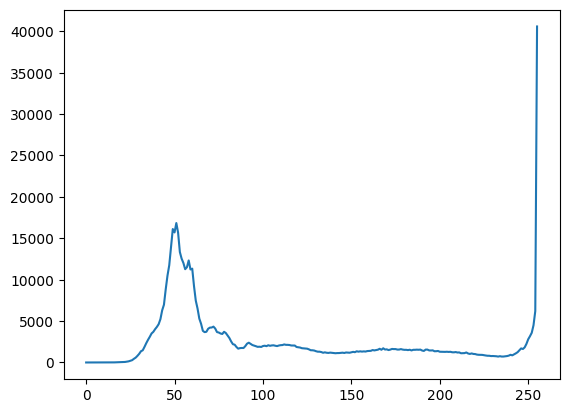

256
[0, 4, 1, 6, 12, 13, 31, 24, 41, 65, 90, 97, 151, 172, 251, 295, 366, 409, 465, 524, 523, 549, 576, 528, 507, 465, 403, 416, 373, 330, 342, 311, 326, 363, 339, 341, 385, 394, 424, 459, 472, 522, 485, 529, 568, 613, 627, 746, 731, 809, 801, 919, 966, 1045, 1008, 1065, 1261, 1325, 1419, 1407, 1456, 1564, 1587, 1732, 1794, 1977, 2134, 2308, 2440, 2446, 2715, 2638, 2820, 2932, 3017, 3002, 3186, 3277, 3382, 3455, 3506, 3613, 3673, 3769, 3883, 3964, 4101, 4177, 4142, 4280, 4319, 4440, 4397, 4534, 4758, 4776, 4970, 5058, 5129, 4919, 4975, 5211, 5102, 5266, 5254, 5122, 5130, 4955, 4974, 4830, 4853, 4791, 4833, 4804, 4585, 4492, 4429, 4154, 4248, 4111, 4036, 3979, 3843, 3870, 3739, 3731, 3729, 3551, 3563, 3517, 3515, 3438, 3485, 3479, 3541, 3382, 3404, 3525, 3454, 3529, 3620, 3567, 3694, 3798, 3779, 4057, 3938, 3853, 3777, 3540, 3530, 3299, 3241, 3079, 2949, 2696, 2518, 2284, 2131, 2047, 1924, 1825, 1793, 1634, 1615, 1574, 1511, 1478, 1593, 1462, 1406, 1368, 1398, 1298, 1361, 1242, 1194, 12

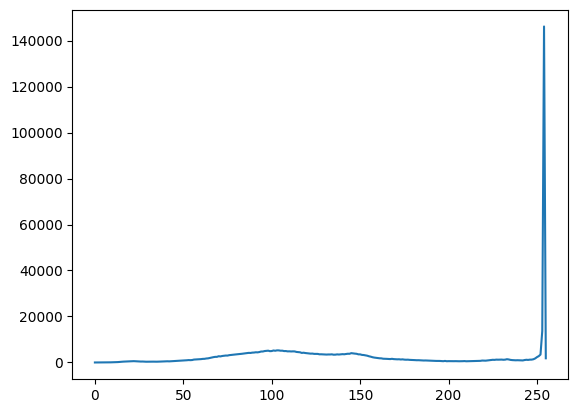

256
[0, 1, 6, 0, 7, 6, 10, 7, 12, 25, 53, 79, 111, 185, 206, 298, 378, 512, 621, 714, 1081, 1305, 1716, 1828, 1979, 1956, 2400, 2953, 3851, 4057, 4563, 4552, 4652, 4428, 4147, 4275, 4014, 4008, 3947, 4287, 4516, 4885, 5493, 5637, 5811, 5543, 5661, 5708, 5539, 5236, 5110, 4875, 4639, 4802, 4786, 4897, 5075, 5366, 5412, 5262, 5328, 5375, 5373, 5401, 5389, 5238, 5459, 5067, 5385, 5635, 5757, 5666, 5753, 5364, 4824, 4424, 4250, 4034, 3767, 3731, 3425, 3476, 3270, 3347, 3294, 3255, 3700, 3745, 3562, 3615, 3402, 3163, 3272, 3007, 2773, 2639, 2587, 2461, 2467, 2392, 2150, 2080, 2009, 1952, 2040, 1924, 2010, 1872, 1786, 1553, 1360, 1222, 1095, 1064, 991, 953, 903, 959, 957, 872, 896, 884, 953, 860, 809, 805, 808, 784, 750, 831, 799, 808, 789, 767, 765, 783, 669, 697, 733, 729, 711, 759, 796, 774, 716, 777, 814, 736, 765, 757, 754, 691, 783, 788, 737, 740, 732, 717, 701, 719, 650, 658, 643, 656, 596, 605, 603, 568, 562, 594, 565, 547, 605, 570, 579, 589, 597, 613, 602, 602, 615, 657, 646, 615, 

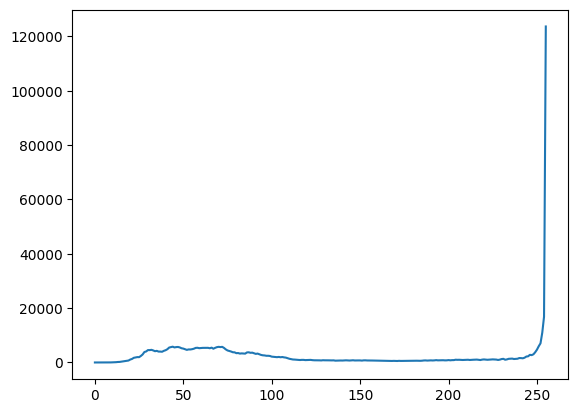

256
[13, 13, 20, 26, 23, 30, 31, 69, 57, 74, 70, 89, 98, 108, 154, 170, 296, 449, 753, 842, 1139, 1236, 1242, 1271, 1388, 1619, 1809, 1702, 1641, 1721, 1792, 1860, 1930, 2024, 2150, 2298, 2375, 2447, 2384, 2331, 2359, 2368, 2415, 2382, 2537, 2442, 2488, 2551, 2578, 2539, 2531, 2588, 2580, 2517, 2554, 2551, 2589, 2726, 2835, 2658, 2755, 2859, 2826, 2808, 2959, 2960, 3032, 3113, 3104, 3148, 3245, 3158, 3164, 3278, 3315, 3271, 3317, 3177, 3326, 3505, 3268, 3386, 3277, 3479, 3395, 3467, 3570, 3704, 3835, 3891, 4104, 4080, 4275, 4269, 4401, 4547, 4452, 4649, 4890, 5017, 5133, 5289, 5294, 5488, 5638, 5804, 5769, 5761, 5976, 6010, 5891, 6093, 5906, 6176, 5914, 6032, 6153, 6456, 6557, 6435, 6544, 6628, 6511, 6779, 6783, 7034, 6864, 7286, 7351, 7420, 7804, 7726, 7693, 7763, 7594, 7774, 7433, 7195, 6853, 6592, 6087, 6070, 6112, 5828, 5416, 4941, 4366, 3928, 3818, 3562, 3159, 2986, 2790, 2821, 2783, 2720, 2671, 2609, 2474, 2398, 2454, 2371, 2380, 2233, 2162, 2142, 1993, 2037, 2054, 1897, 1715, 16

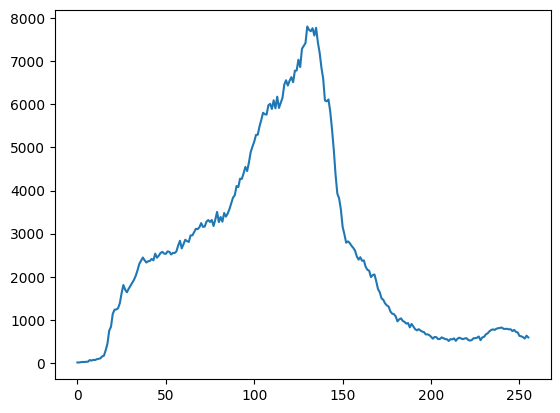

256
[1, 2, 4, 11, 14, 36, 50, 67, 86, 128, 187, 280, 346, 408, 531, 564, 658, 746, 913, 1037, 1011, 1067, 1149, 1173, 1187, 1261, 1306, 1356, 1446, 1524, 1566, 1639, 1855, 1704, 1831, 1900, 1955, 2014, 2194, 2249, 2227, 2398, 2435, 2558, 2798, 2866, 2881, 2998, 3117, 3266, 3301, 3551, 3741, 4086, 4428, 4818, 5073, 5539, 5539, 5897, 6050, 6450, 7086, 7167, 7646, 8094, 8163, 8241, 8294, 8388, 8623, 8617, 9015, 8773, 8891, 8501, 8202, 7733, 7350, 6865, 6761, 6243, 5939, 5587, 5488, 5150, 4913, 4698, 4673, 4441, 4349, 4026, 3980, 4029, 3734, 3695, 3396, 3364, 3337, 3319, 3098, 2919, 2855, 2693, 2601, 2482, 2449, 2486, 2397, 2252, 2262, 2189, 2063, 2026, 1959, 1962, 1974, 1843, 1844, 1914, 1964, 1982, 1957, 1905, 1903, 1748, 1726, 1700, 1633, 1606, 1645, 1748, 1704, 1729, 1832, 1877, 1862, 1928, 2129, 2224, 2230, 2086, 2250, 2274, 2385, 1990, 1867, 1921, 1861, 2125, 2009, 2260, 2501, 2661, 2666, 2928, 2756, 3146, 3002, 2605, 2361, 2289, 2293, 2408, 2330, 2418, 2559, 2799, 2631, 2445, 2451, 

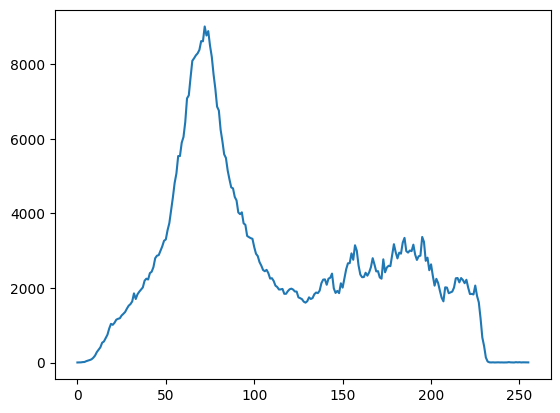

256
[0, 0, 1, 5, 4, 4, 9, 7, 4, 10, 5, 7, 16, 11, 14, 14, 16, 19, 22, 30, 37, 59, 64, 75, 90, 111, 122, 146, 178, 231, 263, 308, 438, 556, 741, 900, 1082, 1181, 1396, 1519, 1636, 1687, 1817, 1921, 1926, 2035, 1993, 2077, 2174, 2183, 2183, 2371, 2358, 2488, 2434, 2524, 2386, 2468, 2598, 2643, 2538, 2606, 2748, 2758, 3043, 3148, 3243, 3347, 3550, 3689, 3675, 3696, 3441, 3332, 3231, 3102, 2933, 2833, 2793, 2681, 2677, 2564, 2393, 2303, 2299, 2184, 2096, 2199, 2255, 2194, 2296, 2414, 2585, 2972, 3584, 4344, 5175, 6340, 6722, 6927, 7025, 7131, 7209, 7307, 7626, 7825, 7930, 8125, 8623, 8644, 8799, 9403, 9949, 10850, 11949, 12405, 13213, 13466, 13578, 13361, 12999, 12365, 11379, 10902, 9995, 9251, 8647, 7833, 7142, 6573, 6119, 5501, 5027, 4518, 4163, 3859, 3683, 3498, 3419, 3262, 3101, 2960, 2709, 2594, 2431, 2373, 2319, 2317, 2182, 2148, 2085, 2014, 1898, 1811, 1740, 1684, 1612, 1594, 1577, 1559, 1603, 1606, 1564, 1521, 1473, 1507, 1462, 1412, 1457, 1417, 1458, 1479, 1507, 1573, 1631, 1604, 

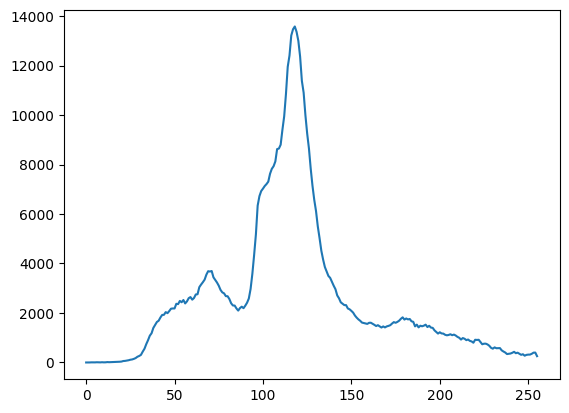

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 7, 4, 12, 42, 123, 365, 727, 1537, 2010, 2557, 3847, 4505, 4531, 4525, 4437, 4994, 5131, 5410, 5259, 5094, 5176, 4968, 4734, 4780, 4634, 4840, 5204, 5662, 5848, 6193, 6659, 6073, 6177, 6279, 6435, 6884, 7076, 6463, 6614, 6049, 5604, 5692, 5449, 5287, 4689, 4772, 4095, 4066, 3887, 3547, 3342, 3260, 3199, 3156, 3062, 2992, 2863, 2873, 2826, 2636, 2526, 2324, 2355, 2276, 2099, 2108, 2001, 1989, 1811, 1907, 1918, 1781, 2024, 2615, 2853, 3541, 4260, 4270, 4167, 4279, 6401, 4732, 4228, 4537, 5563, 5144, 6020, 7209, 7156, 5919, 5926, 5676, 6339, 6001, 6942, 6025, 4783, 4696, 5330, 4552, 5179, 5259, 5887, 5196, 5496, 5518, 5497, 6230, 6076, 6965, 6781, 6123, 6165, 5117, 5234, 4936, 5123, 4405, 4064, 3934, 3184, 2870, 2179, 1991, 1763, 2056, 2391, 2435, 2478, 2869, 3210, 3463, 3736, 4564, 3573, 3433, 2888, 2994, 3145, 3566, 3028, 3335, 2918, 2619, 2531, 2856, 2403, 2304, 2036, 1933, 1948, 1746, 1813, 1603, 1805, 1792, 1485, 1594, 1572, 1625, 1564, 173

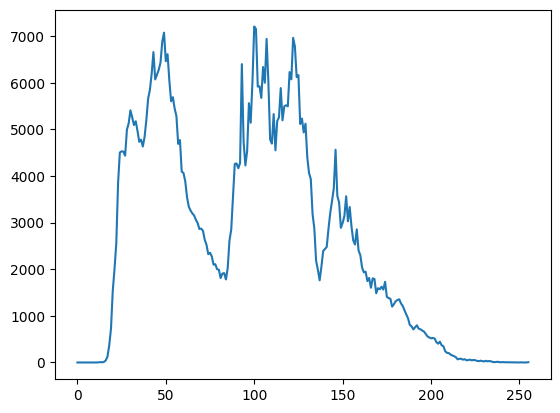

256
[0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 15, 30, 60, 60, 50, 62, 101, 250, 366, 552, 556, 615, 712, 671, 811, 973, 1143, 1192, 1747, 2063, 2551, 1961, 2047, 2145, 2045, 2010, 2069, 2083, 2170, 2208, 2438, 2666, 2832, 3093, 3477, 3713, 3960, 4068, 4491, 4687, 4994, 5048, 5221, 4770, 4847, 4848, 4825, 4643, 4800, 4749, 4706, 4617, 4634, 4803, 4501, 4529, 4640, 4380, 4401, 4706, 5463, 6297, 6501, 6730, 6796, 9768, 9693, 9467, 11008, 10285, 10479, 10641, 11759, 9402, 8985, 8766, 9830, 9191, 9466, 9947, 13125, 8717, 7800, 6131, 5207, 5602, 6939, 8704, 8210, 8148, 8828, 7491, 6306, 6396, 5686, 5637, 6210, 6968, 8055, 8817, 7111, 7641, 6677, 5322, 6211, 5942, 4801, 5002, 4706, 3527, 2664, 1970, 1636, 1510, 1344, 1409, 1417, 1436, 1364, 1293, 1377, 1352, 1286, 1304, 1377, 1292, 1244, 1250, 1193, 1186, 1242, 1211, 1272, 1413, 1256, 1316, 1303, 1409, 1464, 1450, 1400, 1384, 1322, 1247, 1170, 1150, 1170, 1055, 1031, 1053, 1071, 1069, 1067, 1020, 1107, 1104, 1063, 1066, 1031, 1076, 1023, 1060, 1049, 100

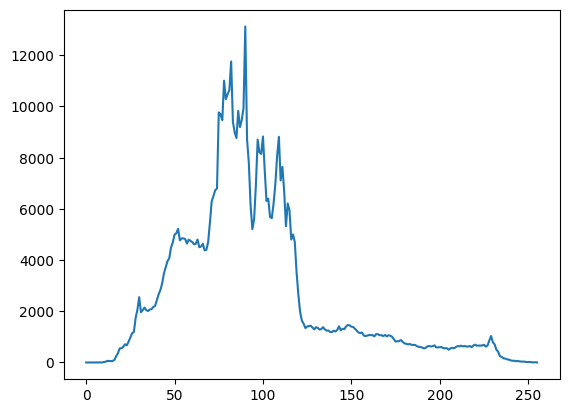

256
[1, 4, 12, 12, 22, 44, 68, 118, 171, 220, 339, 421, 565, 698, 793, 996, 1107, 1318, 1379, 1507, 1529, 1652, 1774, 1876, 1987, 1923, 1994, 2091, 2141, 2174, 2308, 2428, 2504, 2650, 2791, 2918, 2988, 3111, 3129, 3272, 3432, 3599, 3786, 4002, 4227, 4539, 4900, 5189, 5754, 6174, 6722, 7499, 7943, 8389, 8897, 9269, 9204, 9025, 9295, 9178, 9404, 9670, 9546, 9842, 9899, 9638, 9050, 8314, 7725, 7478, 7052, 6553, 6241, 5654, 5606, 5381, 5080, 4804, 4409, 4520, 4331, 4293, 3959, 4076, 3867, 3836, 3952, 3795, 3268, 3140, 2882, 2915, 2759, 2616, 2510, 2384, 2276, 2363, 2164, 2163, 2081, 1913, 1934, 1937, 1943, 1833, 1812, 1720, 1674, 1616, 1653, 1645, 1607, 1571, 1469, 1399, 1325, 1317, 1267, 1288, 1240, 1273, 1239, 1202, 1209, 1150, 1105, 985, 935, 925, 911, 846, 732, 771, 668, 621, 649, 587, 562, 618, 638, 798, 833, 932, 905, 977, 942, 879, 919, 930, 895, 815, 823, 719, 708, 768, 795, 867, 903, 966, 962, 904, 949, 939, 969, 1130, 1128, 988, 1329, 1345, 1390, 1411, 1535, 1560, 1795, 1985, 214

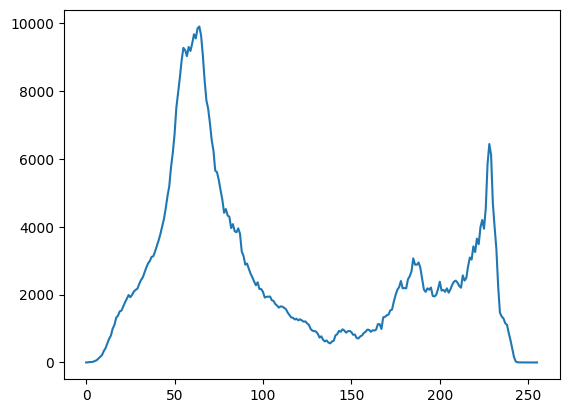

256
[0, 0, 5, 14, 28, 57, 80, 105, 125, 173, 223, 365, 432, 511, 670, 753, 836, 907, 989, 1132, 1192, 1255, 1178, 1173, 1136, 1238, 1266, 1246, 1275, 1396, 1428, 1471, 1455, 1541, 1488, 1468, 1477, 1554, 1472, 1426, 1362, 1346, 1248, 1225, 1154, 1258, 1177, 1158, 1230, 1170, 1208, 1279, 1253, 1313, 1369, 1346, 1516, 1491, 1617, 1767, 1906, 2023, 2111, 2194, 2197, 2286, 2371, 2496, 2704, 2751, 3083, 3303, 3455, 3521, 3922, 4044, 4405, 4561, 4578, 4555, 4668, 4690, 4575, 4835, 5049, 5324, 5340, 5350, 5654, 6146, 6180, 5962, 5958, 6140, 5789, 5697, 5736, 5695, 5431, 5197, 5341, 5207, 5109, 5095, 5199, 5081, 5006, 4850, 4869, 4833, 4639, 4618, 4649, 4489, 4327, 4299, 4301, 4255, 4266, 4052, 3928, 3652, 3505, 3457, 3327, 3260, 3348, 3231, 3248, 3091, 3147, 3056, 2916, 2857, 2880, 2869, 2785, 2872, 2820, 2682, 2790, 2889, 2976, 3007, 3043, 2953, 2846, 2849, 2643, 2656, 2796, 2774, 2939, 2873, 2955, 3007, 2772, 2607, 2659, 2476, 2526, 2516, 2500, 2501, 2414, 2246, 2287, 2086, 2105, 1986, 1976

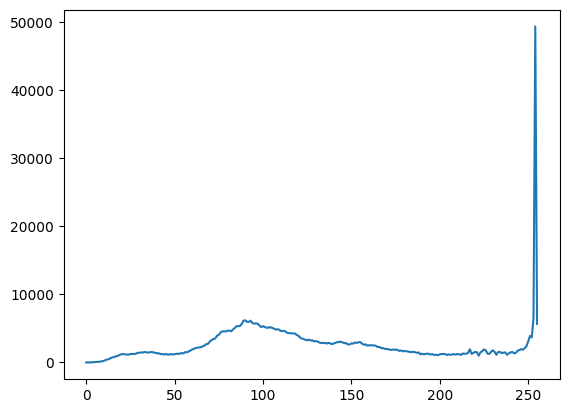

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 10, 39, 87, 175, 301, 602, 880, 1139, 1163, 1322, 1287, 1126, 726, 425, 408, 328, 256, 254, 200, 170, 163, 199, 183, 222, 237, 232, 260, 315, 315, 369, 372, 368, 444, 493, 483, 572, 605, 660, 713, 783, 1124, 1575, 1243, 1262, 1189, 1036, 1040, 997, 1122, 1267, 1493, 1365, 1452, 1533, 1789, 1825, 2062, 2045, 2297, 2619, 2956, 3143, 3306, 3170, 3152, 2963, 3034, 3106, 3163, 3447, 3821, 3933, 3746, 3440, 3297, 3108, 2930, 2965, 2814, 2789, 2919, 2854, 2762, 2664, 2491, 2434, 2172, 2129, 1980, 1956, 1839, 1839, 1780, 1743, 1829, 1927, 1894, 1897, 1837, 1864, 1856, 1784, 1800, 1741, 1810, 2090, 2536, 3932, 8389, 11836, 9557, 14073, 9250, 8585, 12202, 11493, 11340, 15703, 13708, 15937, 17487, 11827, 13245, 14932, 9222, 8796, 10661, 7743, 8469, 8734, 14631, 8801, 8108, 9845, 8929, 9440, 11394, 11333, 12351, 10965, 12434, 14490, 11859, 12123, 9356, 6552, 5395, 4769, 8591, 5217, 1029, 812, 625, 494

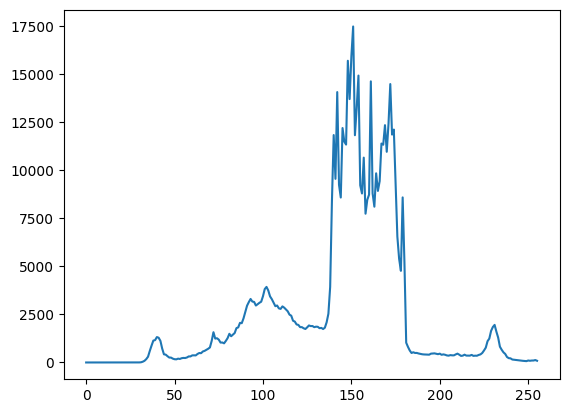

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 6, 30, 88, 113, 130, 144, 217, 332, 570, 860, 1244, 1450, 1743, 1975, 2424, 2697, 2997, 3219, 3661, 3954, 4365, 4499, 4686, 5066, 5999, 6003, 6728, 6447, 6463, 6253, 6155, 6035, 5915, 5571, 5318, 5062, 4928, 5038, 4836, 4748, 4637, 4613, 4469, 4582, 4554, 4463, 4306, 4117, 3934, 3876, 3694, 3511, 3441, 3832, 4183, 4010, 4324, 4039, 4547, 5344, 7442, 8132, 8713, 8815, 9234, 9377, 8350, 8797, 8485, 6229, 5634, 4827, 4448, 4488, 5133, 5539, 5460, 5839, 6317, 4846, 4286, 4106, 3897, 3698, 3836, 4011, 4122, 4328, 5325, 4991, 5227, 4900, 6335, 6314, 5972, 6714, 7259, 7467, 7383, 7738, 8326, 7775, 7589, 7274, 6450, 6218, 6215, 6259, 5926, 5403, 5035, 4732, 4267, 3919, 3971, 4072, 4360, 3948, 3403, 3088, 2918, 2837, 2687, 2334, 2137, 1754, 1422, 1263, 1306, 1167, 1076, 1030, 976, 842, 764, 697, 646, 647, 589, 629, 585, 635, 644, 555, 659, 572, 640, 609, 591, 556, 494, 529, 493, 462, 485, 462, 469, 432, 460, 482, 449, 468, 490, 496, 489, 467, 47

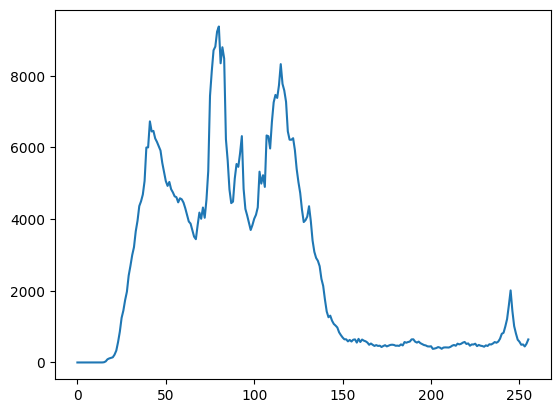

256
[50, 136, 195, 292, 403, 541, 755, 1016, 1317, 1711, 2097, 2529, 2887, 3179, 3337, 3467, 3580, 3648, 3832, 3974, 4032, 4116, 4128, 4260, 4155, 4090, 3909, 3912, 3734, 3650, 3376, 3504, 3294, 3290, 3160, 3303, 3170, 3242, 3260, 3137, 3217, 3177, 3198, 3060, 2978, 2938, 2791, 2635, 2534, 2459, 2381, 2226, 2268, 2187, 2008, 2067, 2004, 1878, 1911, 1845, 1851, 1787, 1813, 1767, 1889, 1771, 1848, 1729, 1803, 1777, 1847, 1838, 1762, 1710, 1814, 1782, 1799, 1826, 1934, 2070, 2254, 2923, 3511, 3789, 4290, 5023, 5172, 5425, 4890, 5291, 5250, 5109, 5117, 4975, 4602, 4959, 4945, 5126, 5389, 5392, 5479, 5490, 5367, 5166, 5103, 4650, 4629, 4333, 4338, 4414, 4221, 4315, 4652, 4853, 4969, 5431, 5704, 5781, 6511, 7006, 7671, 8093, 9113, 10607, 10481, 10533, 11036, 11234, 11587, 12862, 14044, 13366, 12405, 10013, 8065, 6420, 5896, 5360, 4975, 4396, 4309, 3709, 3322, 2997, 3019, 2751, 2571, 2372, 2478, 2364, 2348, 2458, 2616, 2388, 2221, 2045, 1818, 1746, 1530, 1577, 1447, 1301, 1183, 1066, 930, 917

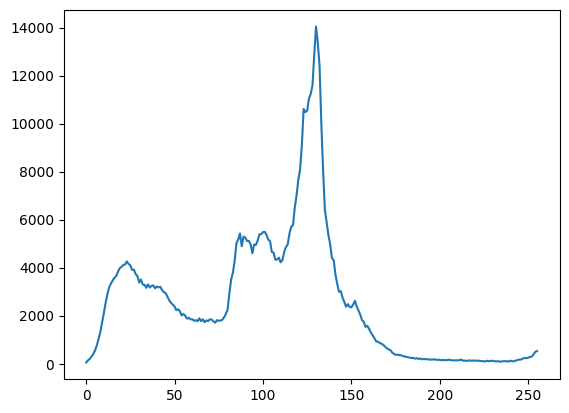

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 4, 9, 20, 26, 32, 49, 82, 112, 159, 300, 447, 704, 1018, 1189, 1298, 1262, 1182, 1084, 931, 813, 738, 637, 564, 562, 539, 593, 541, 515, 515, 522, 536, 559, 577, 502, 499, 494, 516, 483, 536, 541, 549, 605, 585, 640, 671, 663, 685, 731, 724, 766, 742, 811, 795, 786, 792, 767, 773, 709, 732, 761, 735, 720, 681, 673, 646, 686, 623, 705, 611, 650, 630, 671, 610, 658, 623, 711, 700, 714, 760, 730, 757, 771, 813, 797, 783, 848, 836, 864, 898, 838, 884, 935, 898, 912, 998, 1160, 2020, 3888, 5753, 7132, 8735, 12678, 12587, 10656, 10910, 8527, 8517, 7698, 8068, 6201, 7650, 8862, 8846, 10582, 8922, 8790, 8347, 7671, 6822, 8372, 9540, 10155, 10137, 10784, 13068, 12123, 10055, 10916, 13064, 13822, 10731, 10798, 11549, 11013, 9868, 8695, 8220, 16167, 10690, 9374, 11541, 7689, 9821, 14796, 15981, 7491, 6014, 5254, 3602, 3117, 3016, 2932, 2544, 2456, 2189, 1950, 1883, 1863, 2010, 2141, 2250, 2334, 2540, 2741, 2820, 2899,

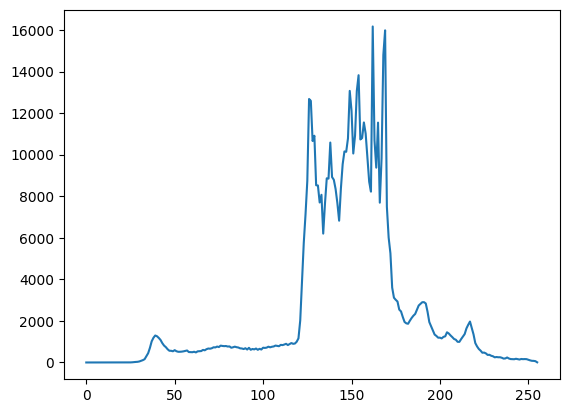

256
[3, 5, 13, 21, 29, 35, 30, 51, 63, 81, 77, 109, 131, 153, 218, 242, 296, 328, 502, 760, 1263, 1250, 1297, 1333, 1415, 1526, 1684, 1906, 2230, 2056, 1999, 2037, 2077, 2162, 2262, 2371, 2466, 2637, 2710, 2695, 2699, 2713, 2641, 2635, 2568, 2644, 2593, 2577, 2569, 2637, 2739, 2672, 2763, 2690, 2767, 2739, 2804, 2892, 2901, 3008, 3054, 3065, 3063, 3039, 3139, 3221, 3214, 3174, 3359, 3465, 3535, 3482, 3625, 3566, 3474, 3552, 3505, 3520, 3543, 3473, 3573, 3585, 3534, 3598, 3499, 3505, 3663, 3694, 3654, 3749, 3782, 3728, 3932, 3870, 4131, 4211, 4248, 4277, 4343, 4378, 4538, 4520, 4523, 4665, 4930, 4914, 4865, 4876, 4929, 4896, 5160, 5196, 5201, 5266, 5614, 5966, 6503, 6453, 6363, 6145, 6067, 6211, 6302, 6302, 6197, 6343, 6419, 6442, 6381, 6445, 6268, 6379, 6294, 6311, 6208, 6054, 5905, 5712, 5617, 5663, 5439, 5296, 5220, 5163, 5180, 4791, 4784, 4518, 4734, 4879, 5194, 5017, 5108, 4774, 4762, 4421, 4279, 3948, 3648, 3579, 3079, 3049, 2828, 2537, 2406, 2333, 2371, 2257, 2193, 2132, 2135, 21

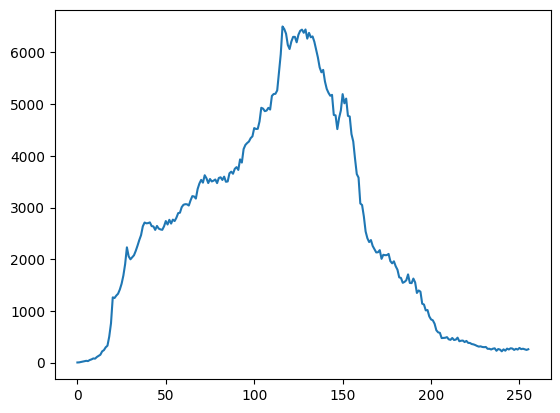

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 13, 20, 61, 107, 192, 227, 365, 723, 1524, 2015, 2396, 2703, 3054, 3539, 3603, 3812, 3838, 4043, 4557, 4797, 4807, 4567, 4544, 4354, 4675, 4830, 4923, 4985, 5476, 5935, 5667, 5733, 6018, 6186, 6388, 6367, 6335, 5947, 5387, 5381, 4920, 4843, 4588, 4362, 4322, 4125, 3936, 3956, 3751, 3798, 3584, 3468, 3538, 3291, 3384, 3387, 3416, 3130, 3015, 2958, 2648, 2769, 2808, 2929, 2910, 2724, 4345, 4762, 6306, 6981, 7730, 7516, 6219, 6513, 6979, 6405, 5065, 5039, 5331, 5041, 4975, 4166, 4433, 4301, 4174, 4165, 4791, 5208, 5875, 5395, 5756, 6198, 5574, 6193, 5076, 5062, 5155, 4943, 4647, 5730, 6434, 6583, 6297, 7026, 6472, 7346, 6994, 7590, 7701, 8224, 8220, 7055, 6016, 5895, 5938, 5191, 5215, 4558, 4227, 4122, 4402, 4263, 3725, 3353, 3455, 3021, 2552, 2252, 2071, 1754, 1968, 1986, 1662, 1333, 1378, 1248, 1125, 1174, 1290, 1255, 1201, 1299, 1305, 1122, 1205, 1143, 1217, 1188, 1020, 819, 645, 630, 629, 649, 642, 606, 678, 694, 692, 782, 681, 670, 61

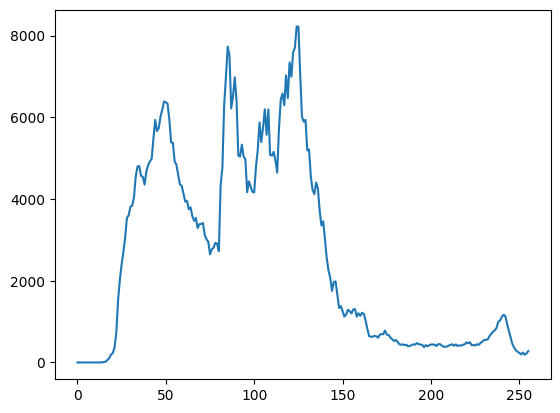

256
[19, 14, 11, 10, 11, 16, 6, 10, 9, 15, 11, 14, 9, 10, 8, 8, 5, 14, 11, 33, 62, 137, 335, 568, 638, 628, 870, 1132, 1468, 2184, 2323, 2655, 2871, 3118, 3759, 4199, 4051, 4810, 4799, 5679, 6451, 5694, 4971, 4541, 4191, 4138, 3933, 4088, 3911, 3924, 3768, 4140, 4145, 4069, 3882, 3710, 3752, 3773, 3695, 3697, 3465, 3740, 3533, 3266, 3284, 3525, 3422, 3528, 3470, 3426, 3376, 3435, 3832, 3944, 3862, 3892, 4081, 4039, 4274, 4239, 4371, 4159, 3663, 3871, 3698, 3755, 3813, 4145, 3786, 3712, 3638, 3931, 3903, 4090, 3968, 3766, 3708, 3763, 3785, 3633, 3548, 3676, 3622, 3576, 3317, 3400, 3677, 3435, 3445, 3269, 3247, 3006, 2907, 2770, 2808, 2841, 2826, 2611, 2634, 2566, 2428, 2541, 2290, 2162, 2060, 1988, 1905, 1973, 1907, 1850, 1995, 2022, 1950, 1816, 1898, 1839, 1871, 1908, 1834, 1871, 1854, 1753, 1692, 1653, 1711, 1801, 1889, 1788, 1692, 1604, 1584, 1619, 1649, 1658, 1637, 1652, 1638, 1695, 1649, 1730, 1725, 1780, 1705, 1590, 1618, 1607, 1671, 1676, 1671, 1586, 1553, 1648, 1619, 1476, 1488,

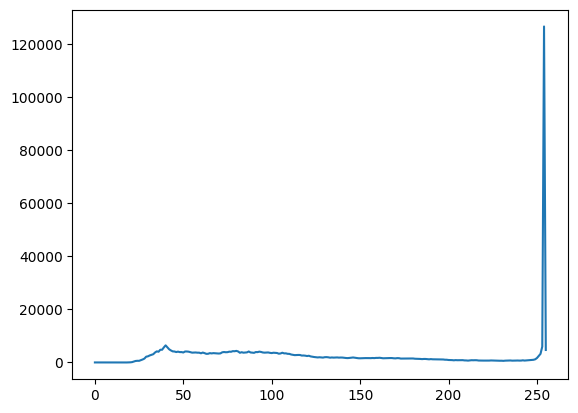

256
[52, 120, 216, 372, 649, 1072, 1440, 1859, 2003, 2088, 2401, 2633, 3103, 3639, 4172, 4890, 5344, 5547, 5501, 5594, 5309, 5182, 5027, 4769, 4528, 4435, 4210, 4136, 3828, 3787, 3806, 3674, 3452, 3402, 3253, 3310, 3134, 2998, 2921, 2761, 2762, 2674, 2623, 2577, 2630, 2528, 2305, 2375, 2375, 2316, 2240, 2317, 2363, 2407, 2504, 2486, 2632, 2665, 2683, 2872, 2978, 3021, 3049, 3025, 3012, 2964, 3028, 2994, 2868, 2900, 2812, 2703, 2552, 2493, 2422, 2348, 2397, 2292, 2382, 2416, 2443, 2435, 2407, 2494, 2623, 2757, 3020, 3383, 3653, 3874, 4014, 3871, 3844, 4084, 4145, 4708, 4888, 5497, 5868, 5858, 5993, 5614, 5590, 5129, 5004, 4936, 4802, 4818, 4965, 4980, 5051, 5302, 5806, 6207, 6135, 6589, 6169, 6146, 6254, 5646, 5520, 5024, 4827, 4848, 4459, 4699, 4320, 4466, 4096, 4464, 4447, 4339, 4301, 4983, 5106, 5476, 5494, 5137, 4631, 5031, 5221, 5349, 5589, 5595, 5764, 5375, 5462, 5098, 5093, 4903, 4393, 4504, 4379, 4320, 3879, 3175, 2920, 2655, 2502, 2422, 2279, 2213, 2021, 1965, 1869, 1775, 1571,

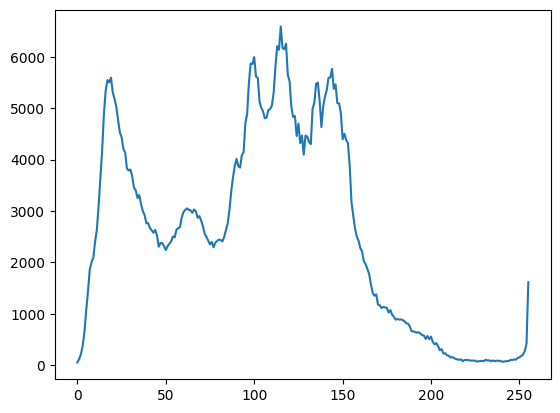

256
[23, 78, 134, 261, 628, 936, 1227, 1438, 1493, 1766, 1971, 2314, 2528, 2789, 3096, 3145, 3341, 3363, 3660, 3778, 3916, 4180, 4169, 4357, 4359, 4410, 4568, 4416, 4546, 4552, 4839, 5005, 4798, 4611, 4383, 4251, 4156, 3949, 3872, 3908, 3941, 4169, 4107, 4094, 4268, 4175, 4094, 4031, 3780, 3755, 3674, 3511, 3515, 3508, 3323, 3328, 3344, 3253, 3066, 3126, 2892, 2788, 2766, 2578, 2445, 2267, 2276, 2346, 2114, 2223, 2184, 2051, 2015, 1885, 1742, 1656, 1731, 1772, 1731, 1648, 1555, 1497, 1454, 1449, 1390, 1381, 1289, 1295, 1207, 1217, 1177, 1163, 1186, 1159, 1066, 1104, 1111, 1050, 1060, 1018, 1033, 1002, 1012, 1037, 971, 969, 988, 966, 945, 973, 1027, 1022, 1061, 1066, 1024, 1040, 933, 881, 867, 866, 859, 854, 818, 832, 841, 852, 731, 769, 774, 764, 796, 752, 719, 741, 715, 734, 699, 675, 689, 655, 625, 594, 574, 552, 556, 516, 541, 543, 563, 582, 574, 525, 516, 492, 457, 475, 481, 445, 490, 502, 478, 452, 444, 394, 399, 432, 391, 413, 476, 442, 416, 465, 530, 509, 535, 603, 723, 849, 879

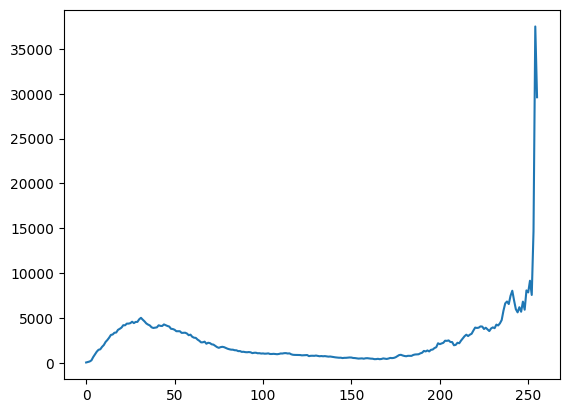

256
[0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 3, 3, 3, 3, 6, 11, 11, 16, 23, 27, 22, 43, 51, 79, 111, 195, 336, 516, 736, 925, 1021, 1198, 1302, 1423, 1480, 1583, 1727, 1848, 2202, 2519, 2457, 2542, 2563, 2686, 2745, 2808, 2748, 2847, 2775, 2725, 2852, 2962, 2904, 3047, 3365, 3504, 3735, 3744, 3952, 3962, 3969, 4068, 4113, 4214, 4451, 4335, 4279, 4018, 4115, 4147, 4131, 4172, 4268, 4420, 4265, 4327, 4510, 4645, 4748, 4700, 4569, 4495, 4474, 4303, 4224, 4108, 3966, 4109, 3907, 4135, 4160, 4238, 4568, 4934, 5346, 5727, 5950, 5828, 5800, 5256, 4728, 4300, 4006, 3636, 3384, 3275, 3207, 3310, 3093, 3204, 3160, 3187, 3201, 3135, 3101, 3120, 2964, 2880, 2960, 3051, 3104, 3129, 3146, 3330, 3331, 3256, 3346, 3058, 3188, 3191, 3239, 3150, 3050, 2980, 2979, 2930, 2871, 2753, 2699, 2823, 2836, 2693, 2737, 2814, 2778, 2922, 2882, 2905, 2871, 2807, 2793, 2782, 2779, 2816, 2724, 2762, 2734, 2760, 2708, 2616, 2435, 2364, 2280, 2218, 2069, 2034, 1918, 1800, 1824, 1712, 1670, 1662, 1505, 1521, 1321, 1278, 1294, 12

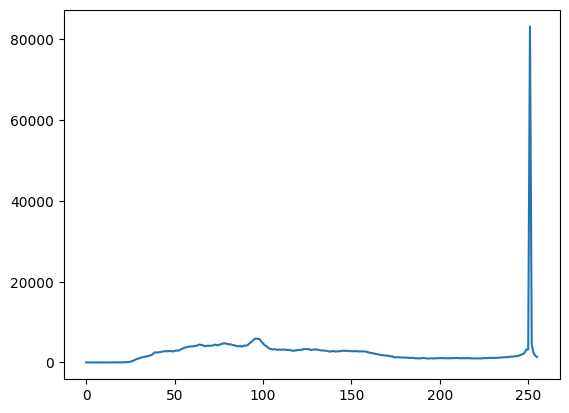

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 6, 10, 36, 44, 122, 211, 368, 721, 1088, 1299, 1430, 1306, 1011, 792, 589, 493, 315, 232, 249, 225, 224, 188, 257, 226, 251, 263, 291, 292, 330, 347, 407, 361, 456, 495, 502, 550, 696, 726, 753, 850, 1318, 1926, 1427, 1162, 969, 985, 977, 915, 903, 908, 807, 924, 961, 975, 988, 961, 961, 1062, 1053, 1144, 1212, 1412, 1593, 2402, 2729, 2830, 3229, 3659, 3595, 3723, 3724, 3579, 3689, 3480, 3268, 3013, 2803, 2679, 2751, 2885, 2914, 2999, 2861, 2618, 2621, 2636, 2652, 2712, 2822, 2581, 2426, 2184, 2075, 1959, 1848, 1796, 1780, 1752, 1821, 1738, 1743, 1722, 1784, 1951, 2214, 3313, 6655, 7482, 12135, 15588, 13617, 15152, 14146, 12651, 9700, 16903, 9796, 12298, 11926, 17566, 9499, 8609, 9636, 6290, 7419, 14409, 10804, 12911, 10616, 8777, 14724, 12437, 13306, 9524, 18757, 10823, 9961, 7966, 13057, 18237, 10011, 8467, 10015, 15449, 6370, 2880, 3652, 1275, 912, 801, 676, 665, 622, 627, 565, 522, 585, 5

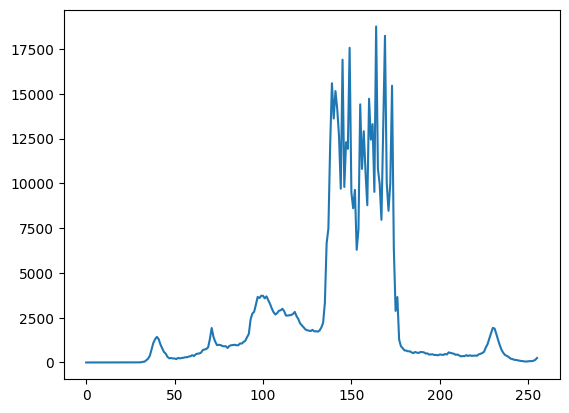

256
[13, 33, 70, 140, 280, 512, 865, 1493, 2252, 2826, 3278, 3711, 4073, 4282, 4557, 4558, 4295, 4281, 4460, 4741, 4767, 4967, 4526, 4618, 4494, 4584, 4875, 5231, 5091, 5607, 5889, 5964, 5267, 5094, 4988, 4533, 4241, 3579, 3424, 3418, 3331, 3266, 3058, 3212, 3126, 3095, 2913, 2743, 2641, 2555, 2537, 2224, 2158, 2080, 2027, 2024, 1880, 1833, 1617, 1601, 1455, 1435, 1323, 1299, 1184, 1177, 1119, 1077, 1048, 984, 957, 967, 1002, 988, 882, 882, 876, 852, 834, 820, 828, 836, 838, 803, 752, 894, 826, 794, 808, 761, 780, 739, 771, 773, 774, 789, 795, 784, 940, 960, 881, 879, 948, 968, 1022, 1037, 1094, 1070, 1108, 1180, 1235, 1218, 1386, 1531, 1535, 1556, 1599, 1737, 1726, 1889, 1848, 1934, 1797, 1774, 1796, 1946, 2033, 1945, 2100, 2197, 2357, 2520, 2722, 2740, 2689, 2634, 2629, 2742, 2953, 2711, 2774, 2954, 3065, 3022, 2995, 3050, 2917, 2853, 3121, 3211, 3089, 2943, 2881, 2761, 2813, 2969, 2965, 2960, 2880, 2810, 2861, 2880, 2994, 2886, 2978, 2902, 3006, 3121, 3298, 3475, 3578, 3561, 3551, 3

KeyboardInterrupt: 

In [43]:
from PIL import Image

# Ekstrak setiap channel red, green, blue
# Iterate over the list of image data
for img_data in train_std_img_list:
    # Convert the image data to a PIL Image object
    img = Image.fromarray(img_data[0])
    r, g, b = img.split()

    # Cek panjang ukuran channel red
    print(len(r.histogram()))

    # Cetak fitur histogram pada channel red
    print(r.histogram())
    plt.plot(r.histogram())
    plt.show()